In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline
from pylab import rcParams

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.cross_validation import cross_val_score as cvs
from sklearn.model_selection import cross_val_predict as cross_val_predict
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import log_loss
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.ensemble import IsolationForest

rcParams['figure.figsize'] = 15, 10
%config InlineBackend.figure_format = 'retina'  # более качественное отображение графиков

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  # вывод всех запрошенных переменных ячейки

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
rcParams['figure.figsize'] = 280, 5

In [3]:
train = np.load("clusters9//train_clusters.npy")

In [4]:
p = np.chararray.tostring(train)

In [92]:
ans = pd.DataFrame(index=range(48))
ans[0] = 0

HELP = {}

for test_i in range(48):
    original_test = pd.read_csv('./test/' + str(test_i // 10) + str(test_i % 10) + '_test.csv', index_col="Time").dropna()
    
    test = np.load("clusters//test" + str(test_i) + "_clusters.npy")
    t = np.chararray.tostring(test)
    
    candidates = []
    for i in range(W, len(test)):
        search = t[(i - W) * 4:i * 4]
        
        if search in HELP:
            j = HELP[search]
        else:        
            j = p.find(search)
            HELP[search] = j
            
        if j == -1:
            candidates.append(original_test.index[i])
            
            if len(candidates) >= W and candidates[-1] - candidates[-W] < 10000:
                ans[0][test_i] = original_test.index[i]
                print(test_i, ") ", i, ans[0][test_i])
                break
                
    if ans[0][test_i] == 0:
        print("anomal!")
        ans[0][test_i] = candidates[0]

0 )  43090 42274
1 )  34774 34108
2 )  141750 138468
3 )  128667 125805
4 )  40165 39335
5 )  65327 63899
6 )  54846 53744
7 )  98585 96555
anomal!
9 )  54393 53347
10 )  118412 115814
11 )  89961 88021
12 )  63161 61917
13 )  137376 134360
14 )  77995 76263
15 )  105426 103024
16 )  118685 116023
17 )  31446 30884
18 )  65987 64781
19 )  112707 110318
anomal!
21 )  33317 32729
22 )  52894 51814
23 )  49177 48147
24 )  59964 58706
25 )  47269 46219
26 )  89698 87668
27 )  126479 123699
28 )  103234 101110
29 )  84621 82789
30 )  25966 25456
31 )  51851 50813
32 )  119318 116748
33 )  55932 54752
anomal!
35 )  101978 99640
anomal!
37 )  120423 117733
38 )  81470 79650
39 )  42827 41913
40 )  25070 24572
41 )  17445 17079
42 )  136781 133625
43 )  62779 61467
44 )  89923 88155
45 )  107066 104670
anomal!
47 )  72193 70565


In [93]:
ans.to_csv("12. better clusterization 15 clusters.csv", header=None)

In [27]:
W = 100

TEST  0


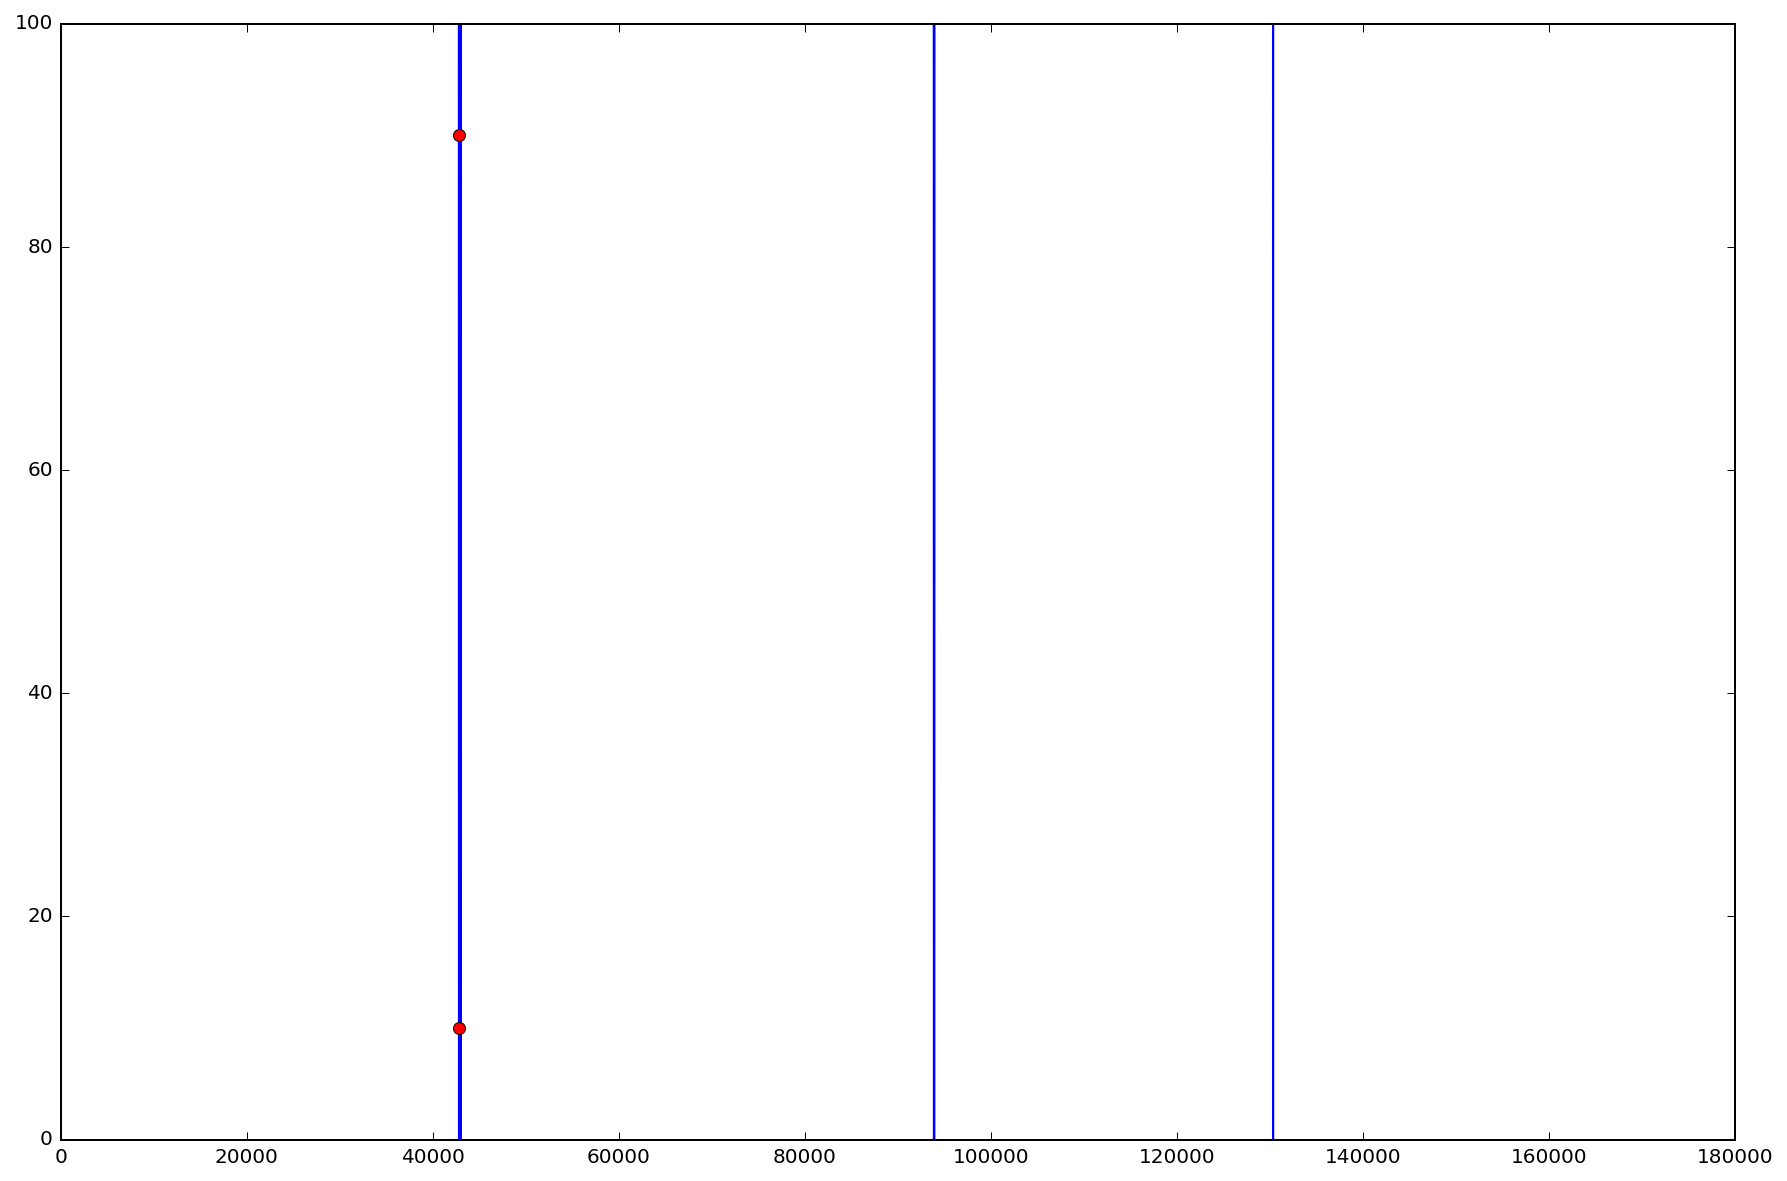

TEST  1


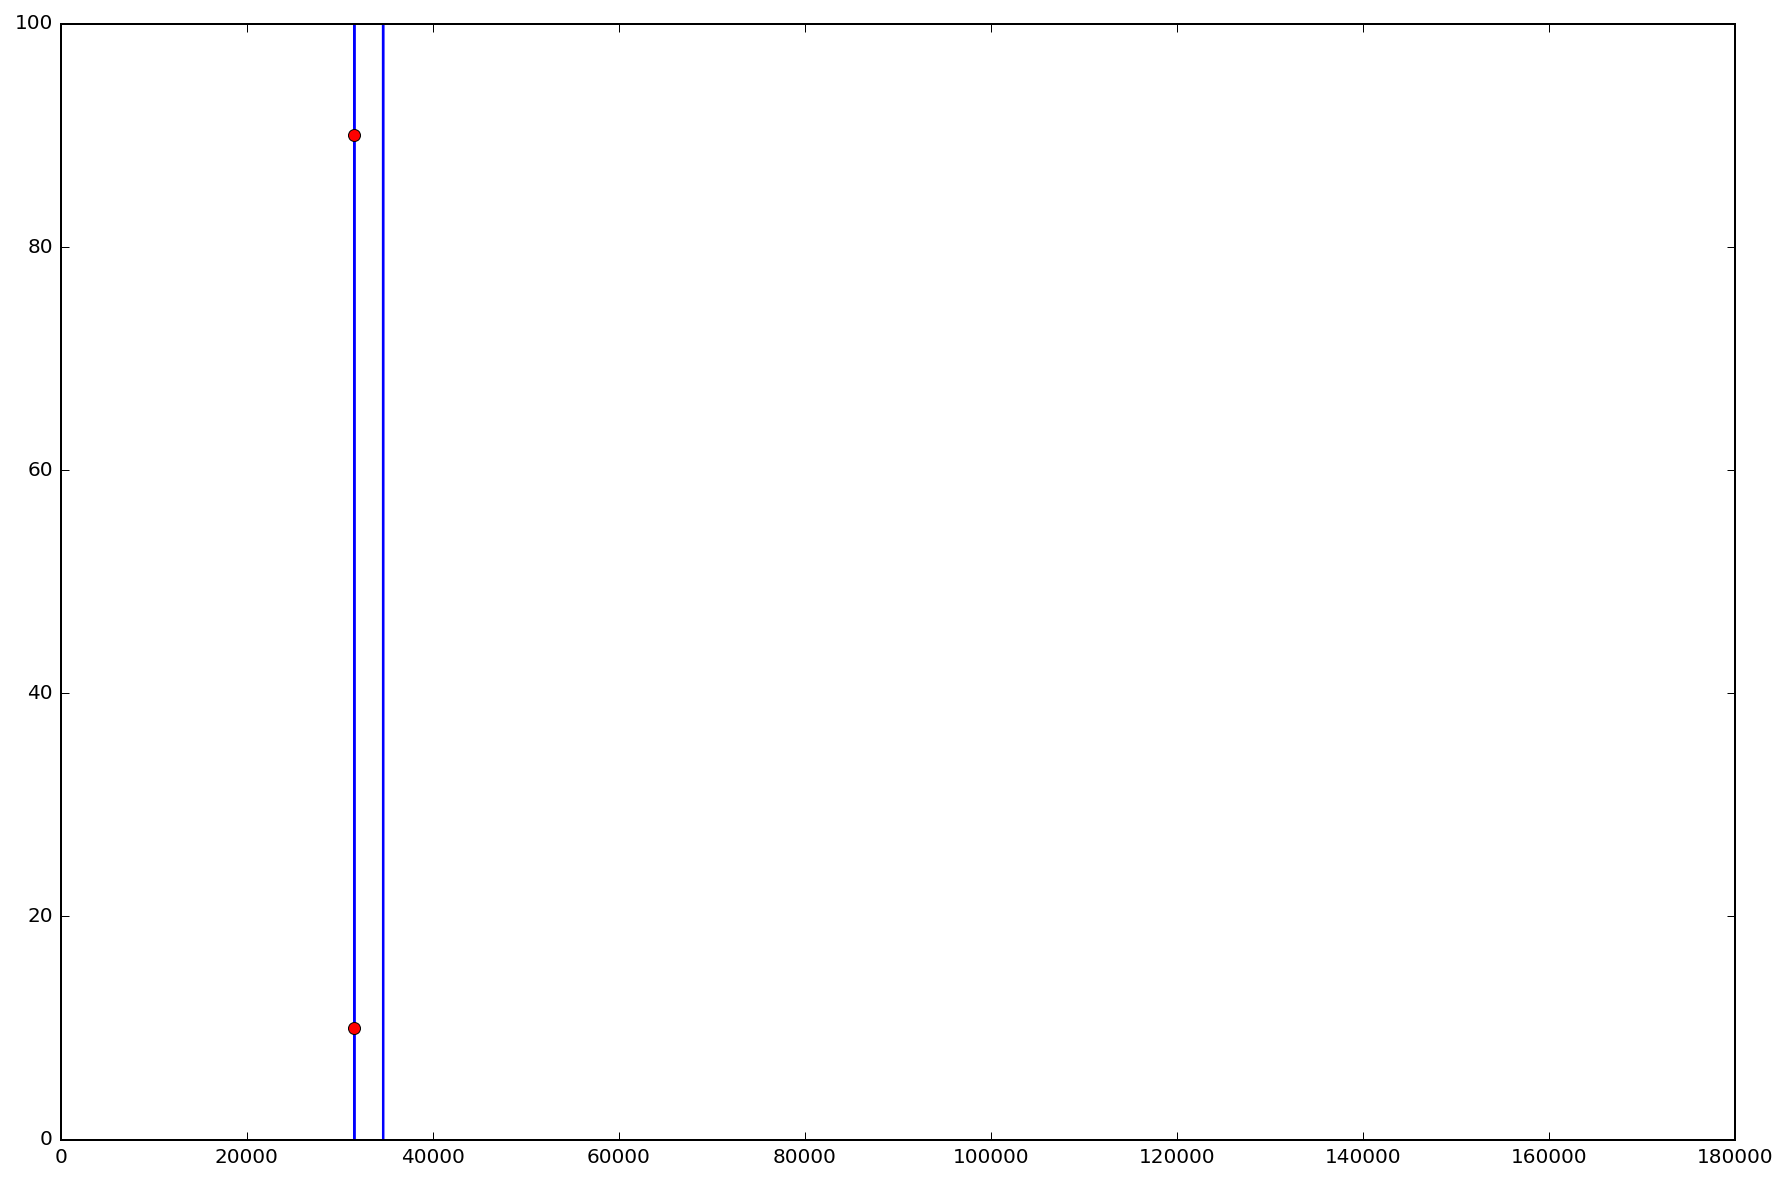

TEST  2


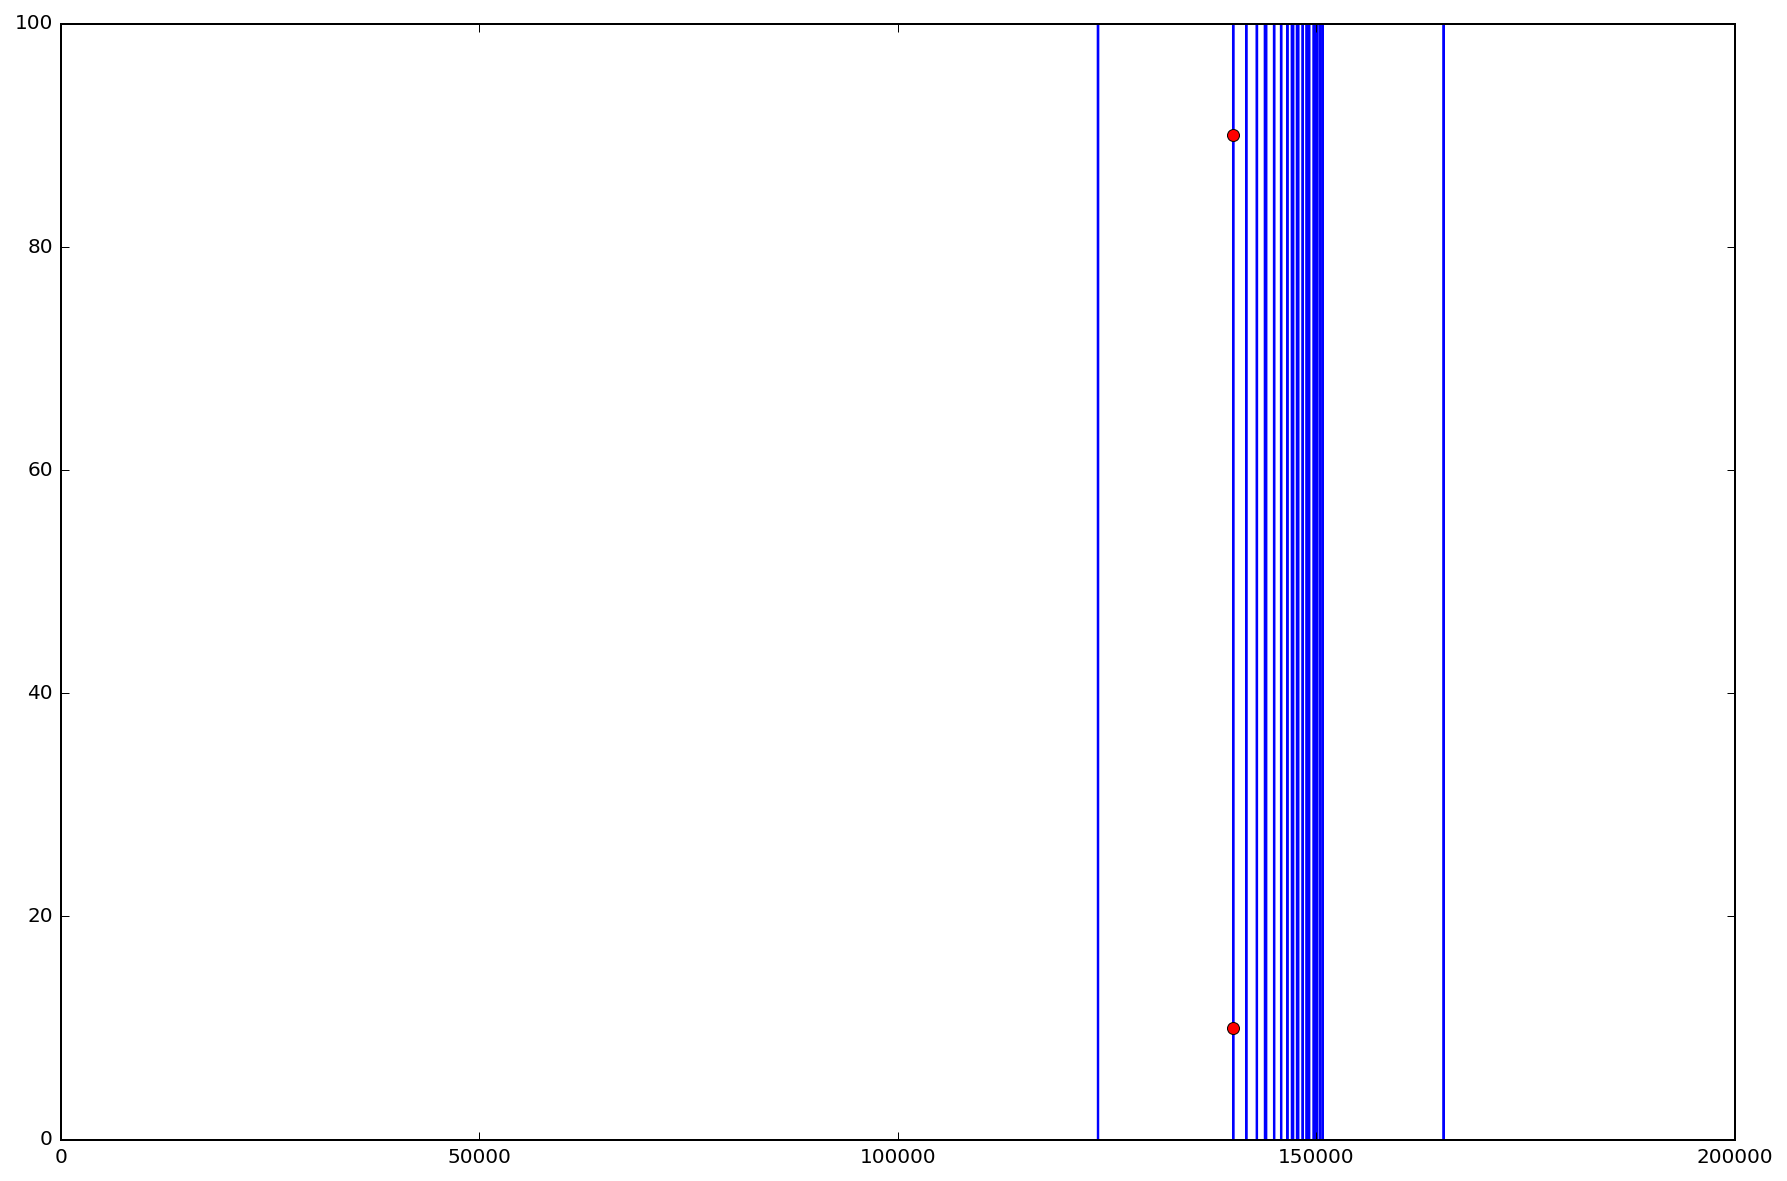

TEST  3


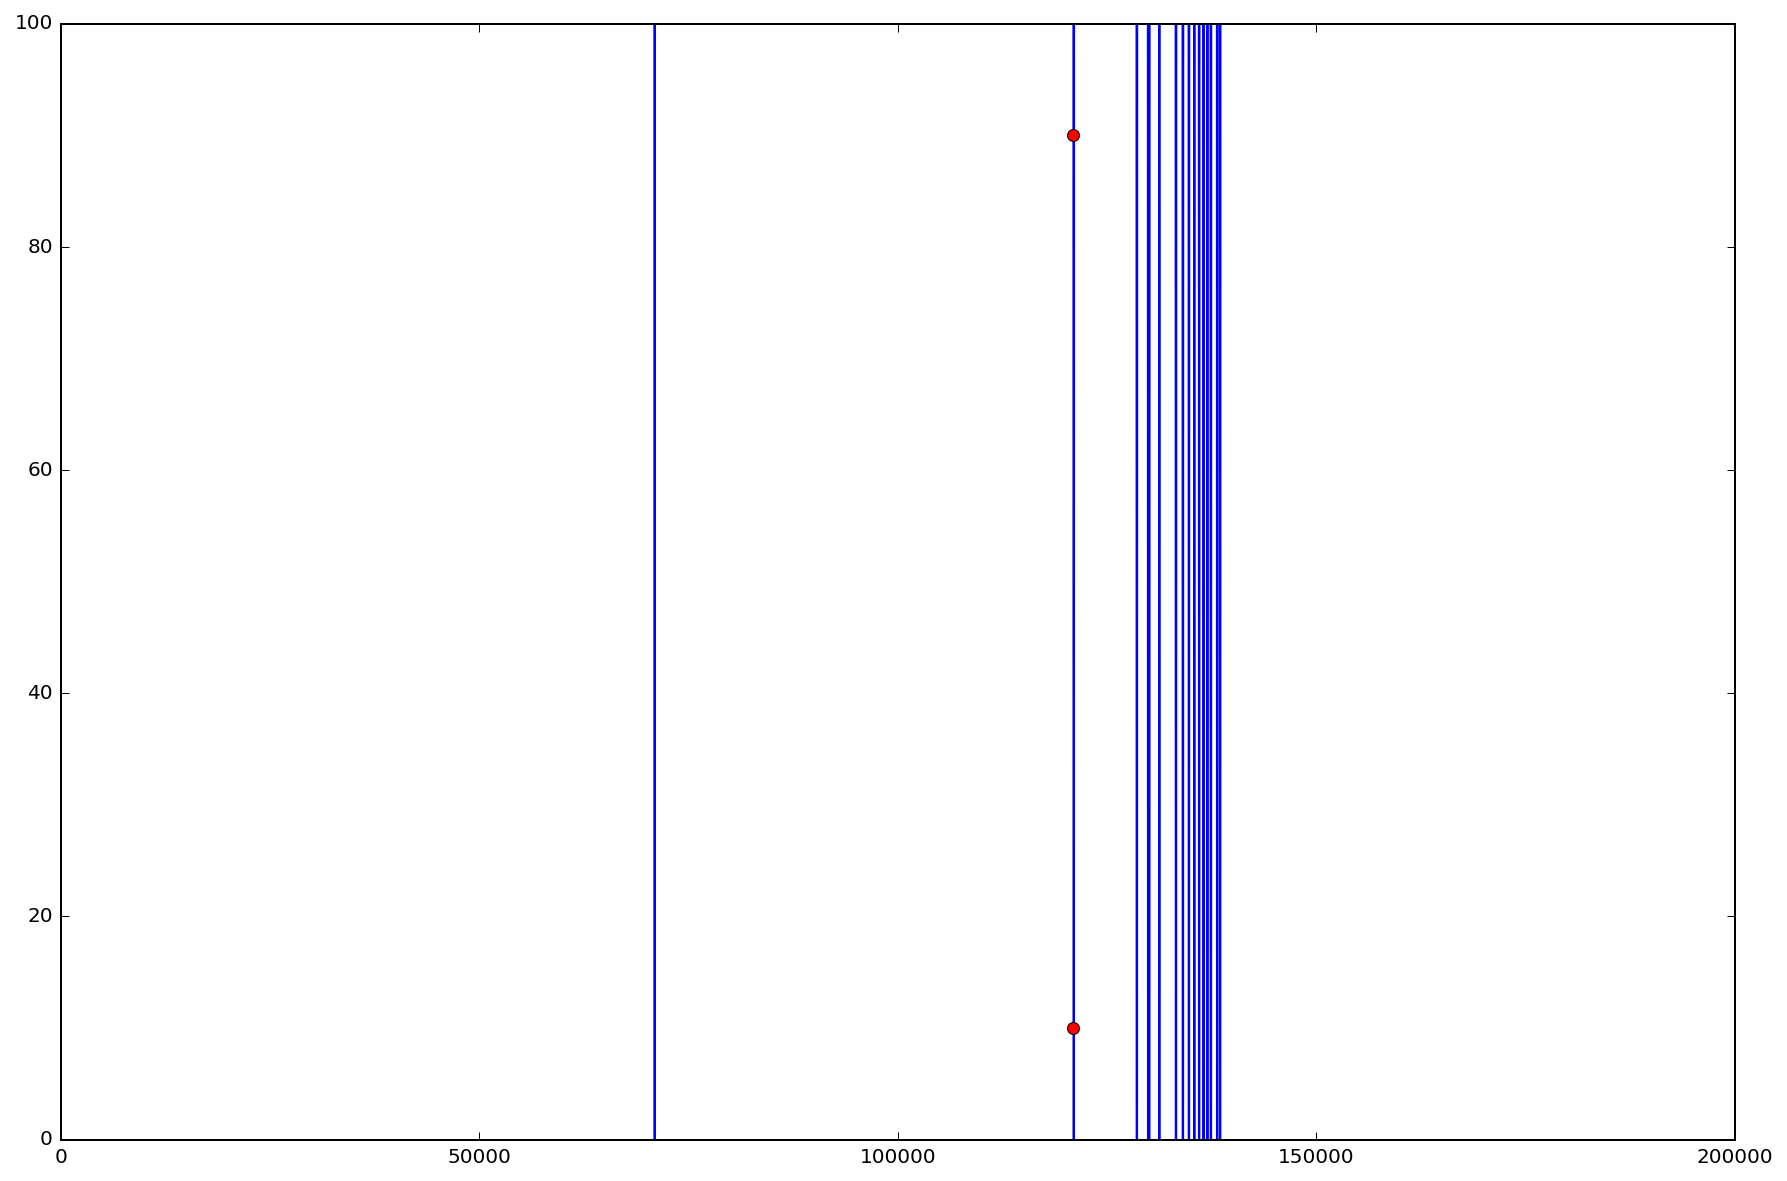

TEST  4


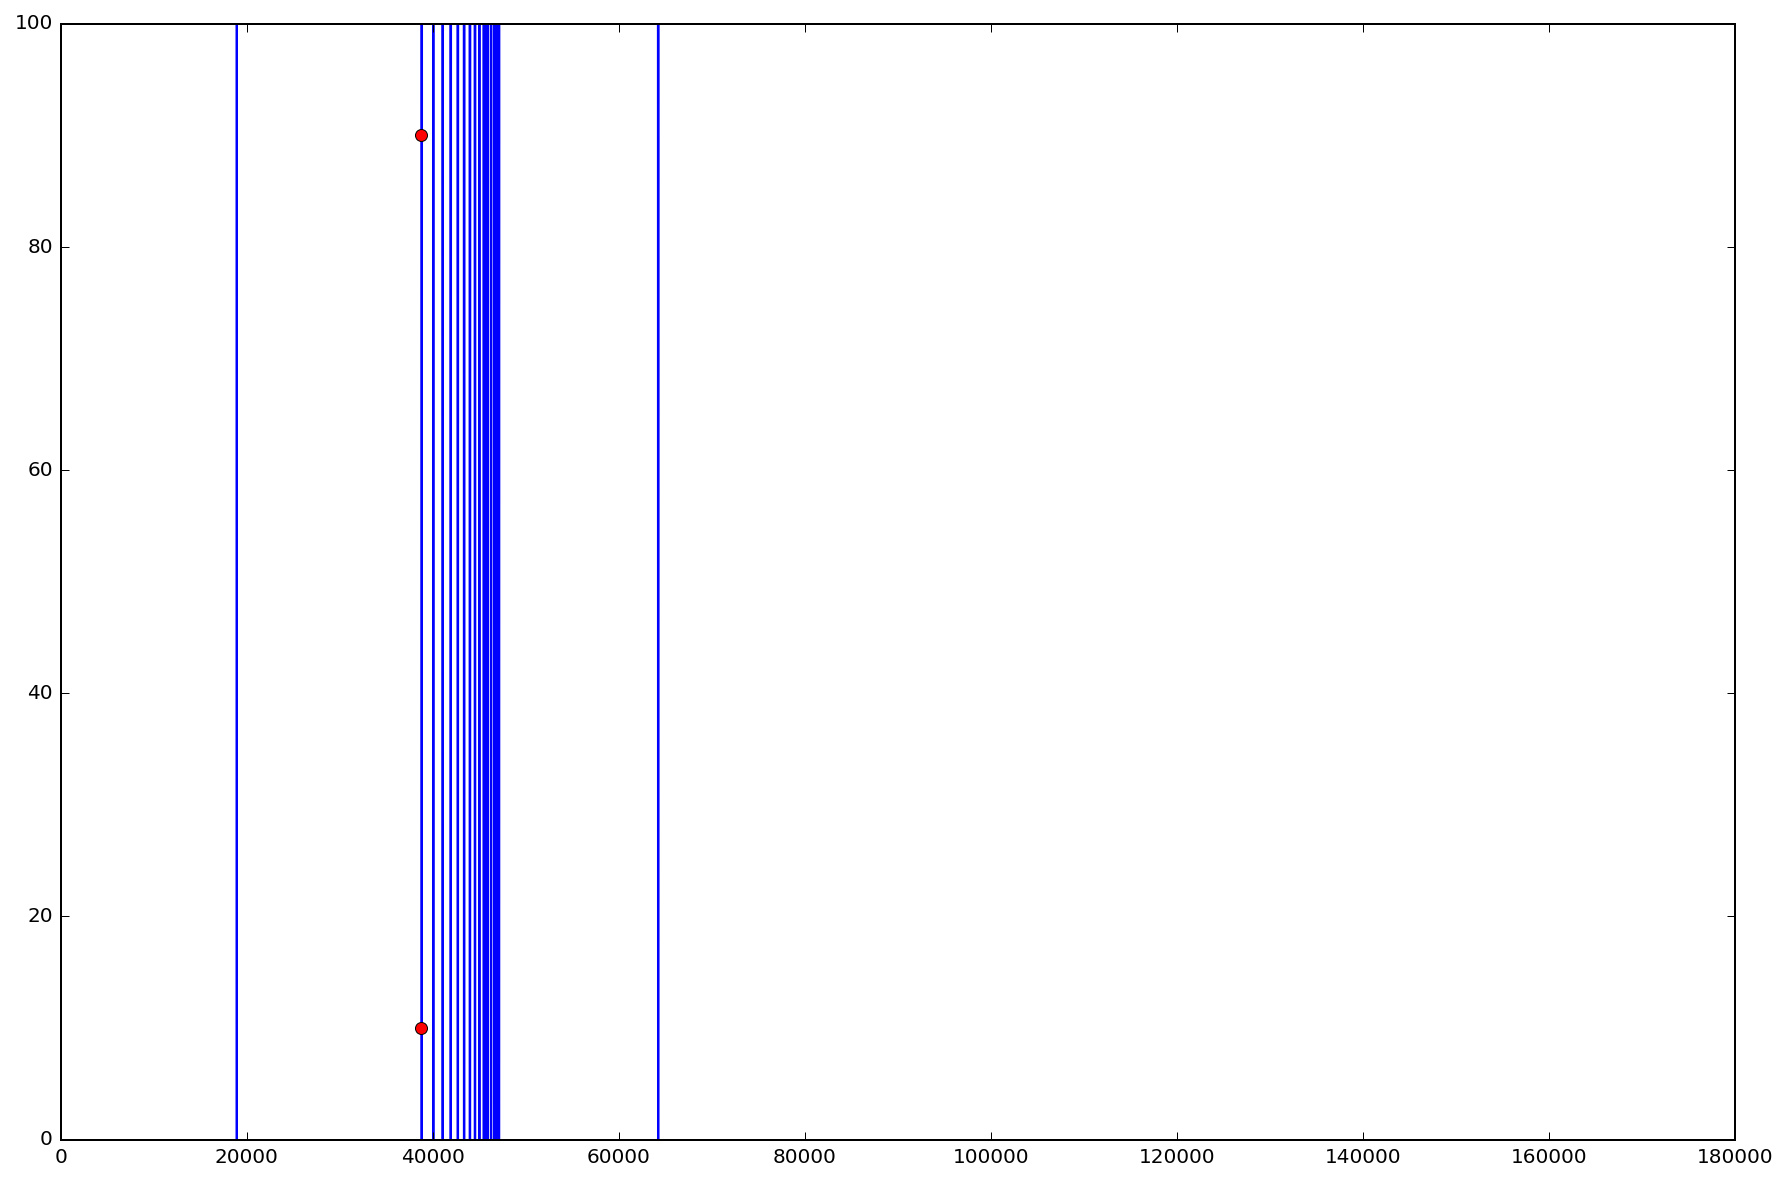

TEST  5


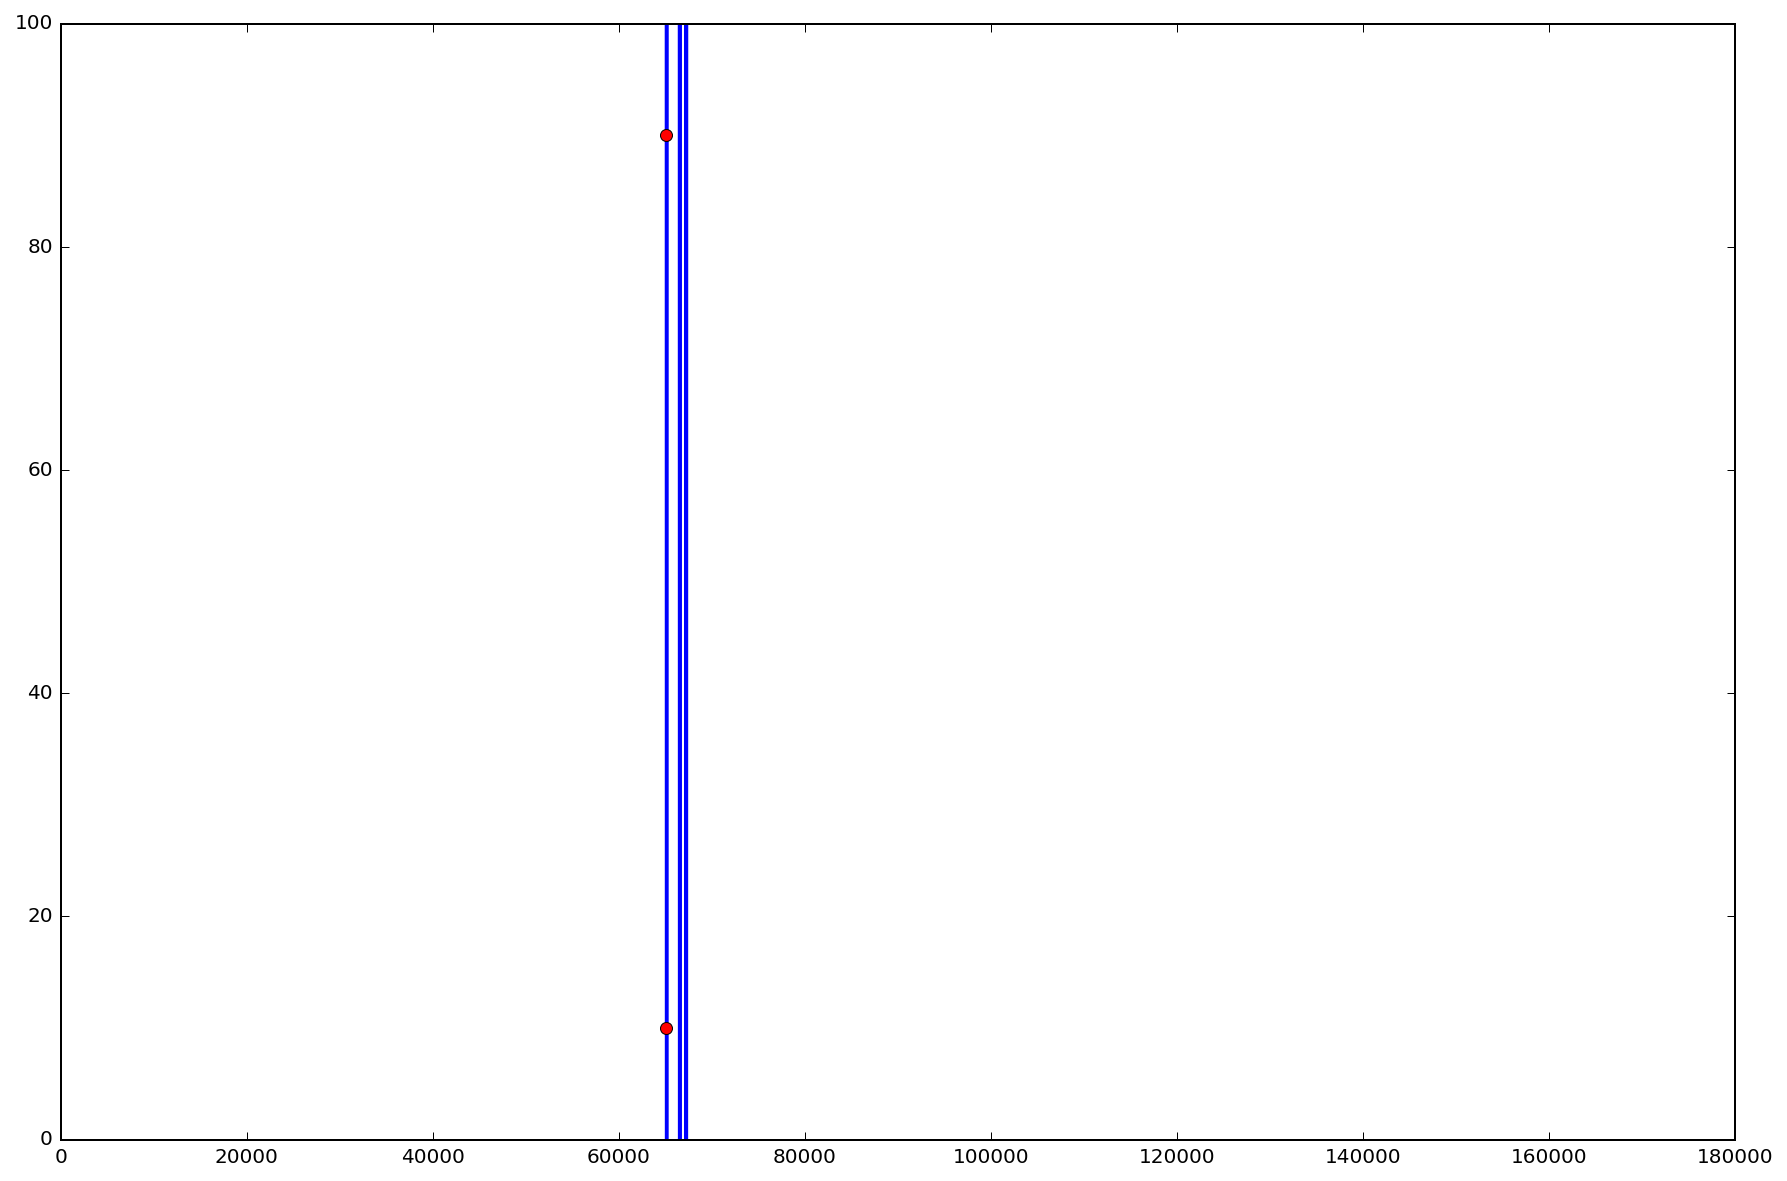

TEST  6


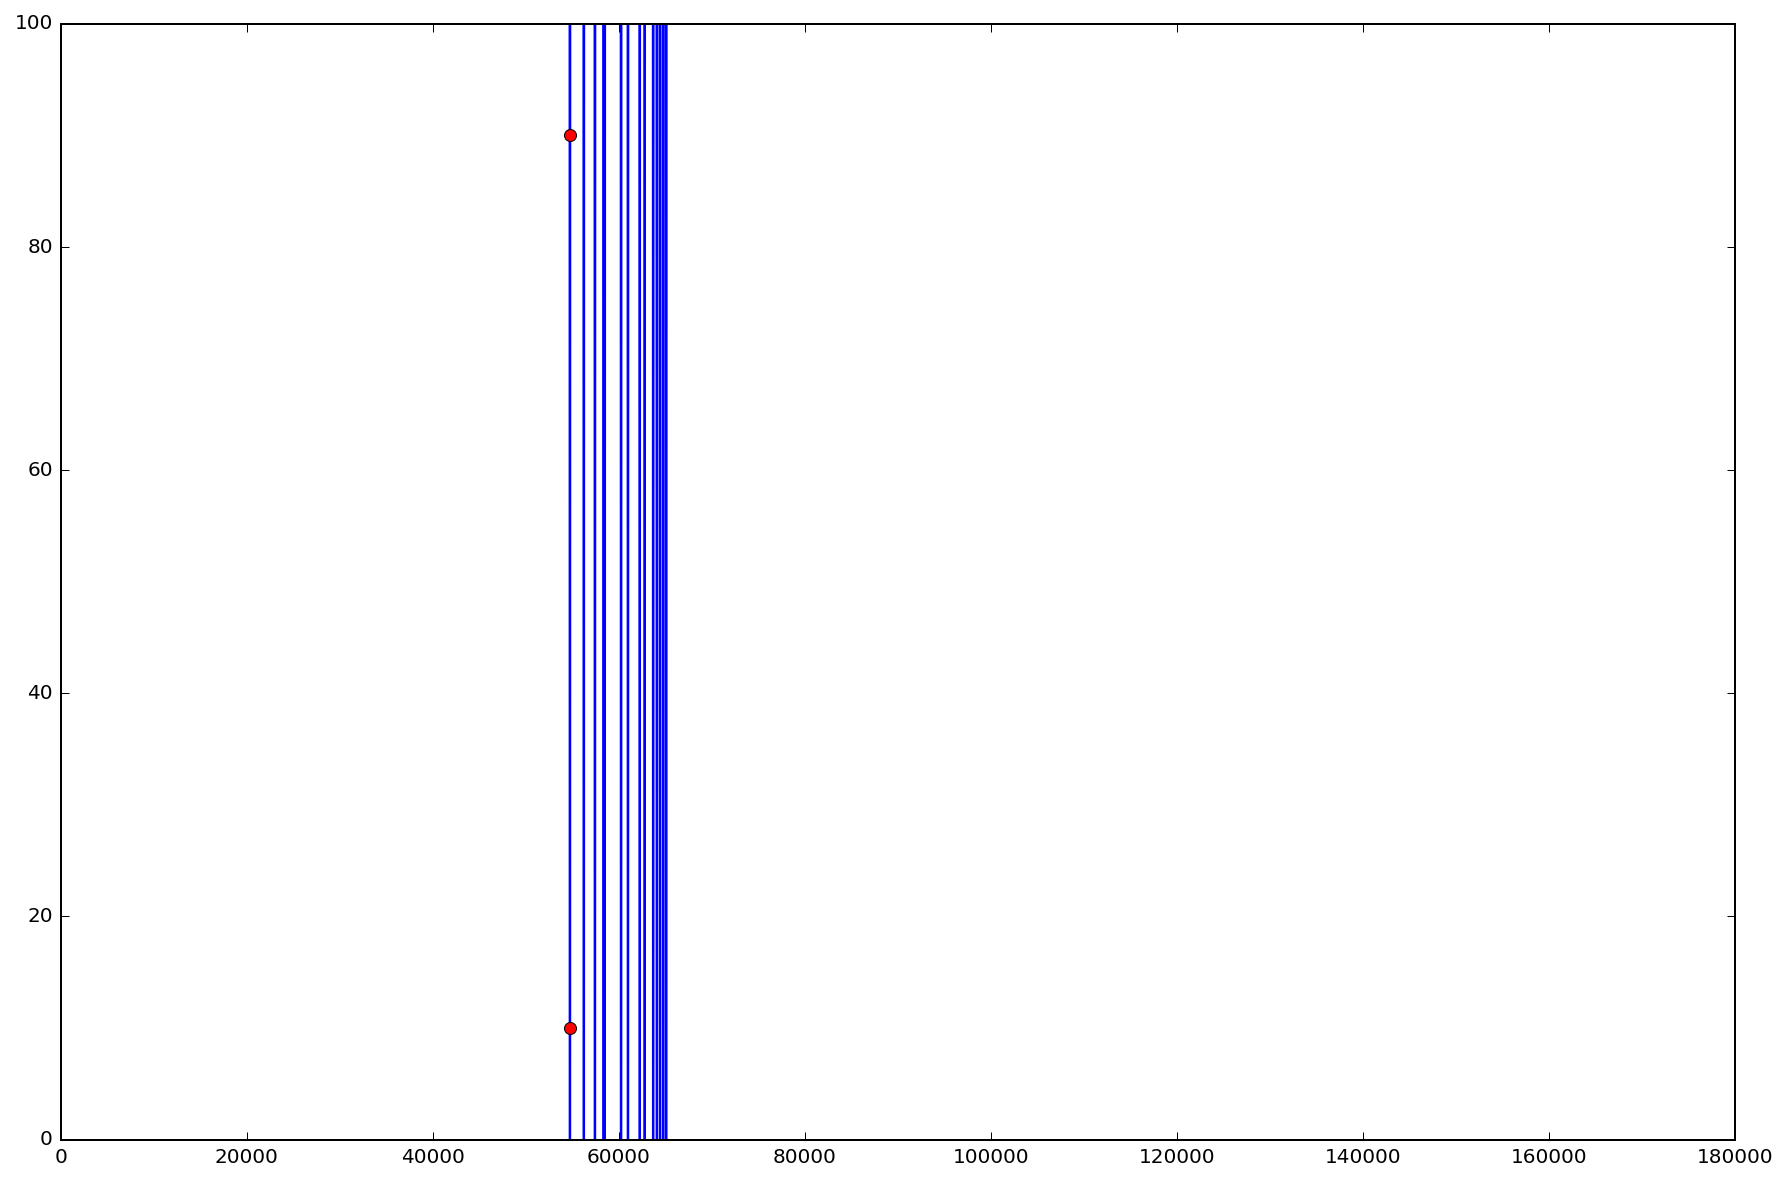

TEST  7


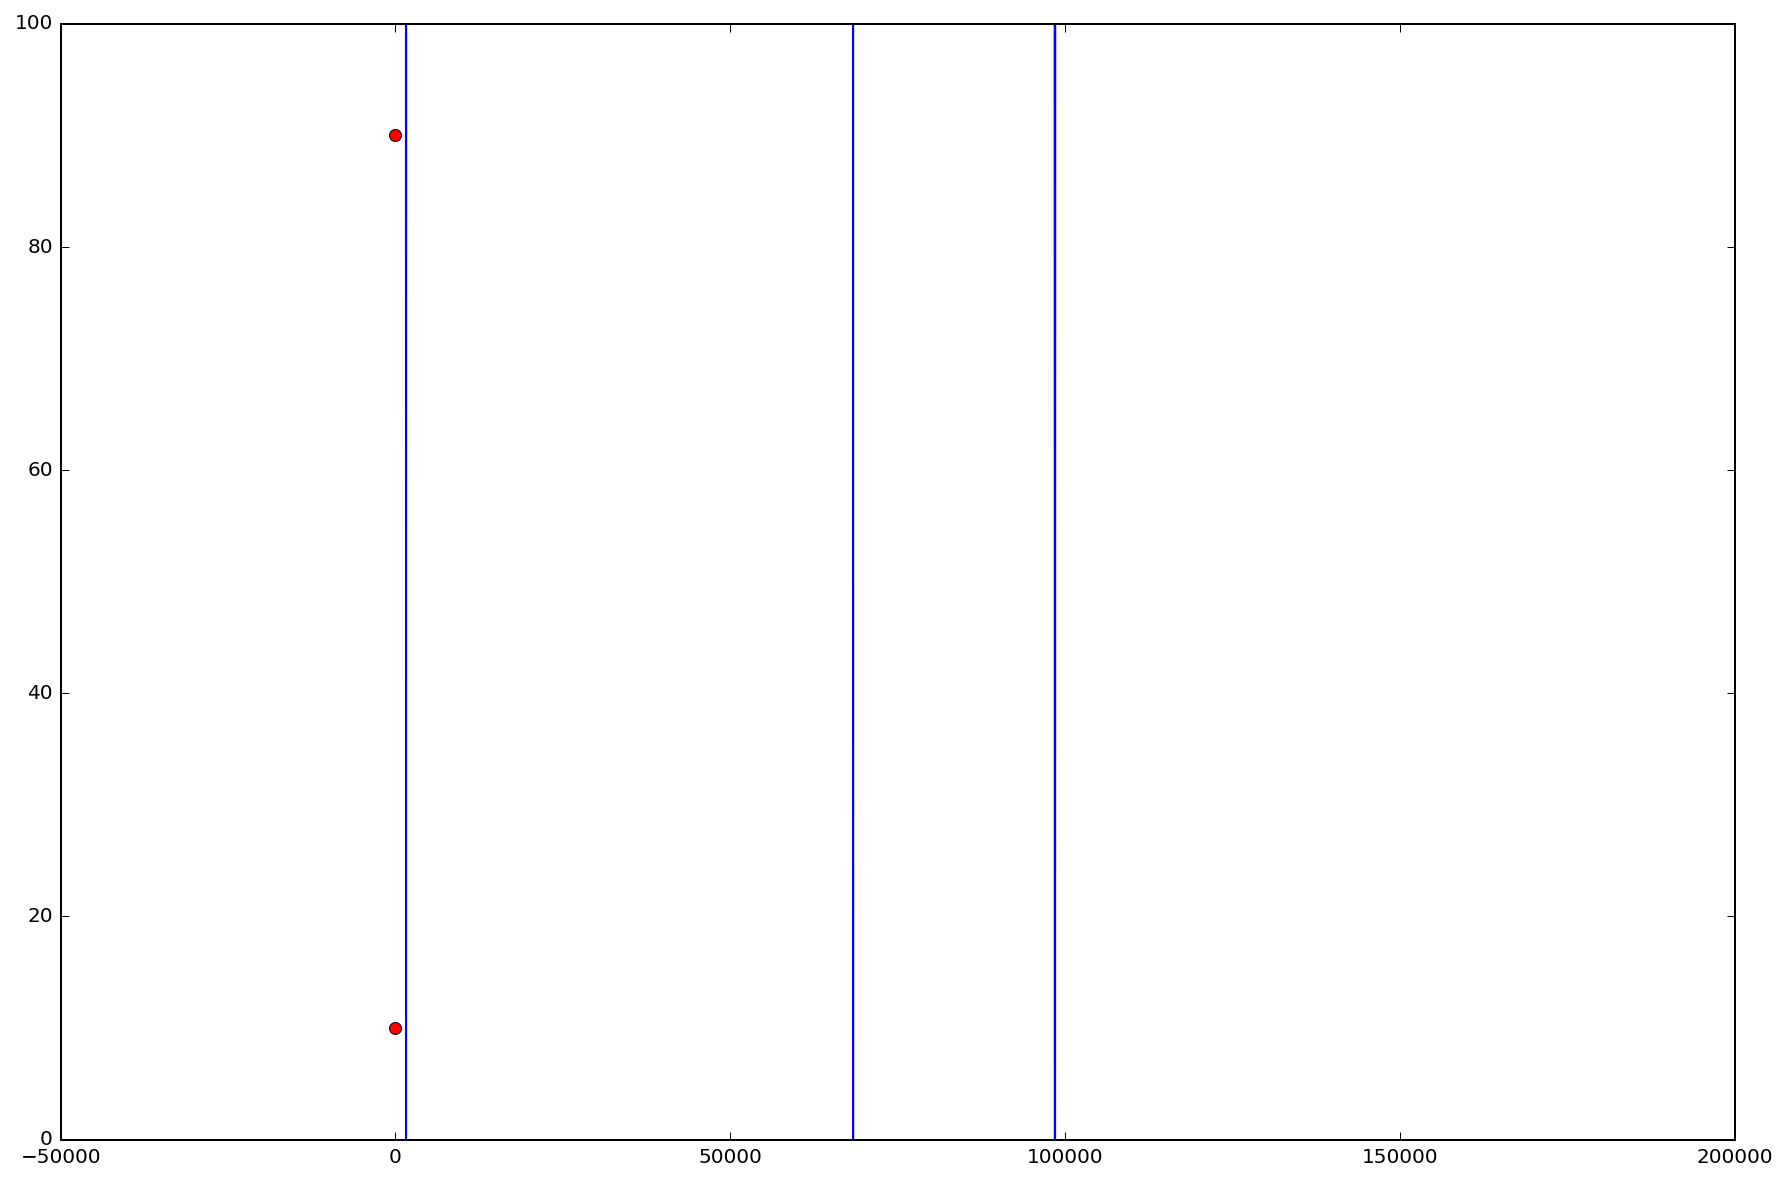

TEST  8


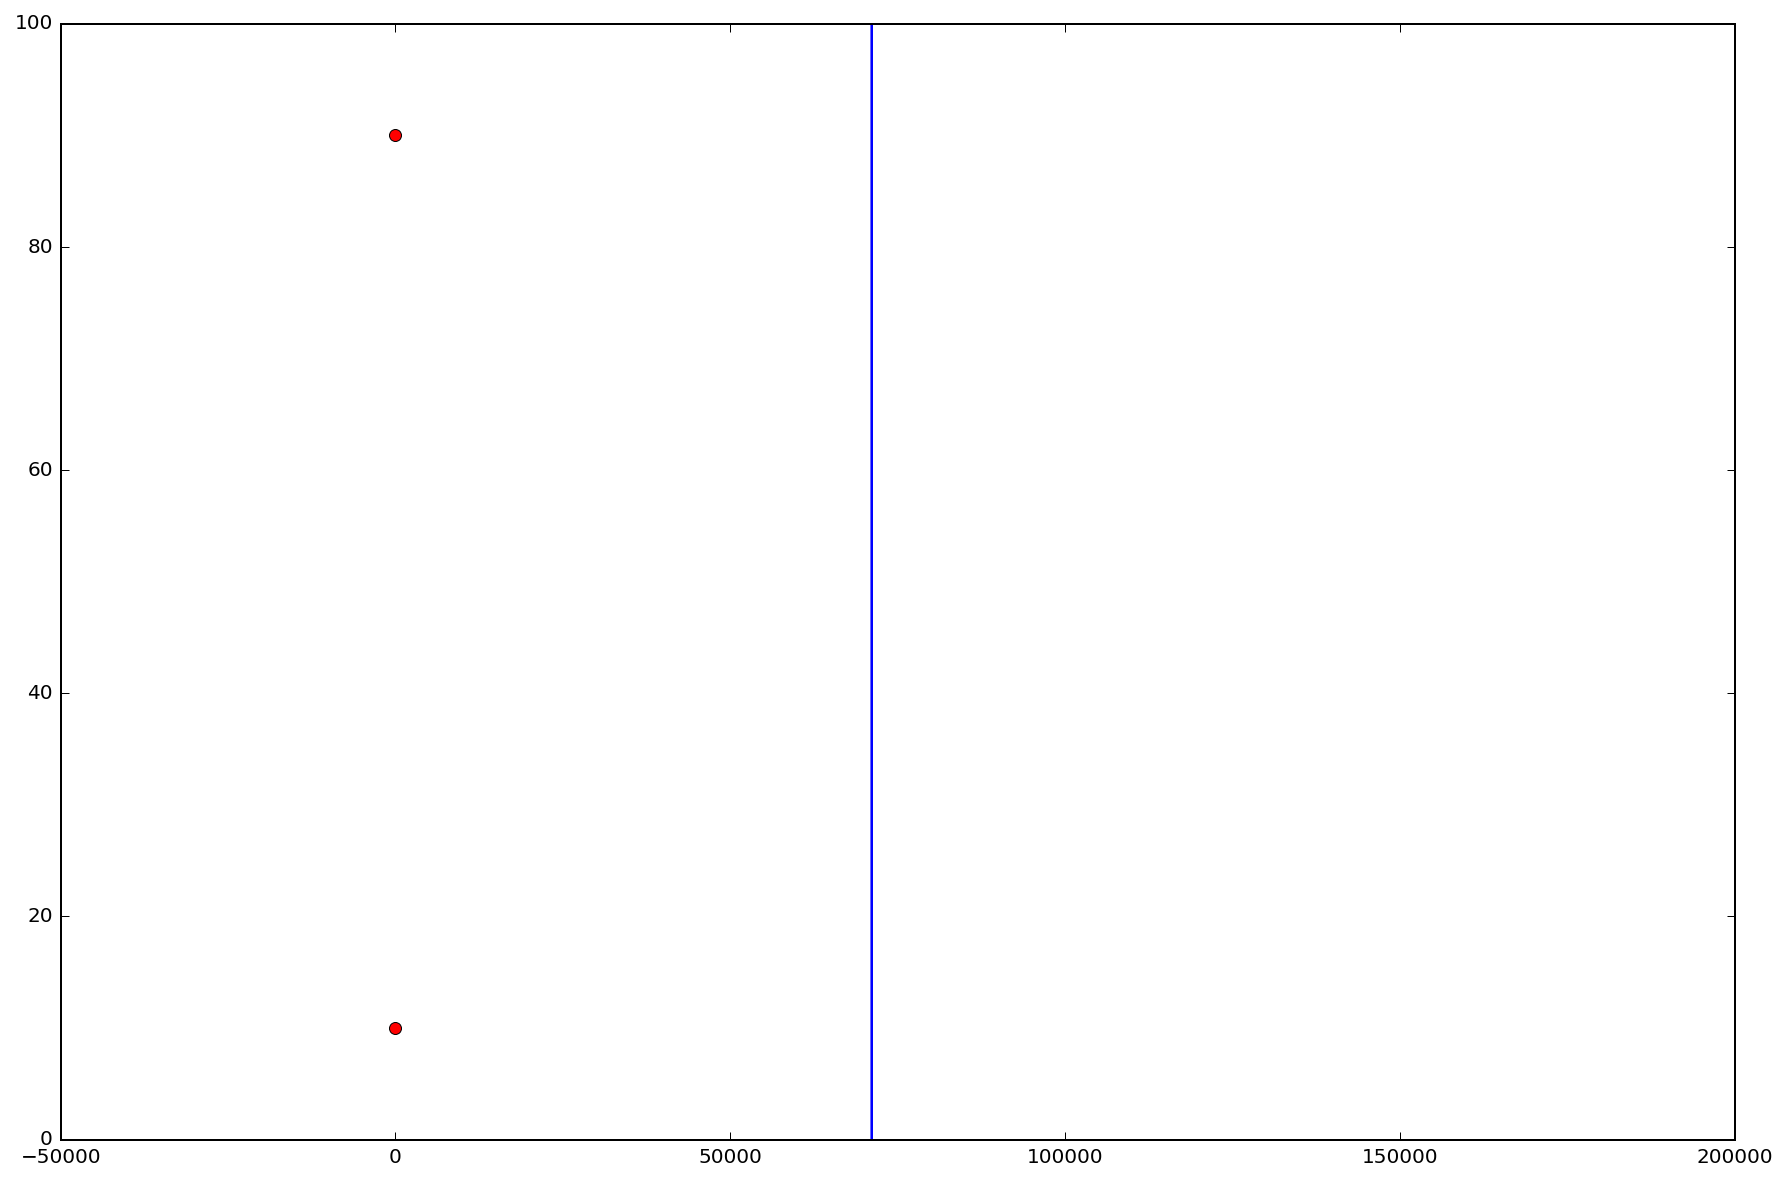

TEST  9


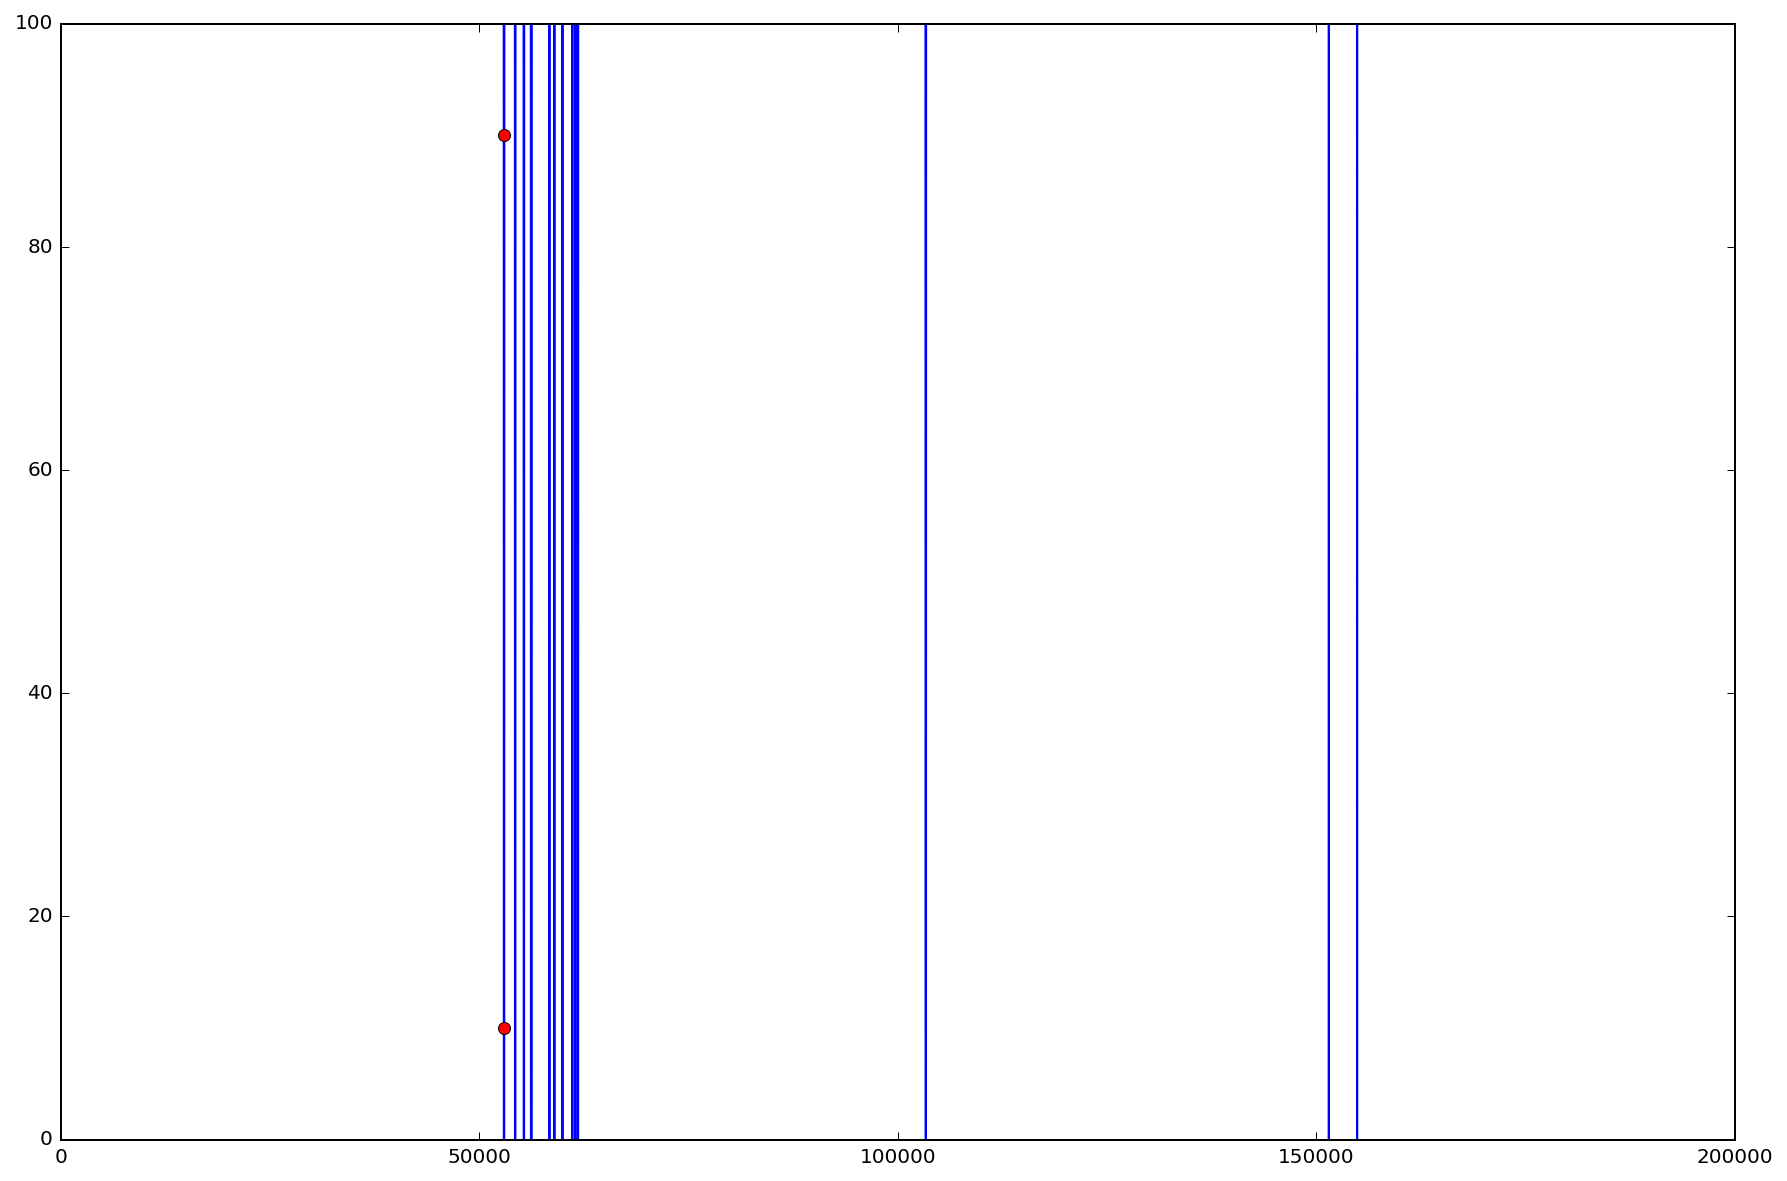

TEST  10


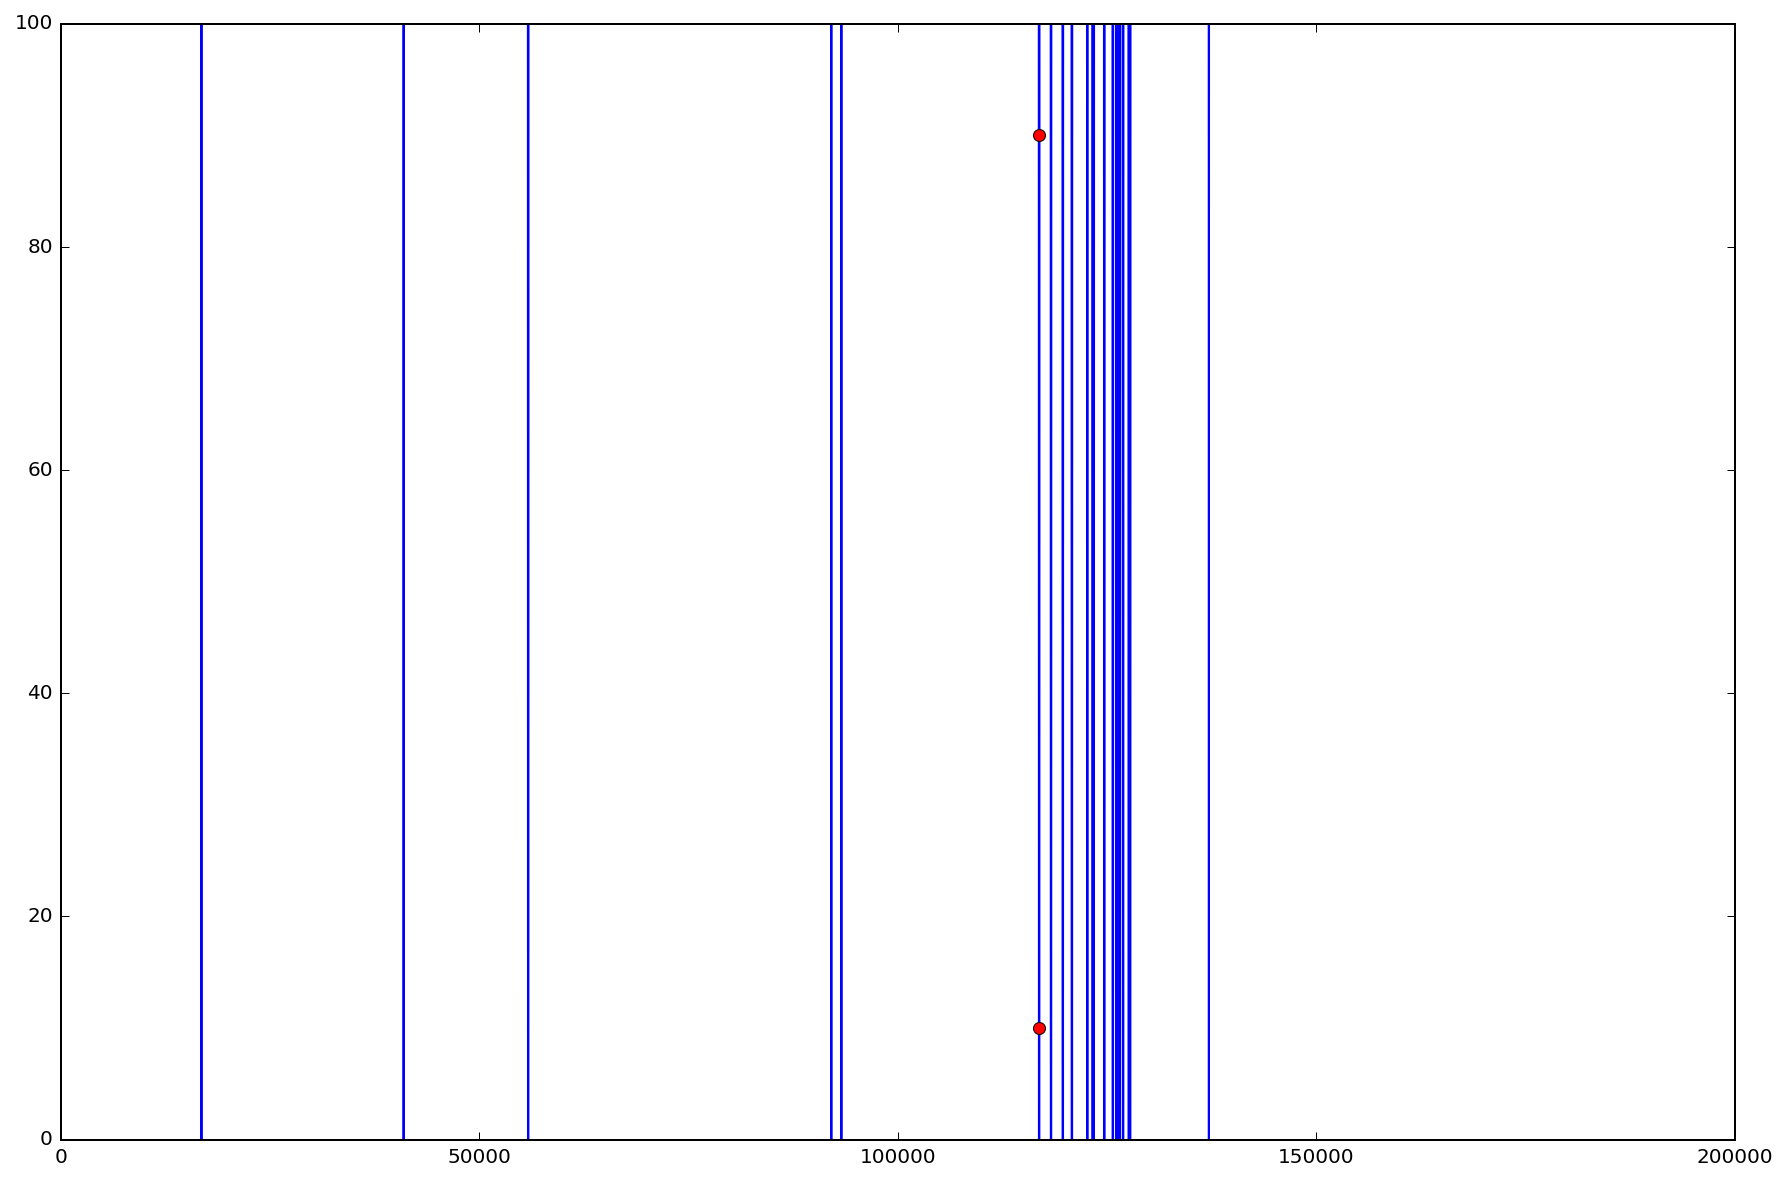

TEST  11


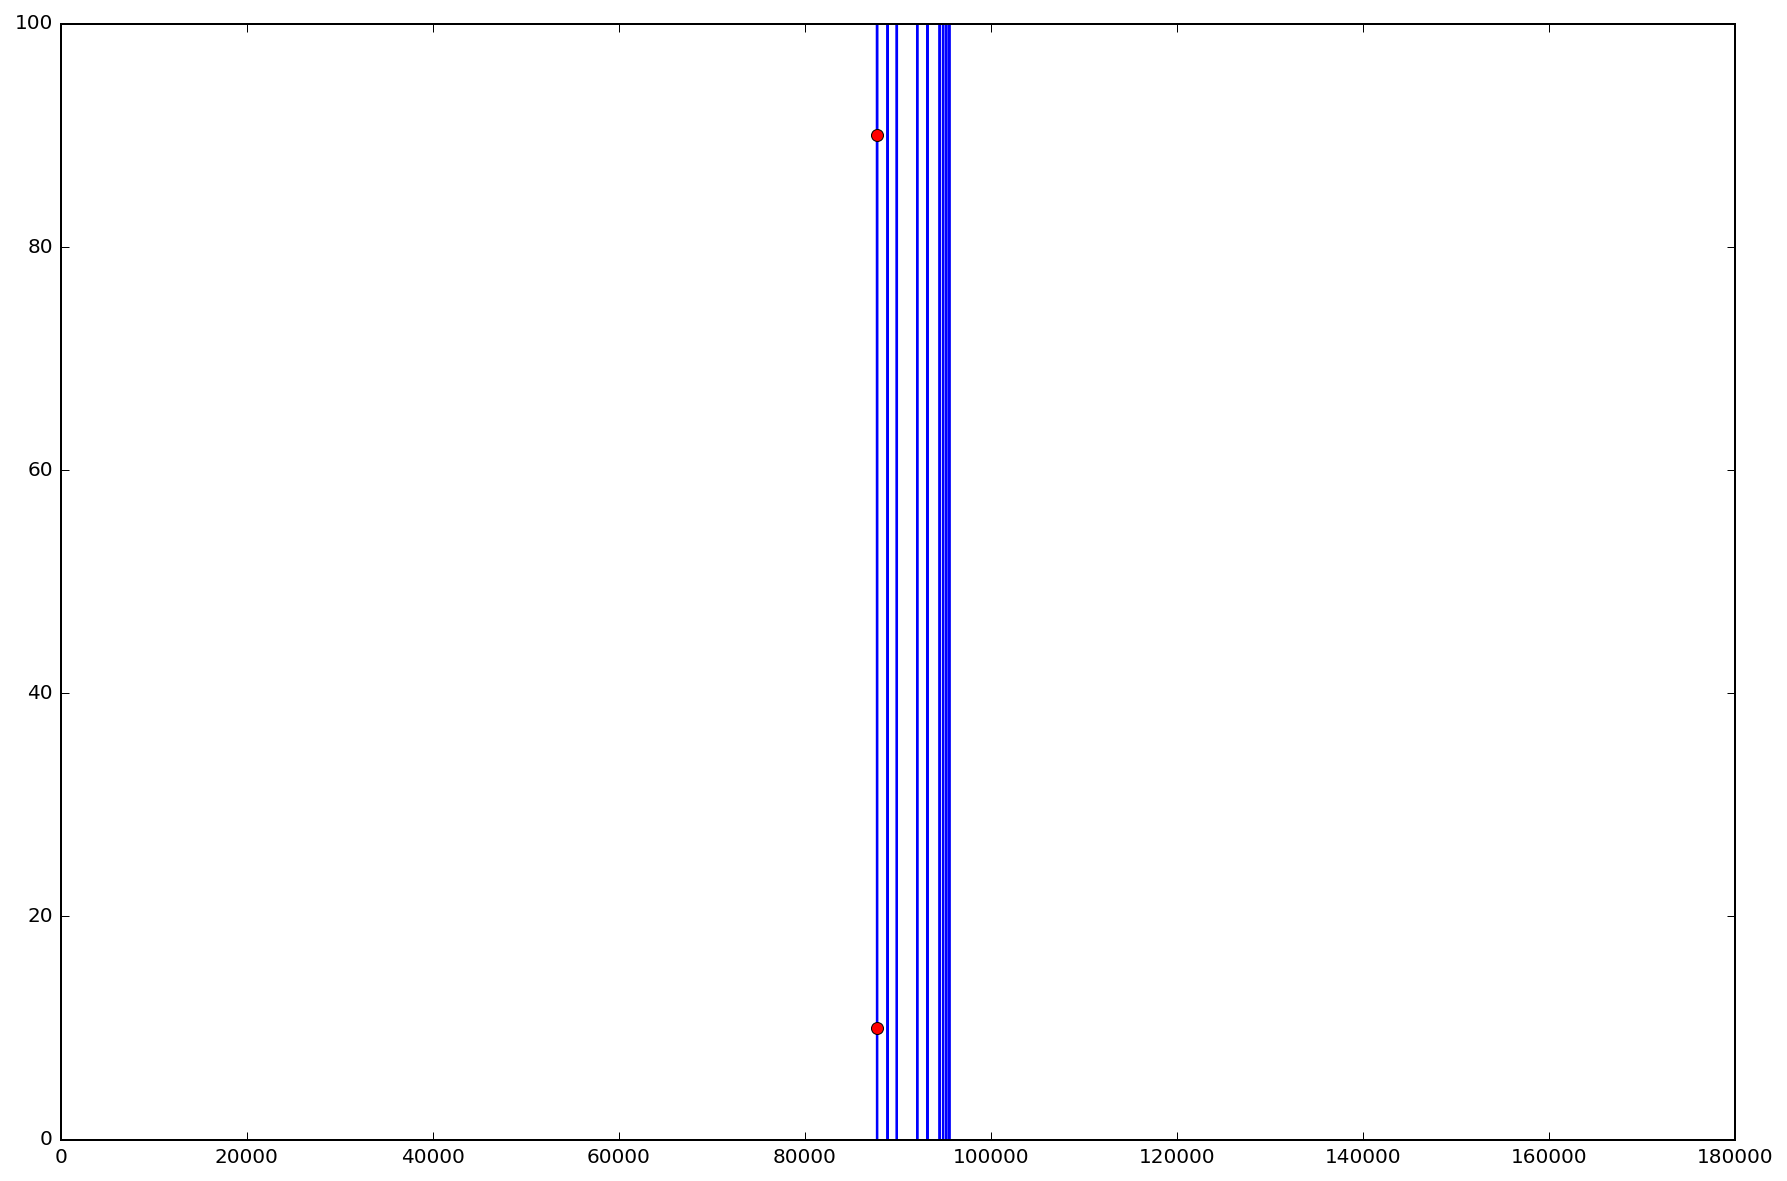

TEST  12


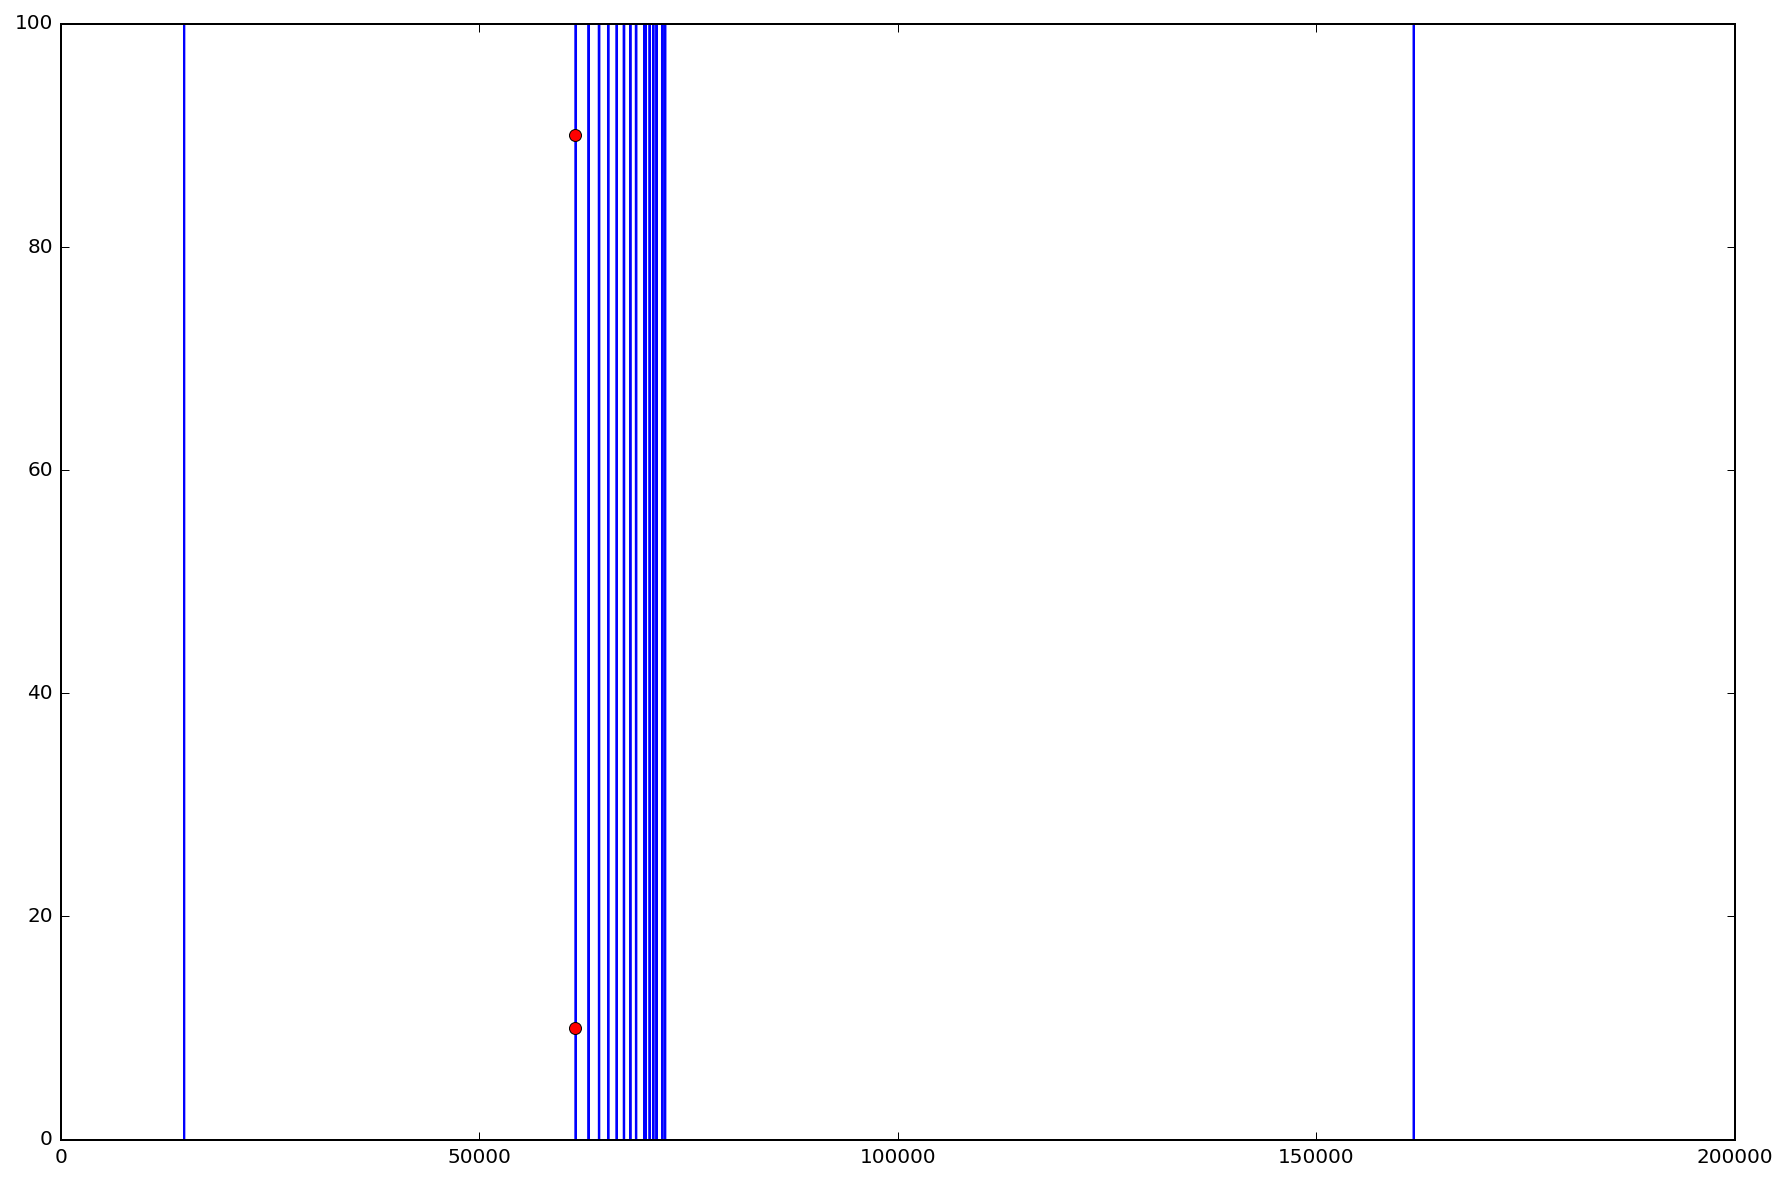

TEST  13


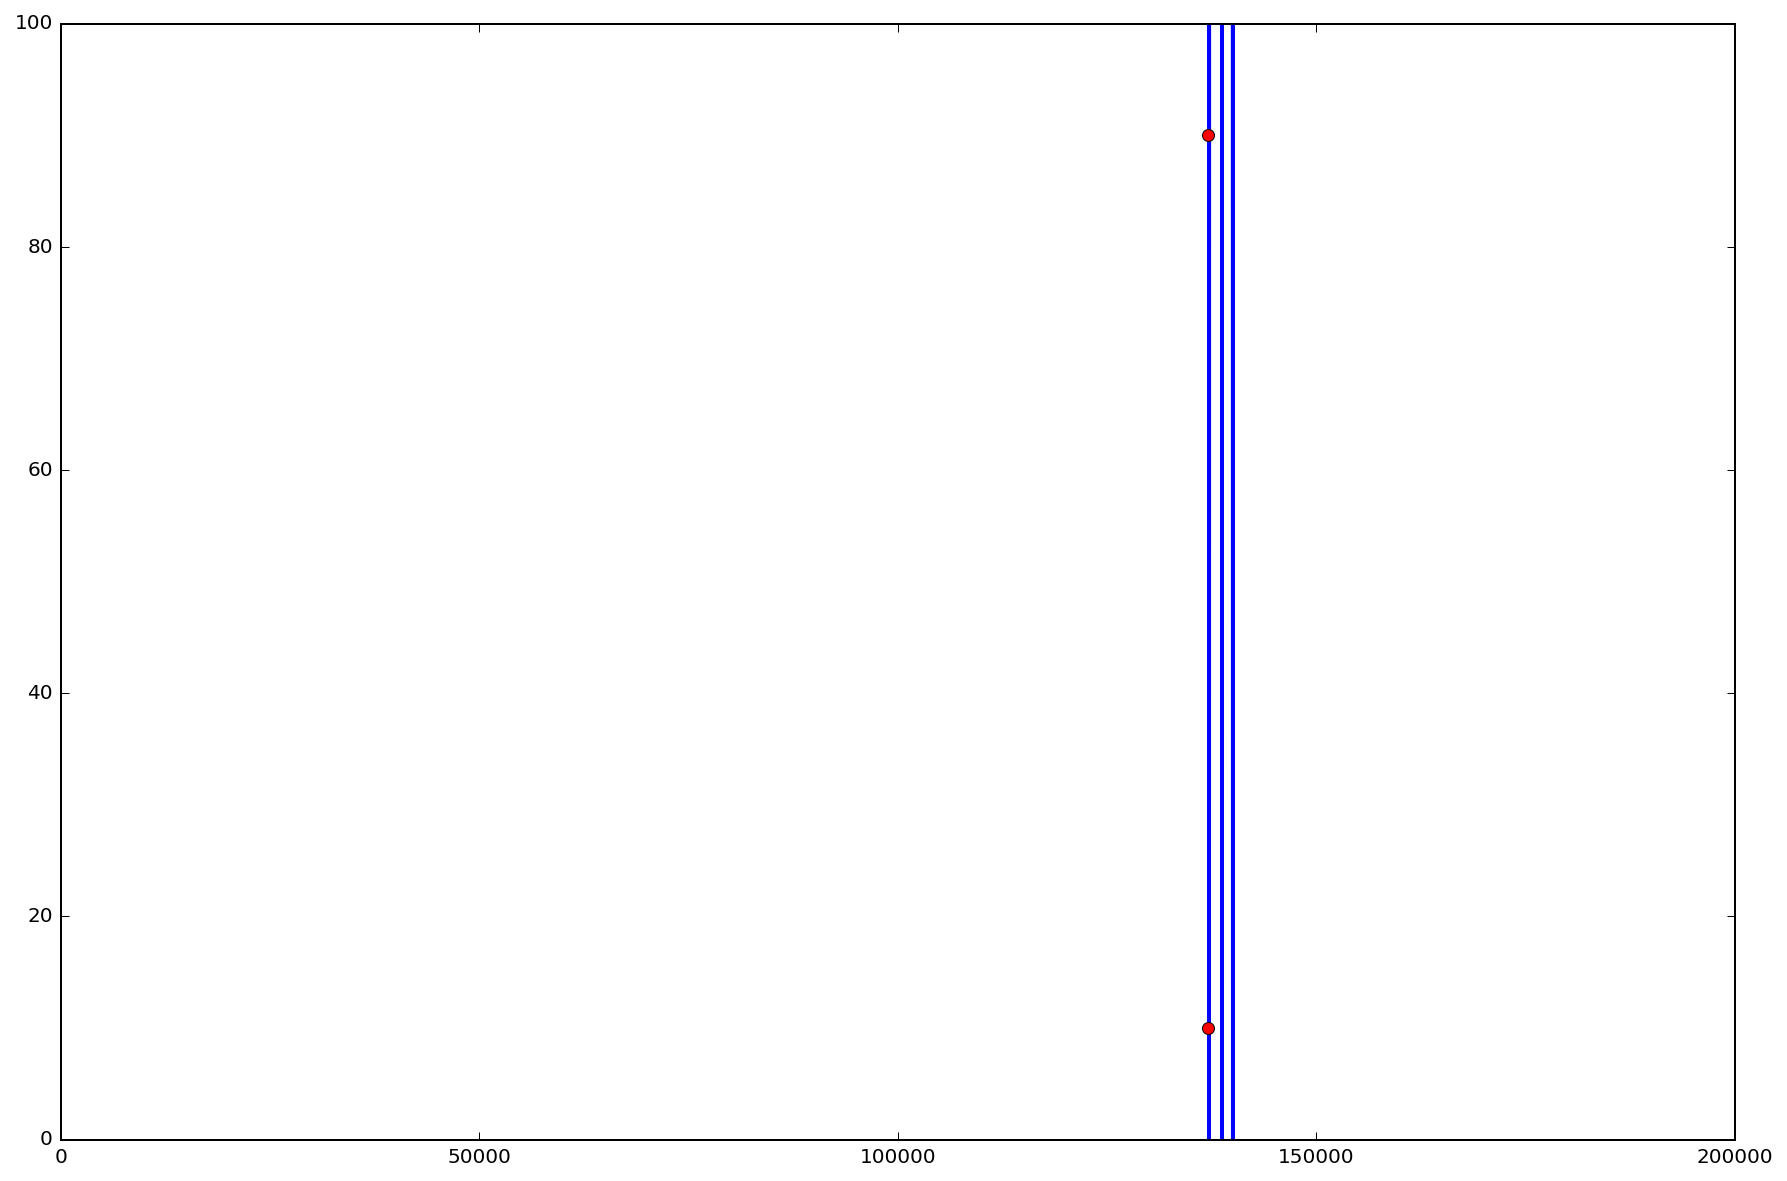

TEST  14


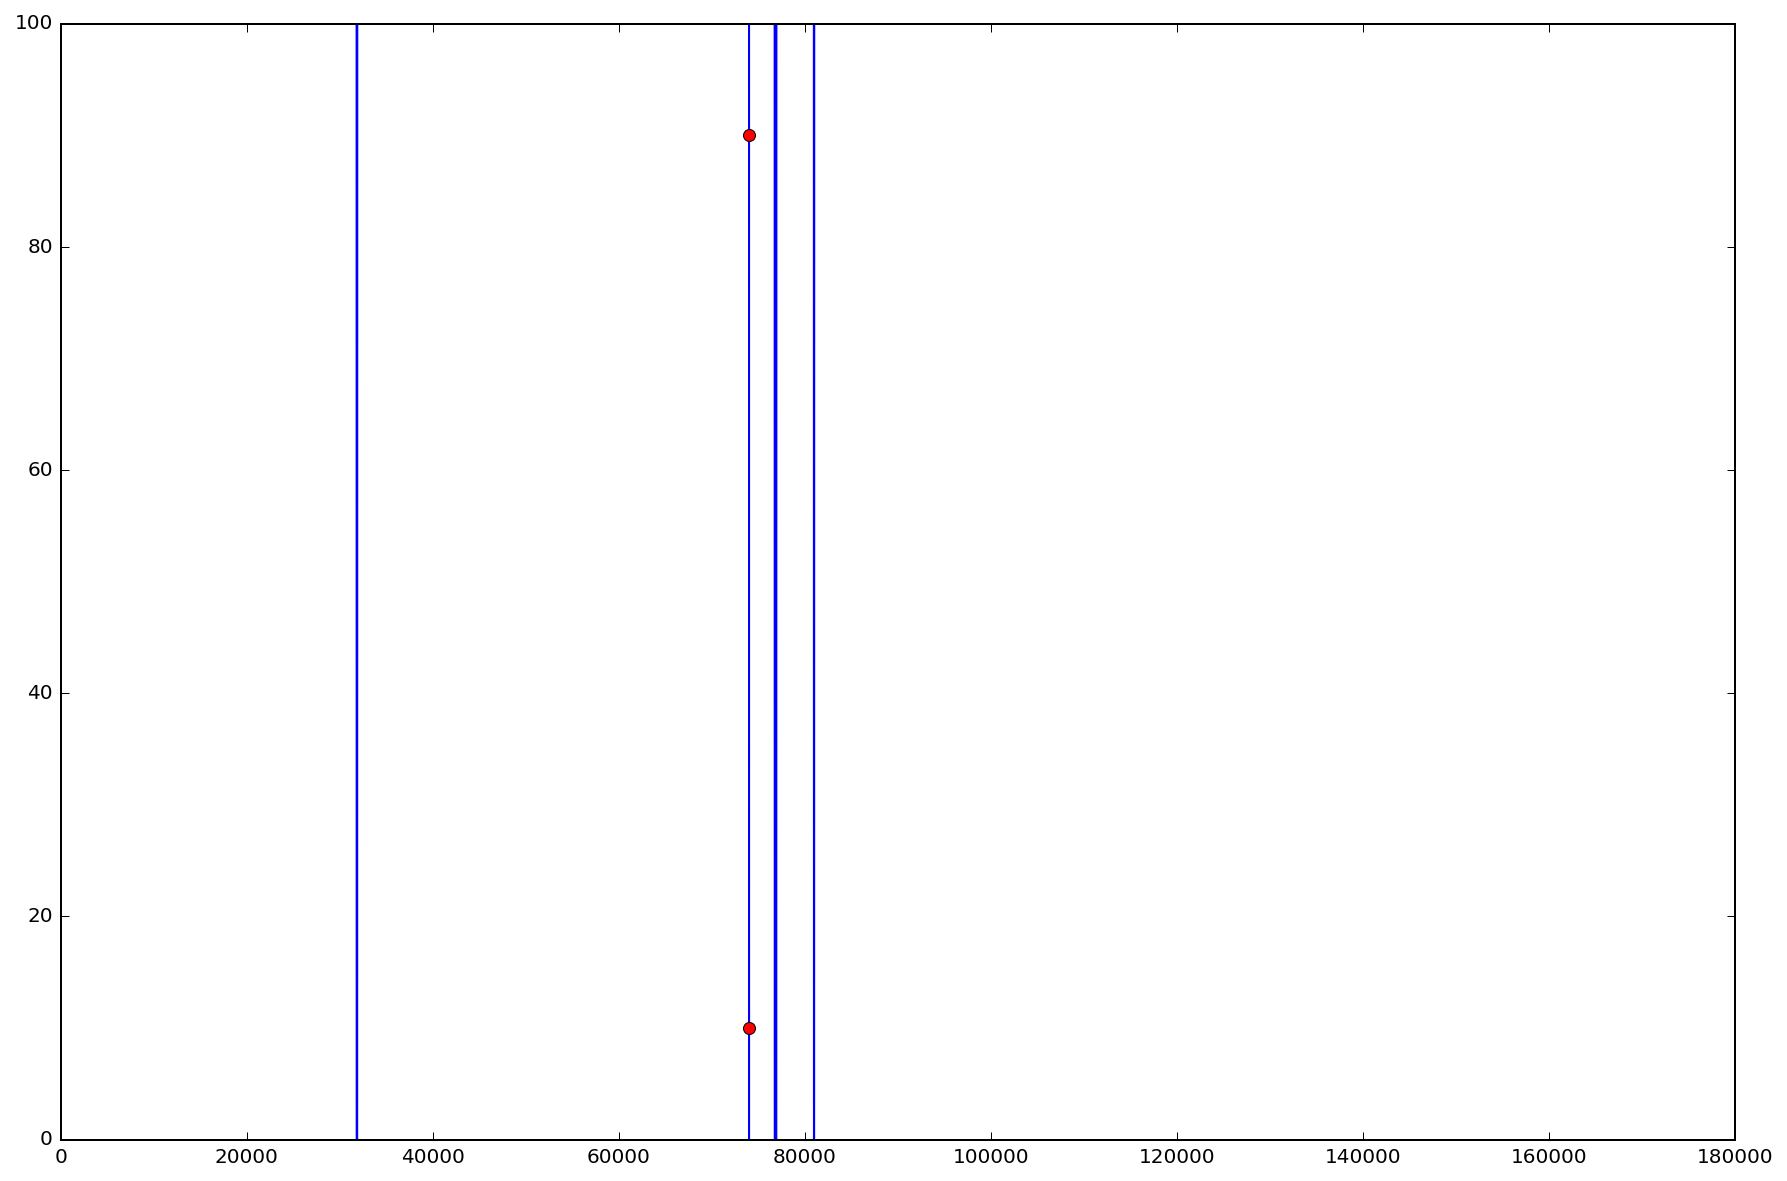

TEST  15


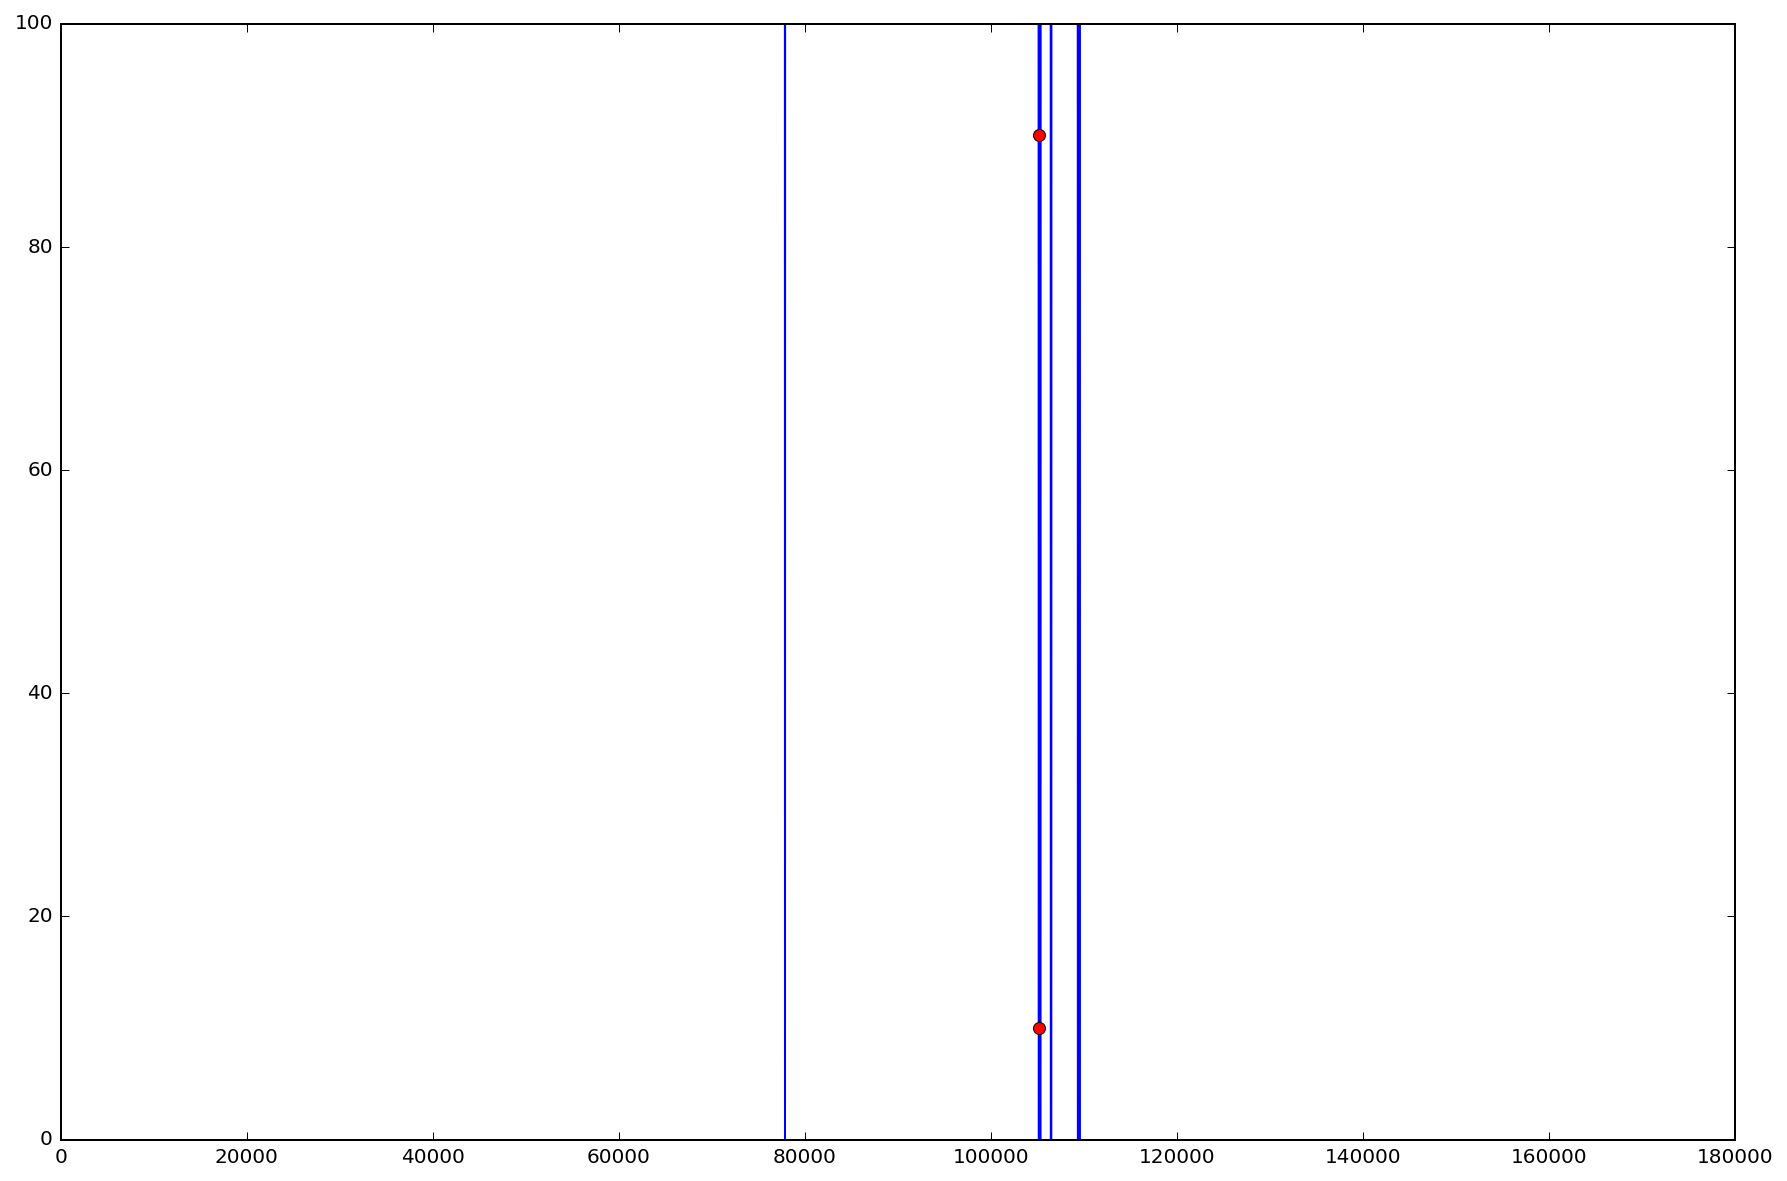

TEST  16


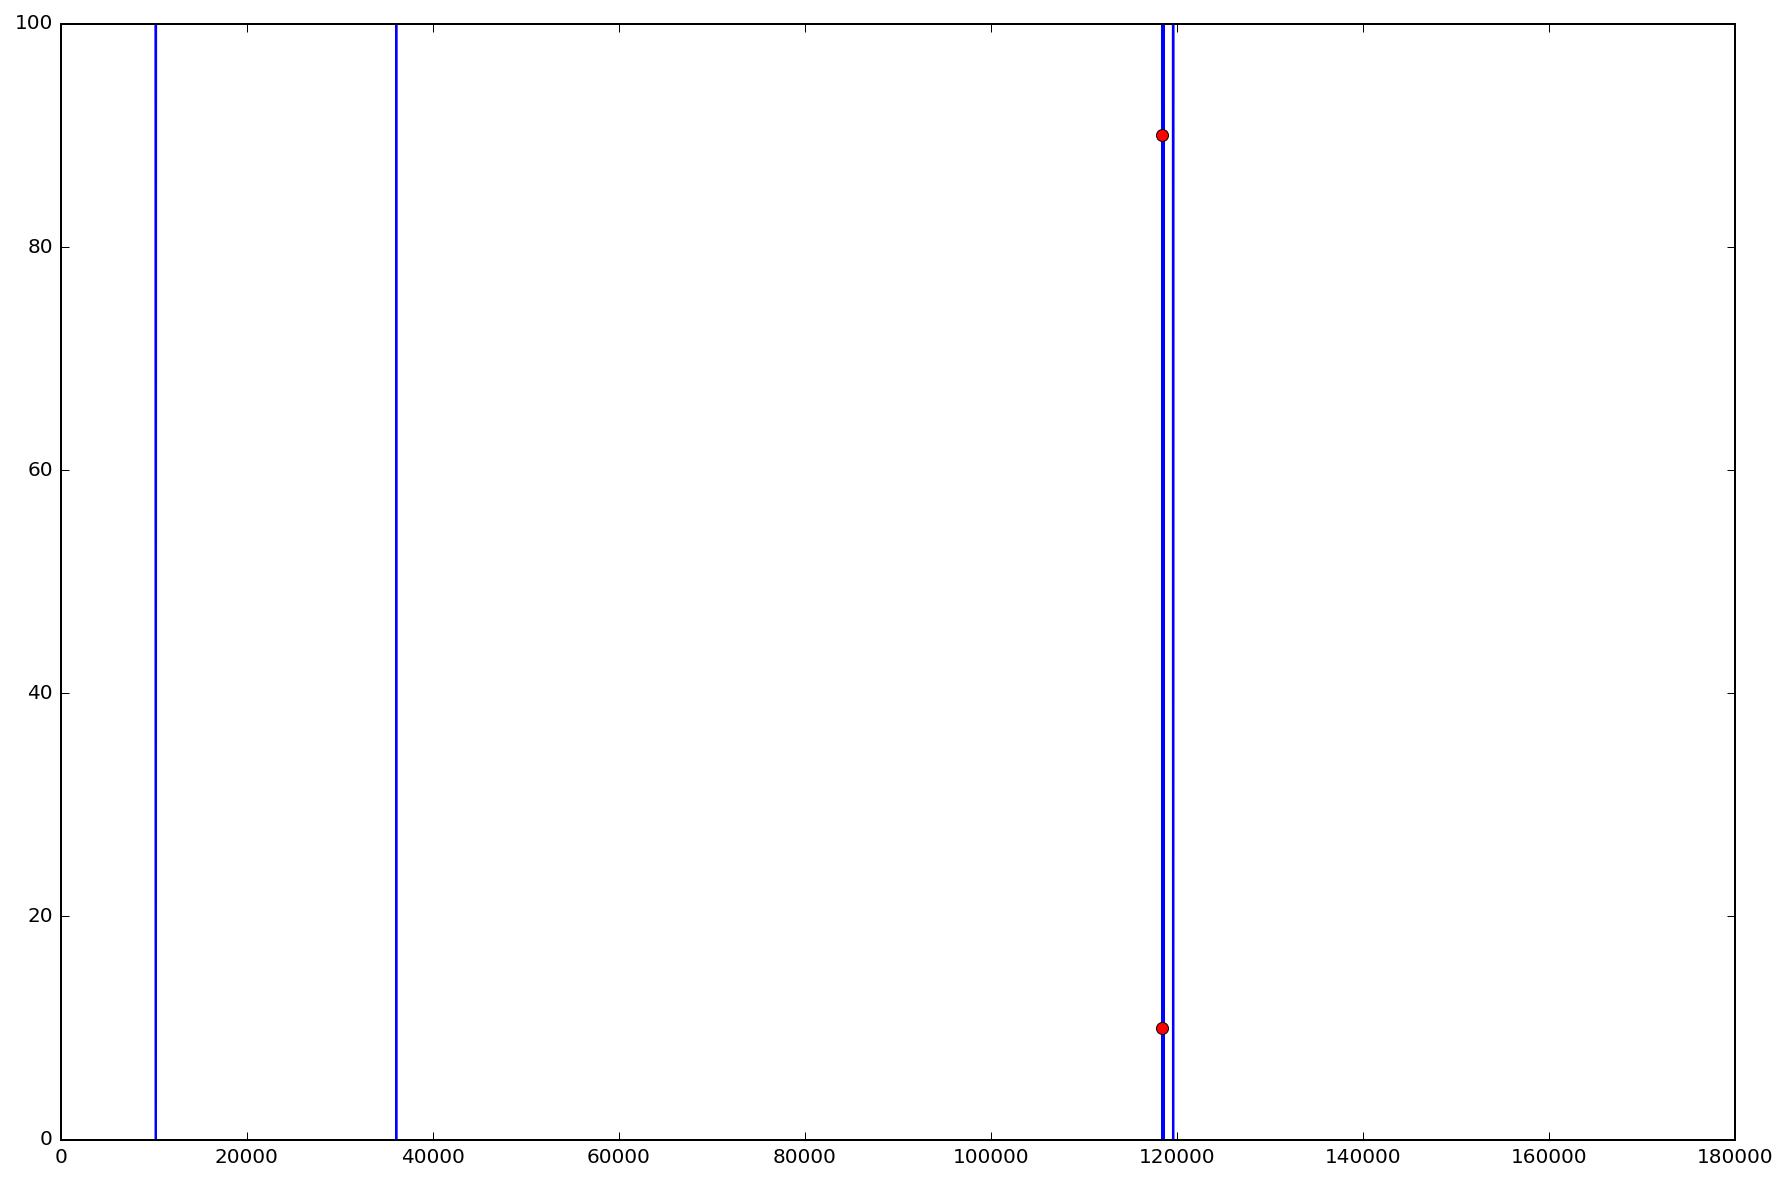

TEST  17


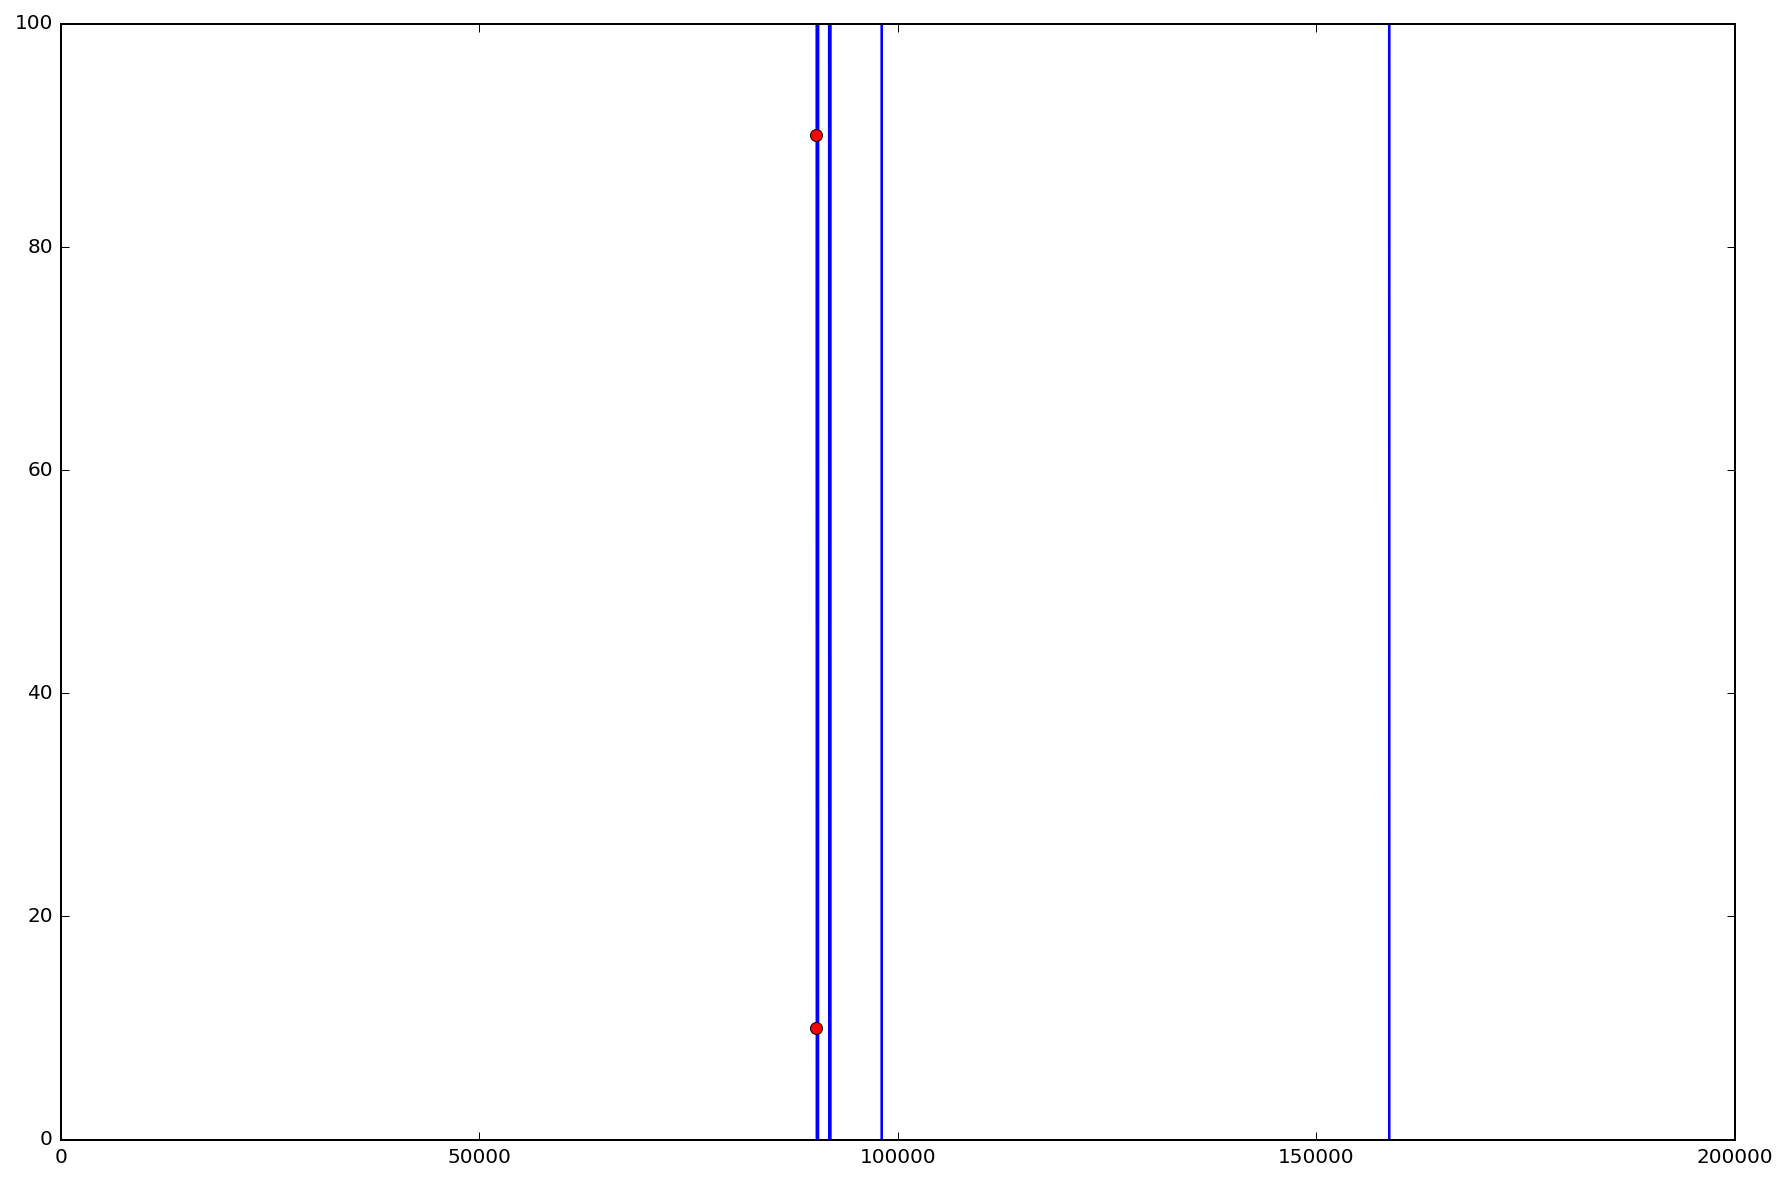

TEST  18


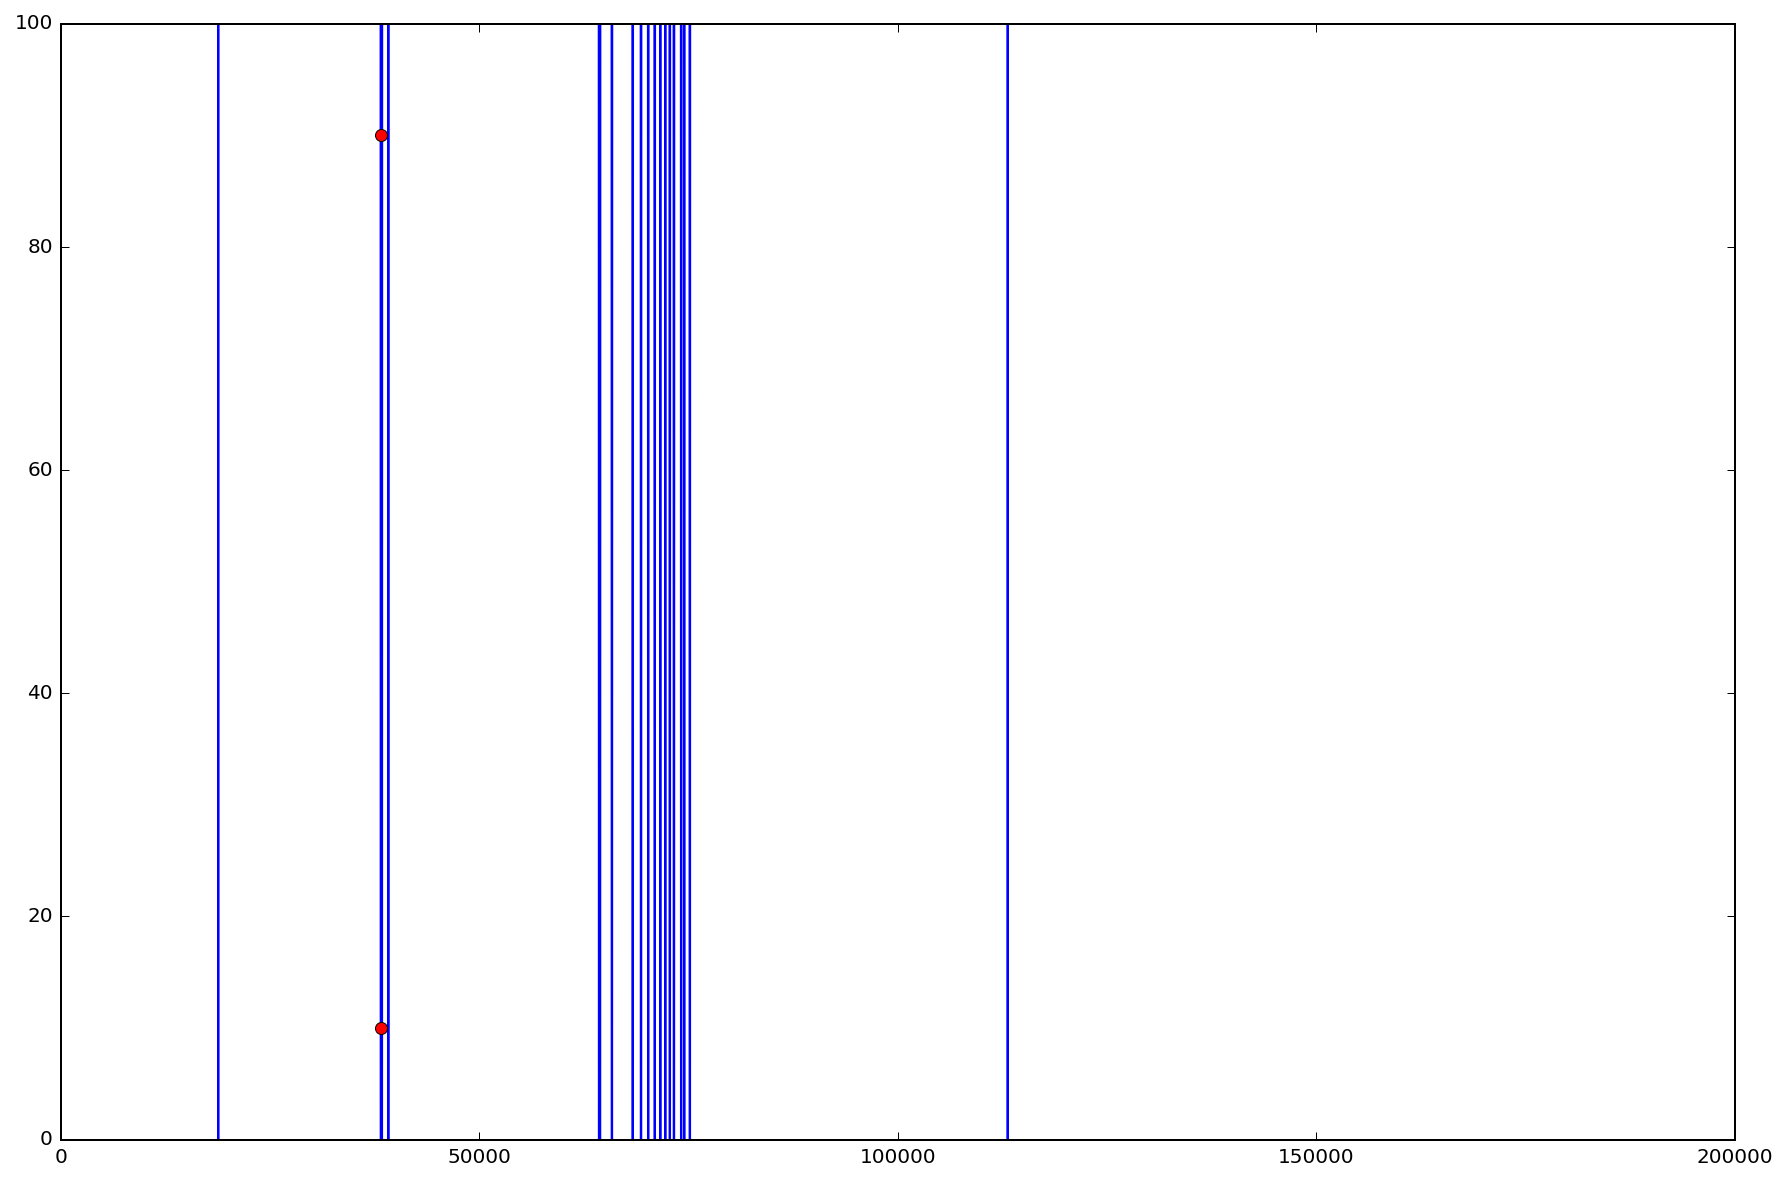

TEST  19


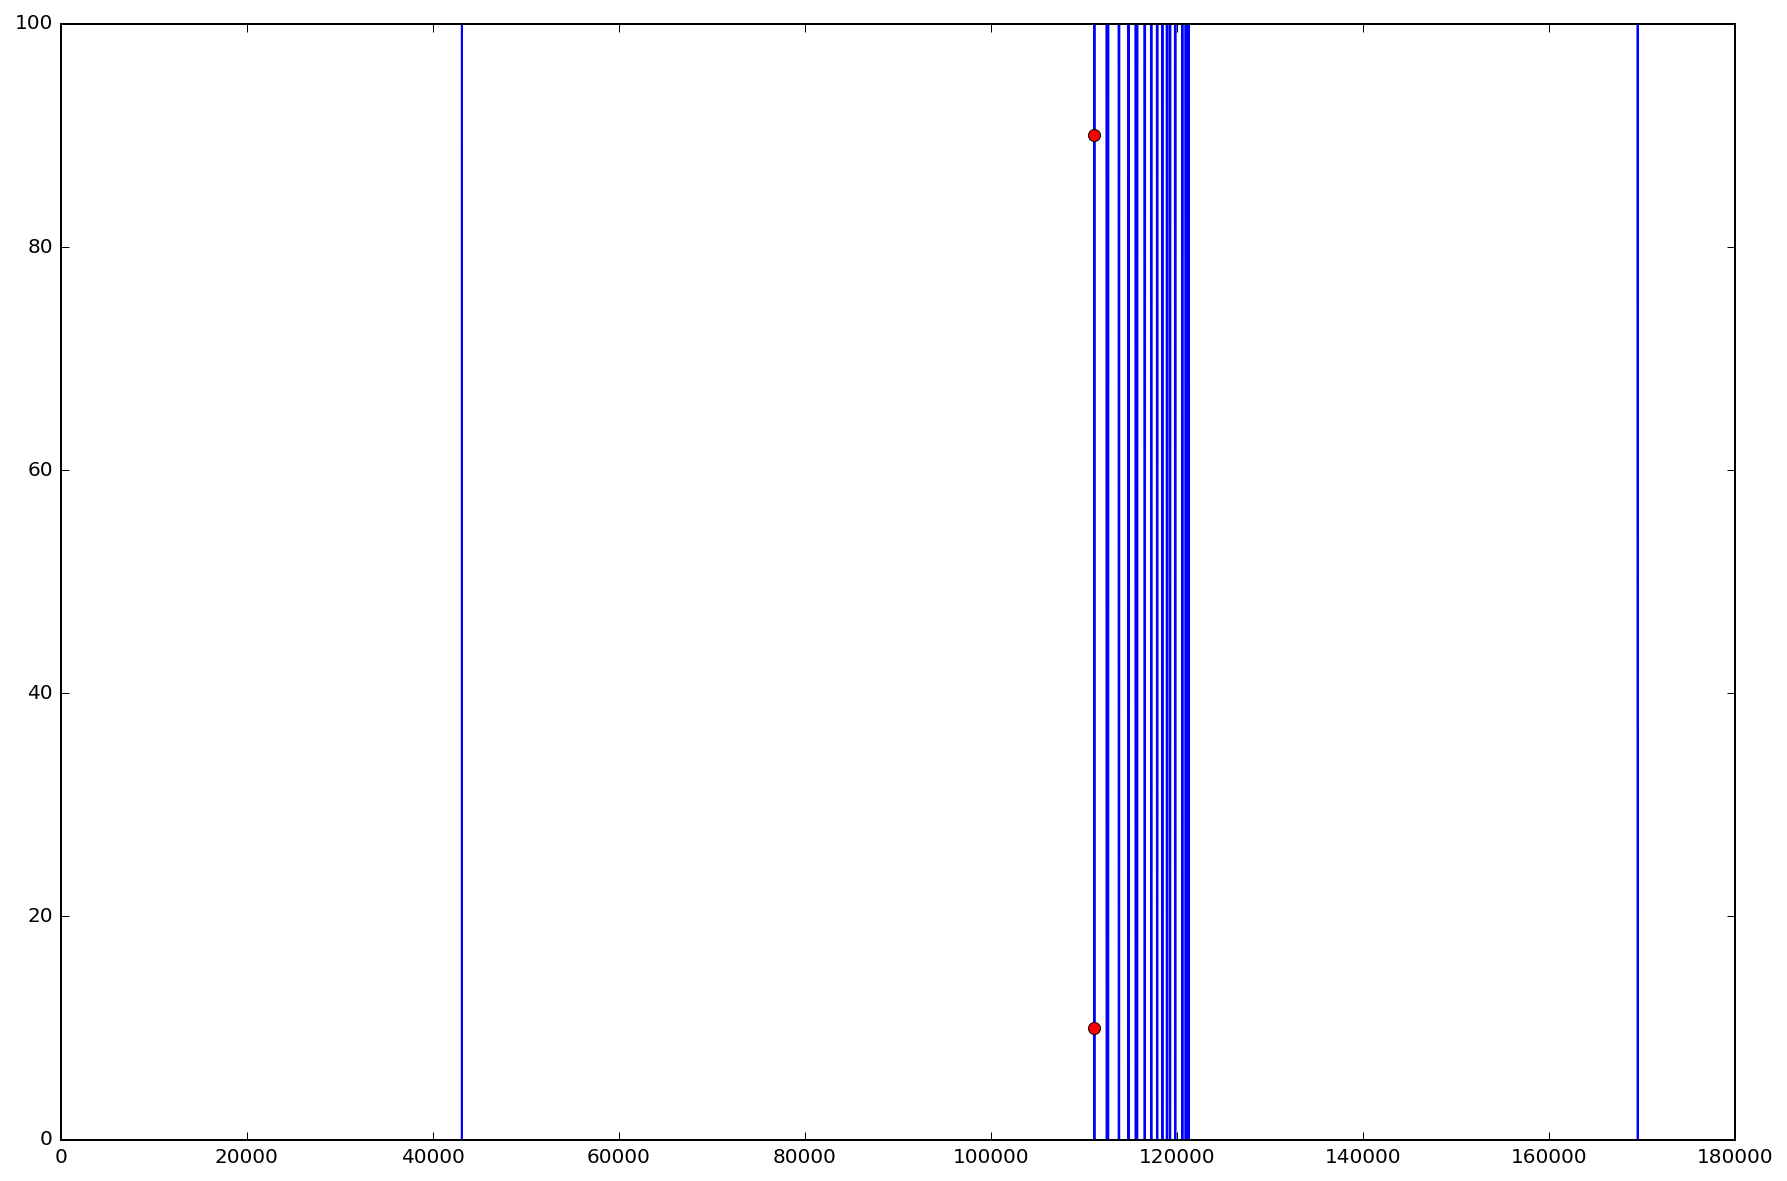

TEST  20


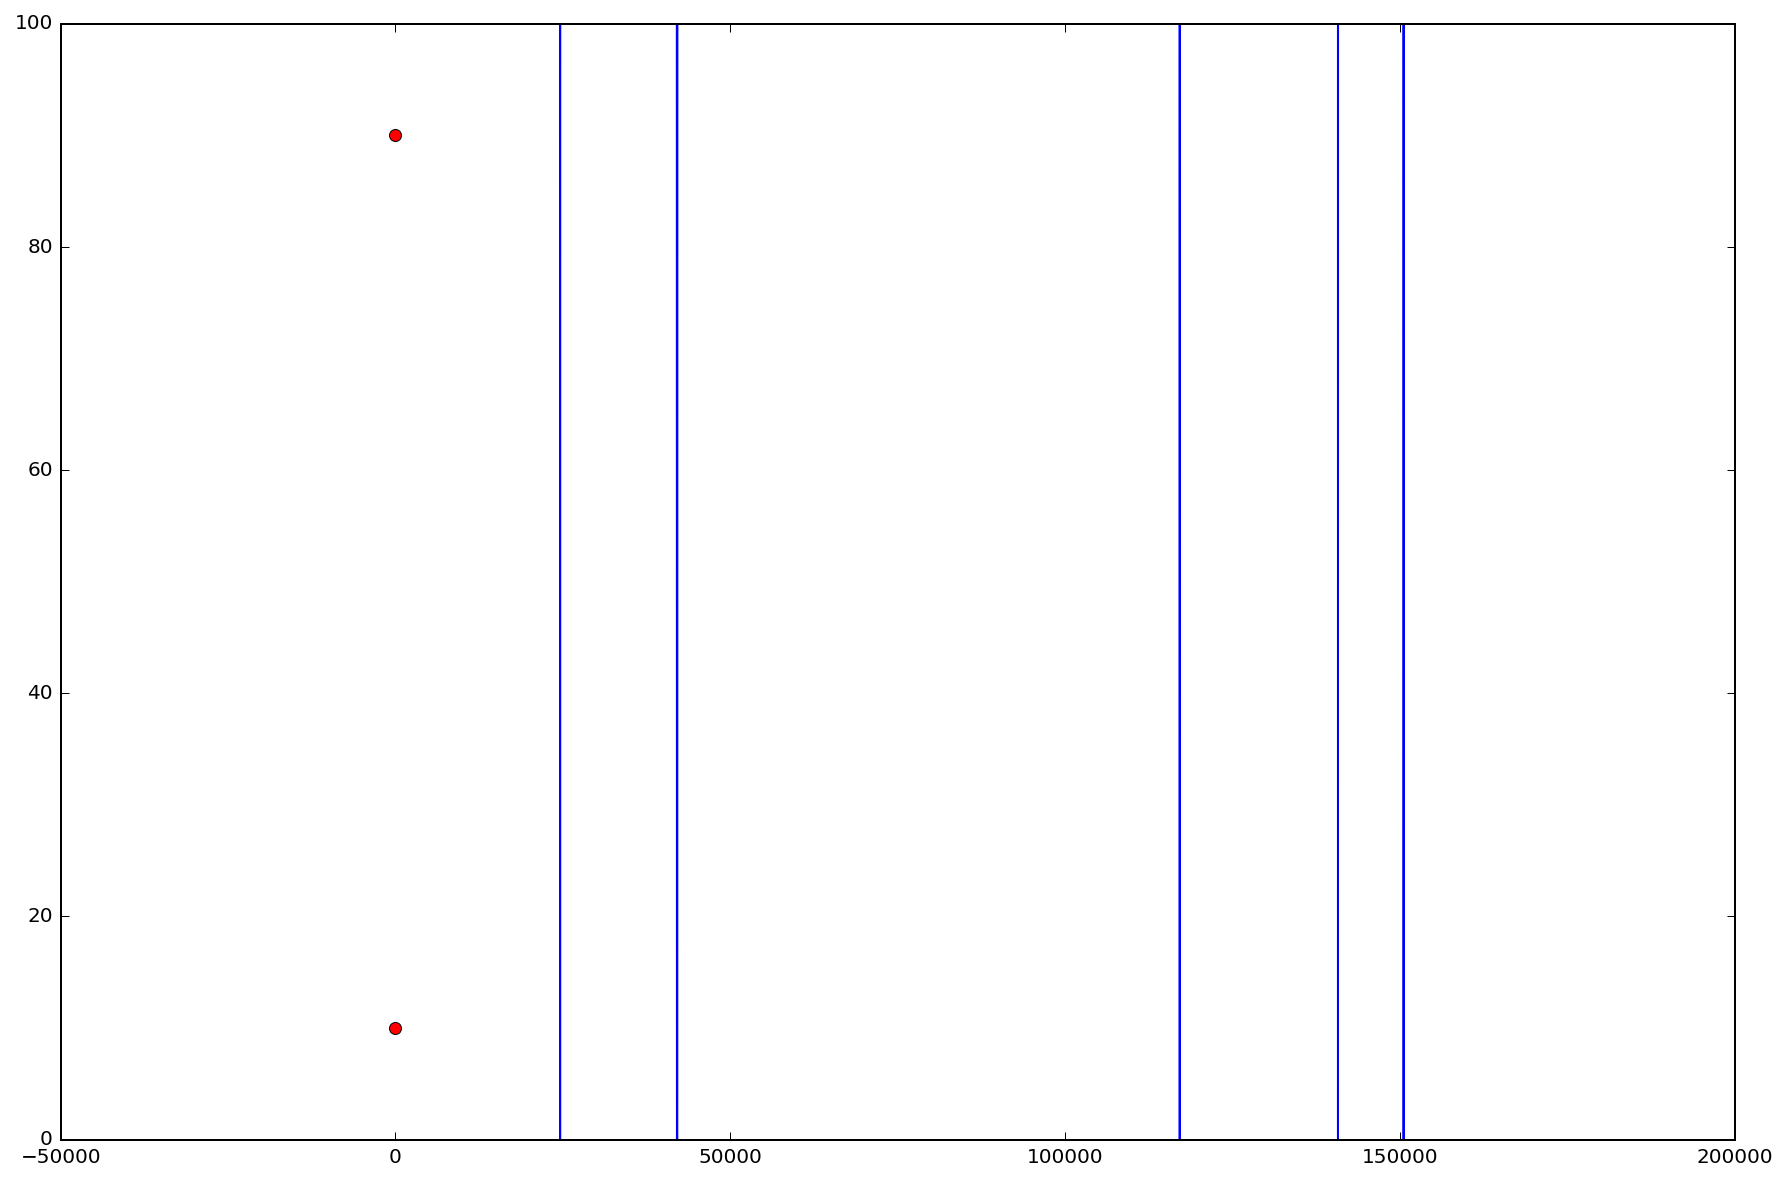

TEST  21


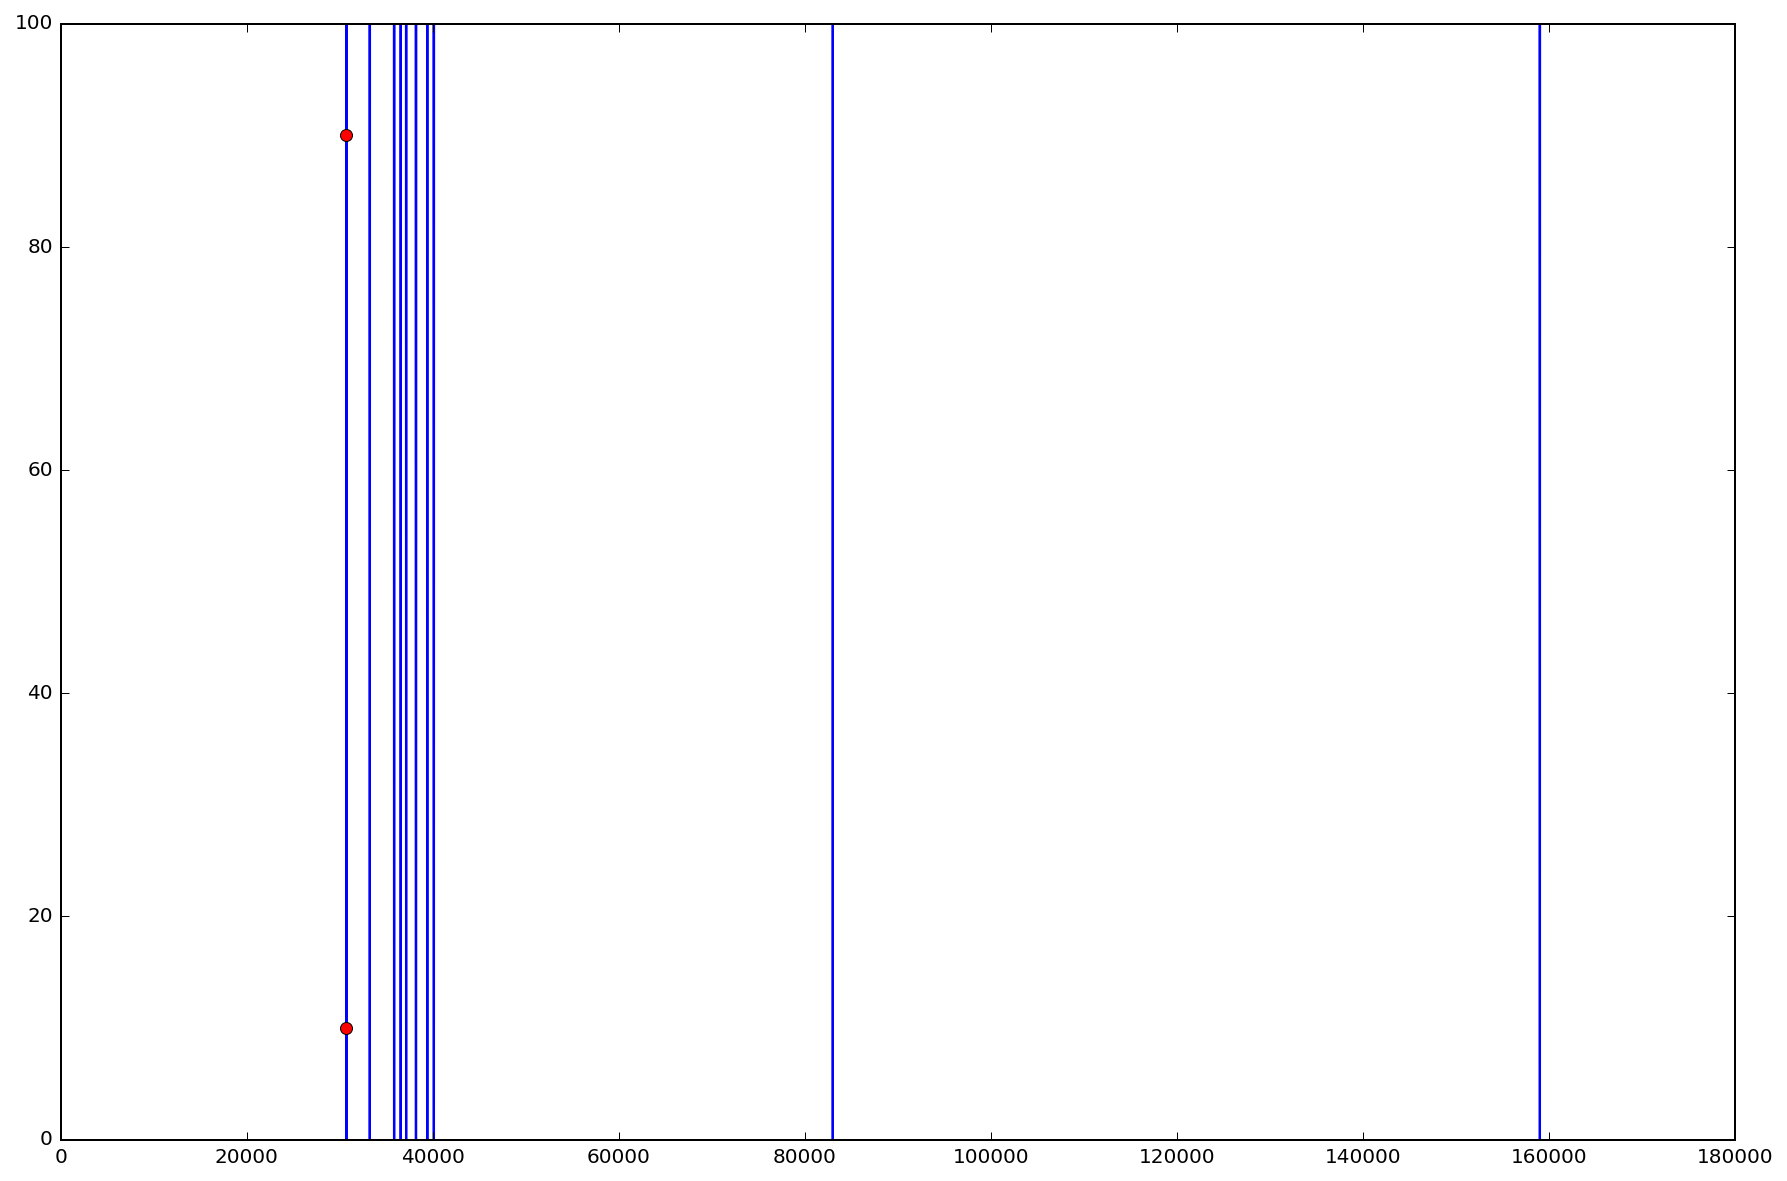

TEST  22


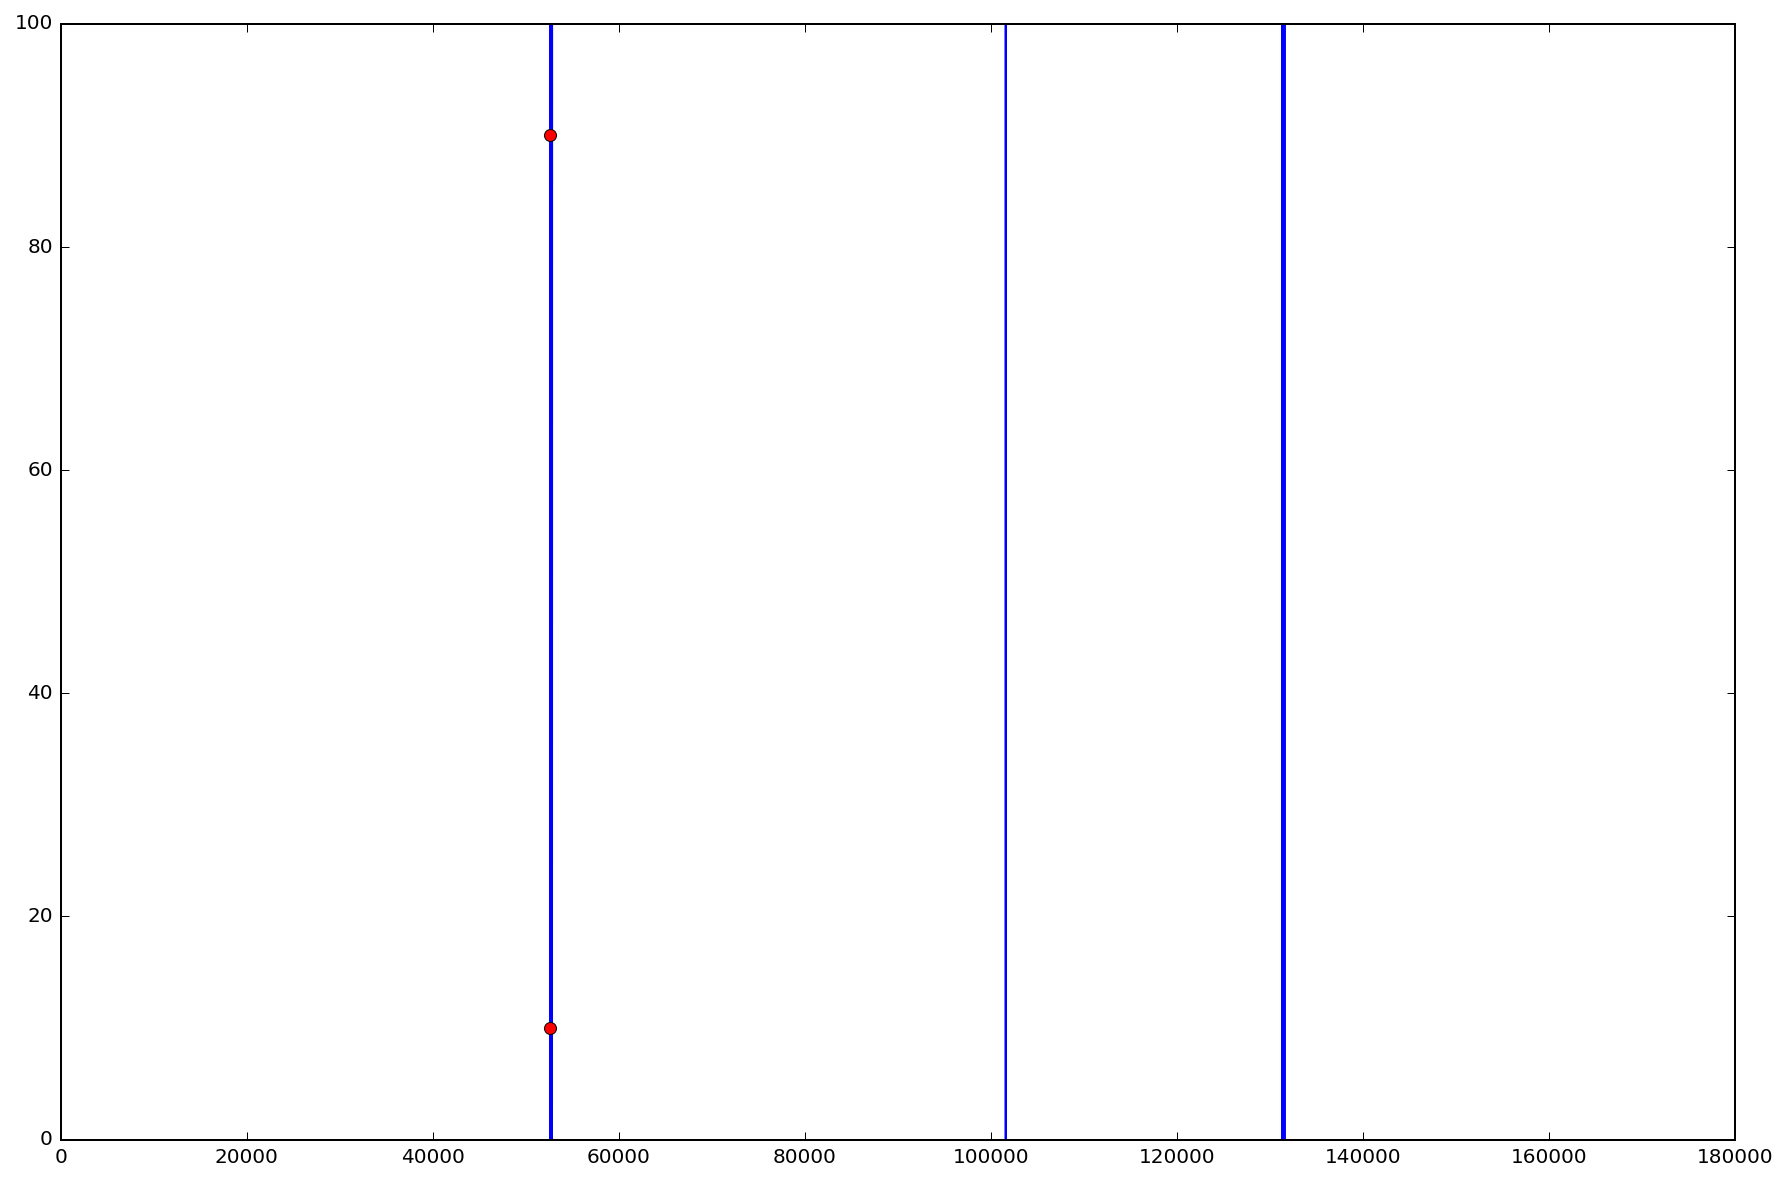

TEST  23


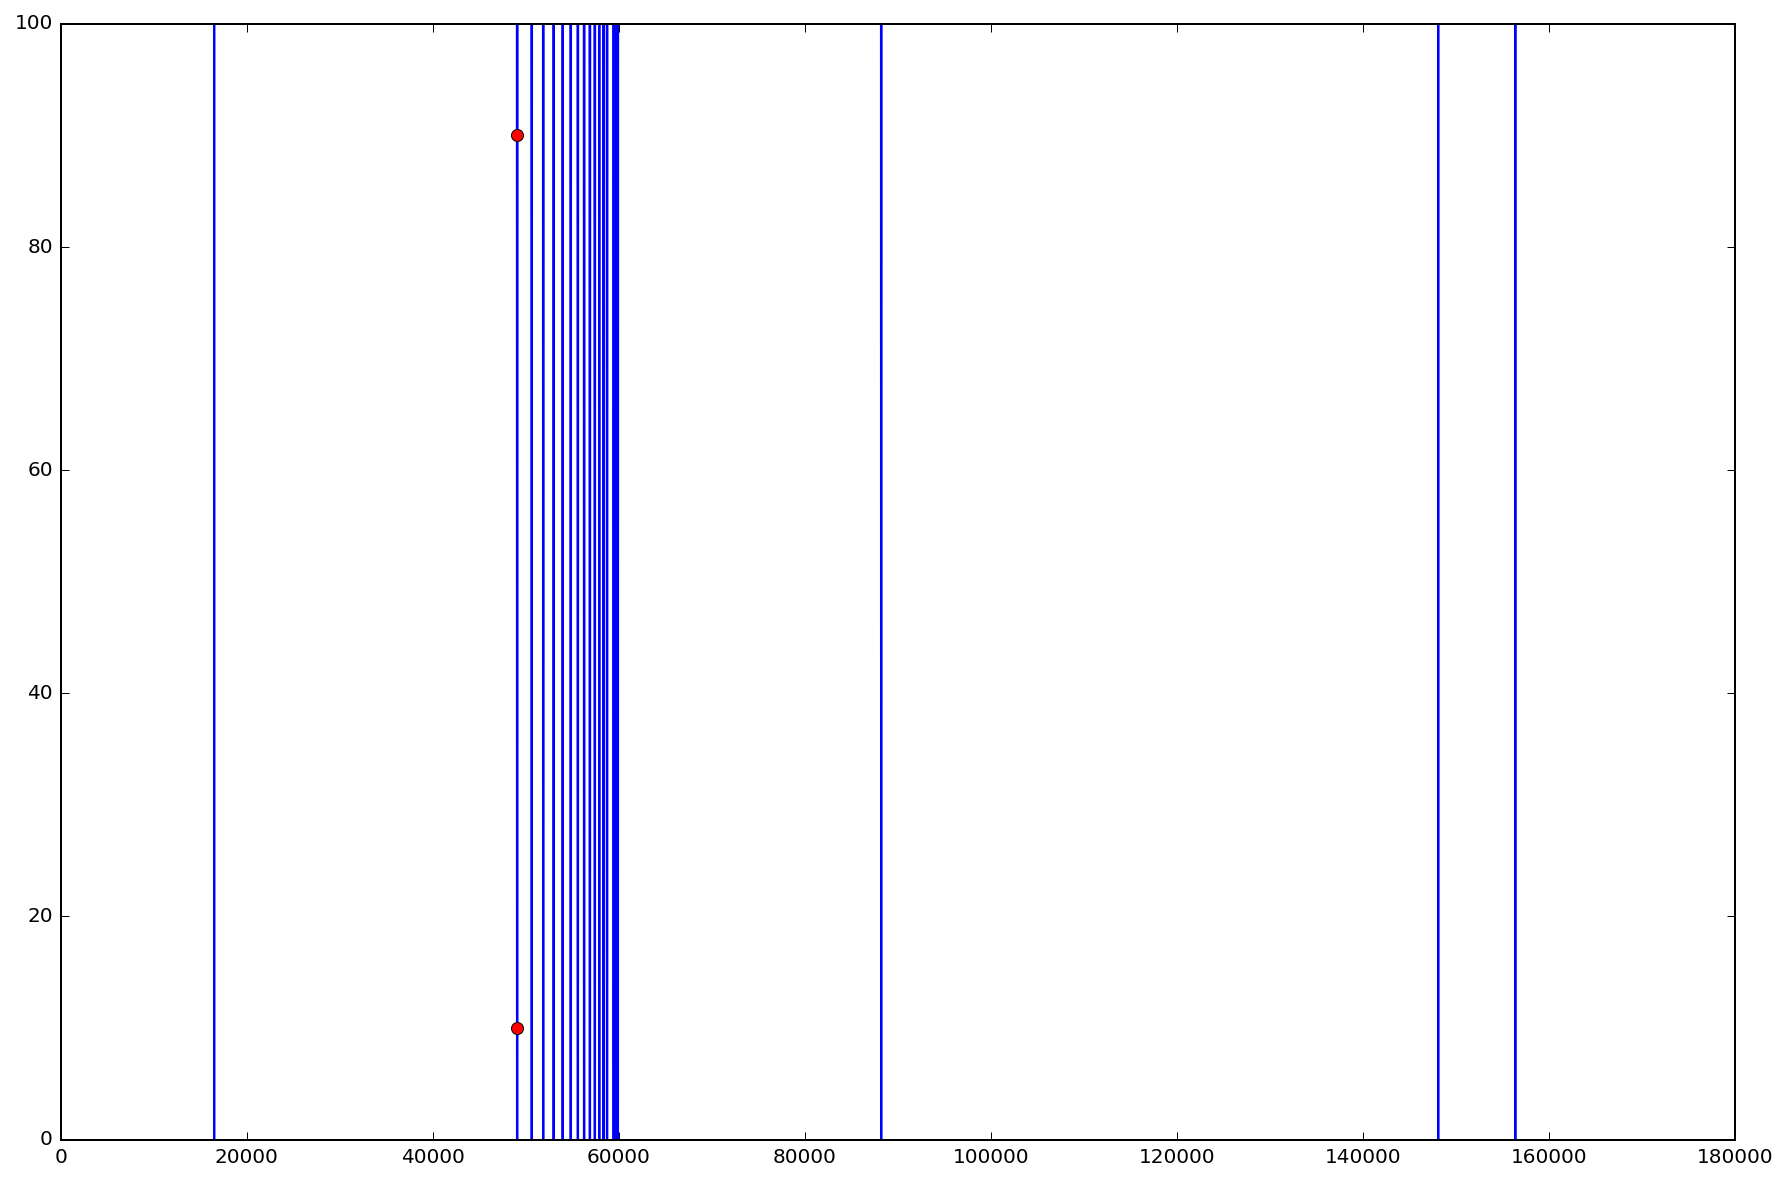

TEST  24


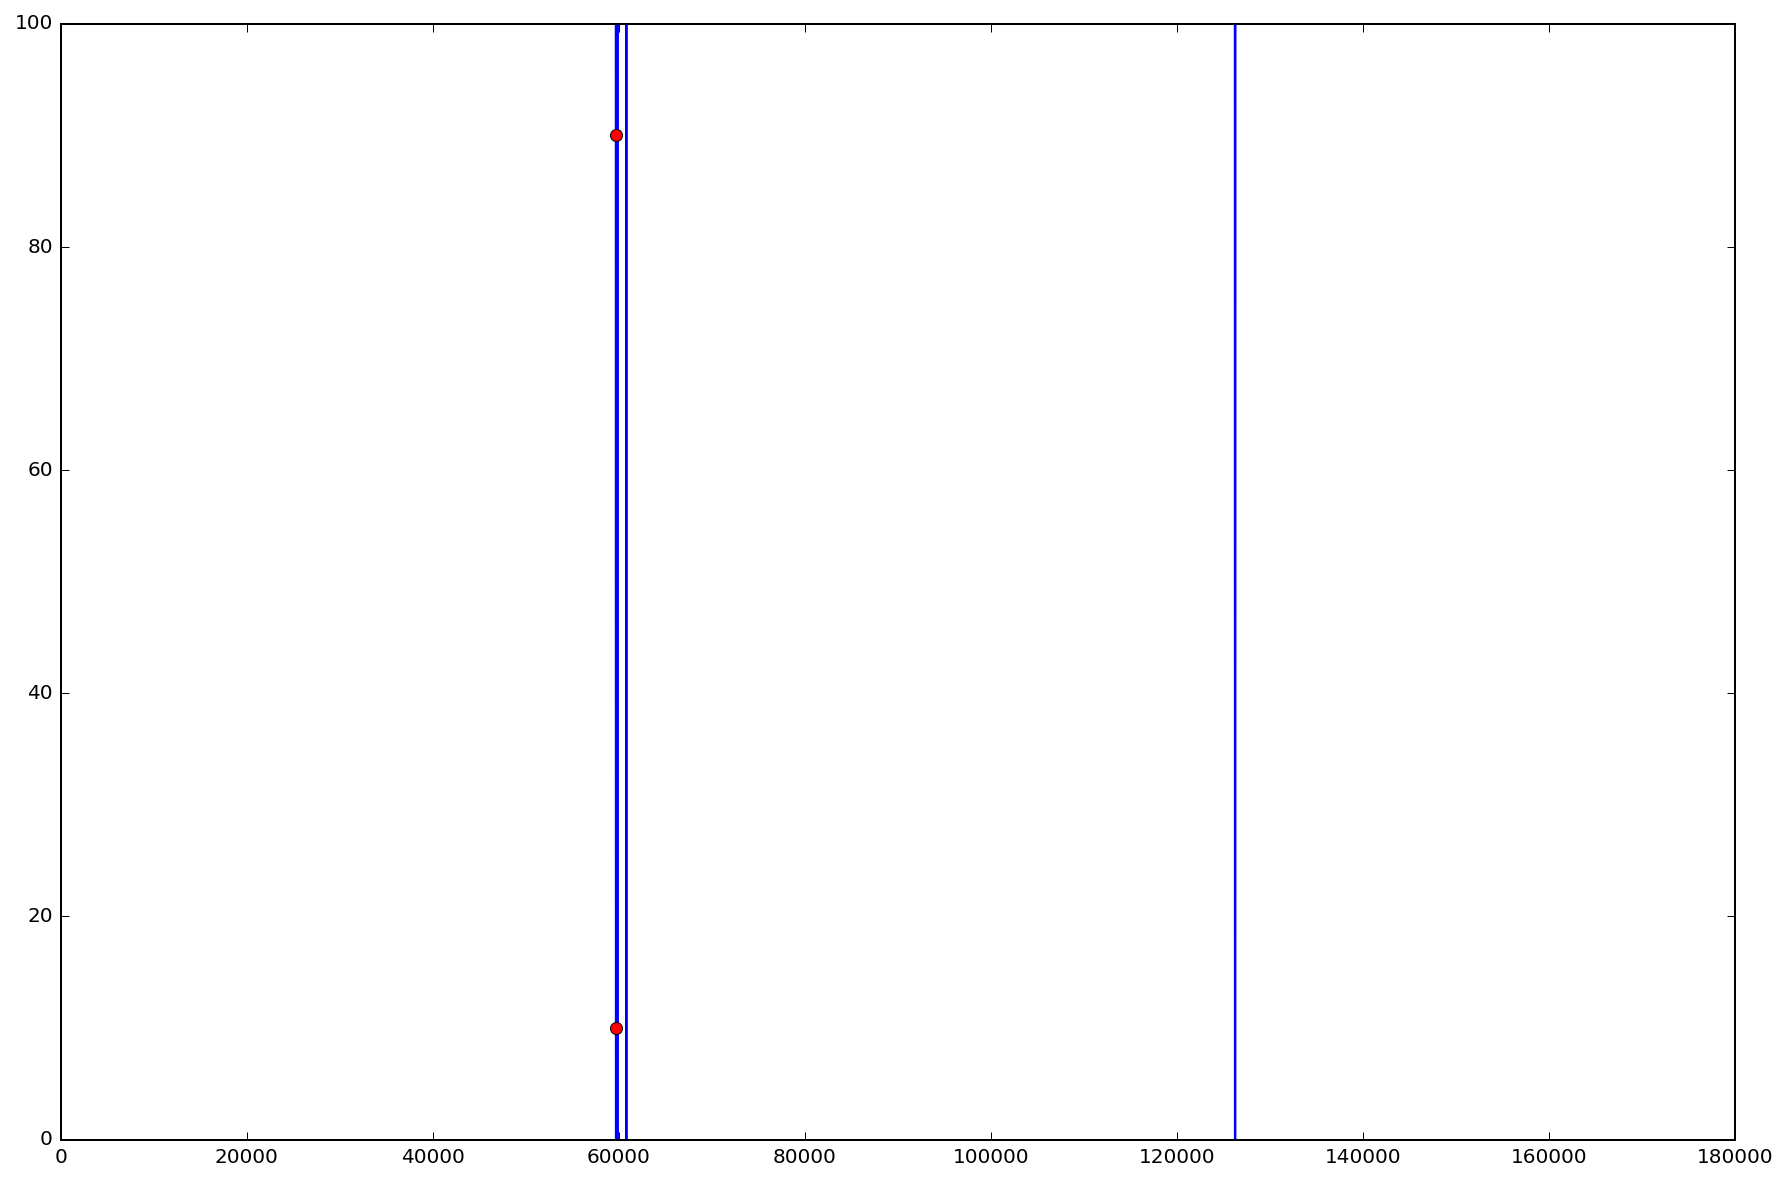

TEST  25


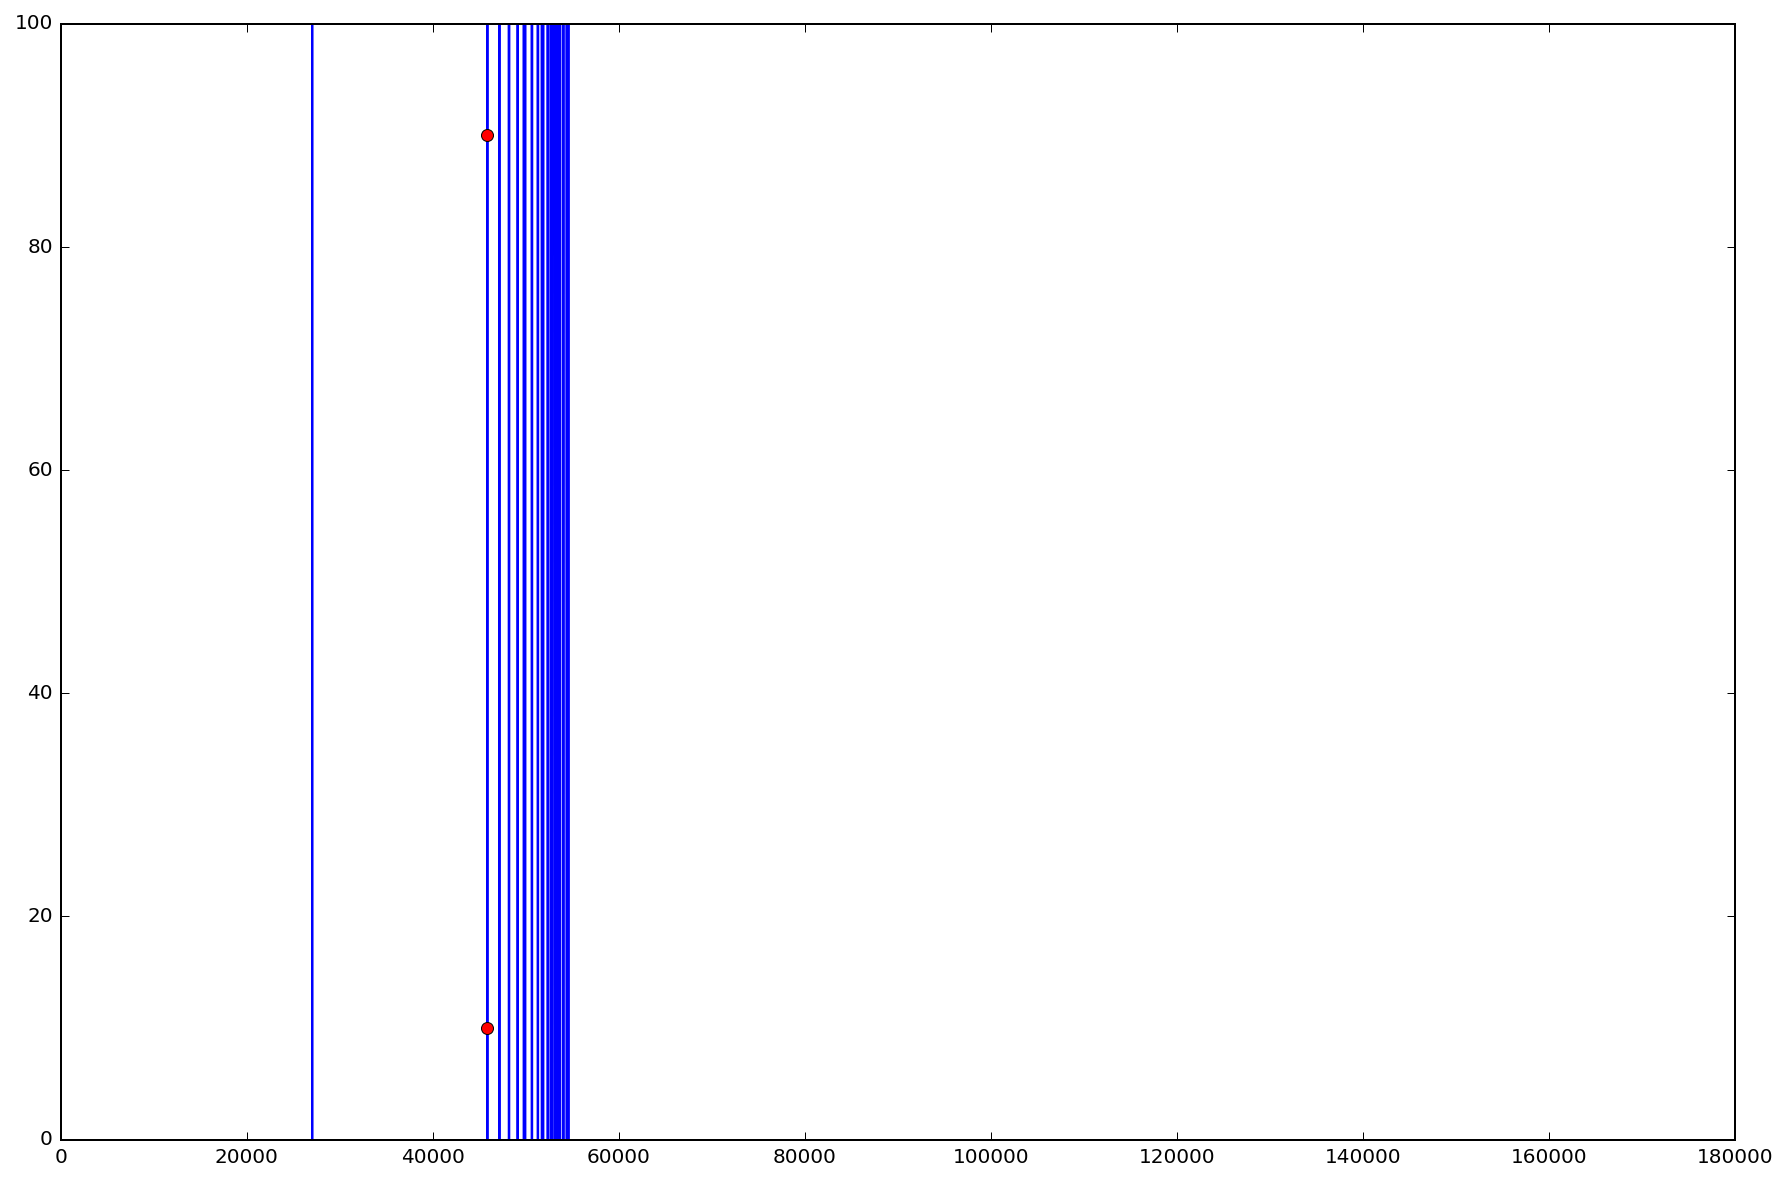

TEST  26


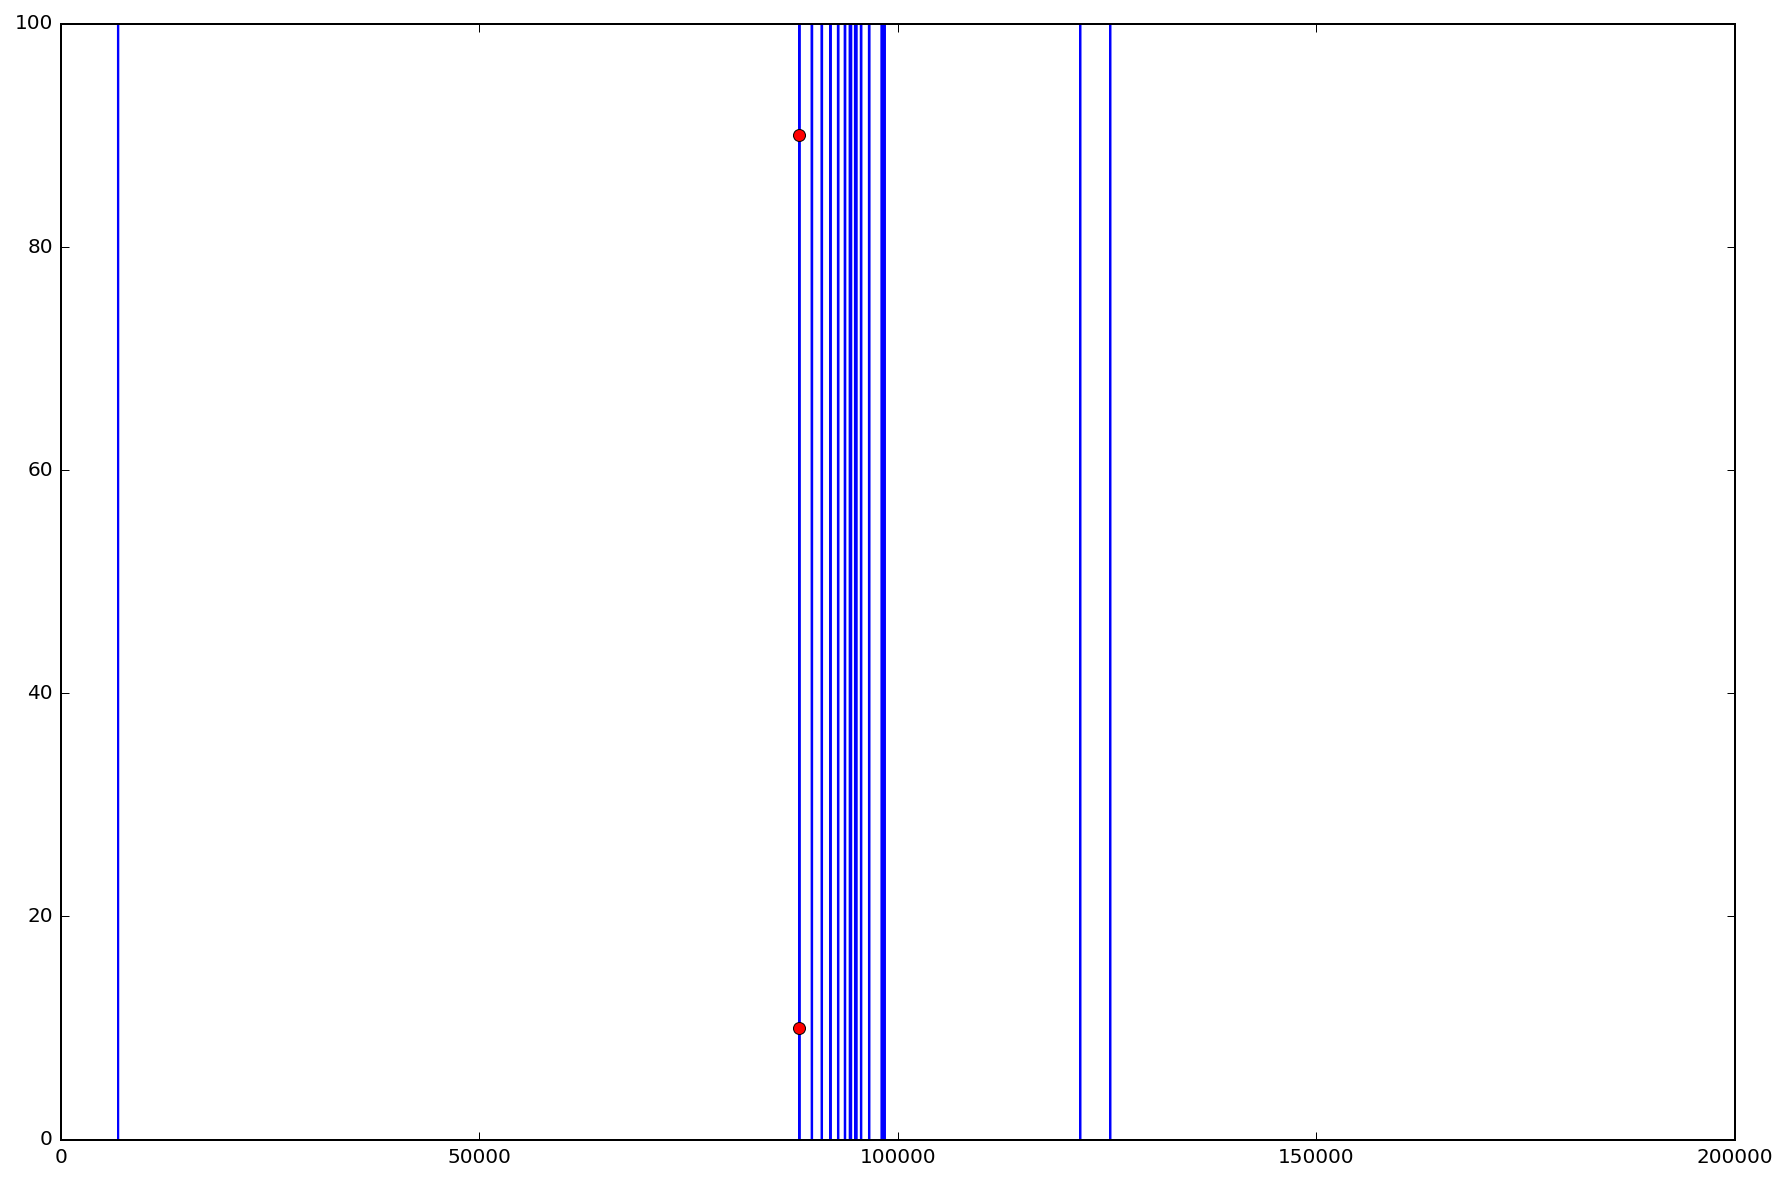

TEST  27


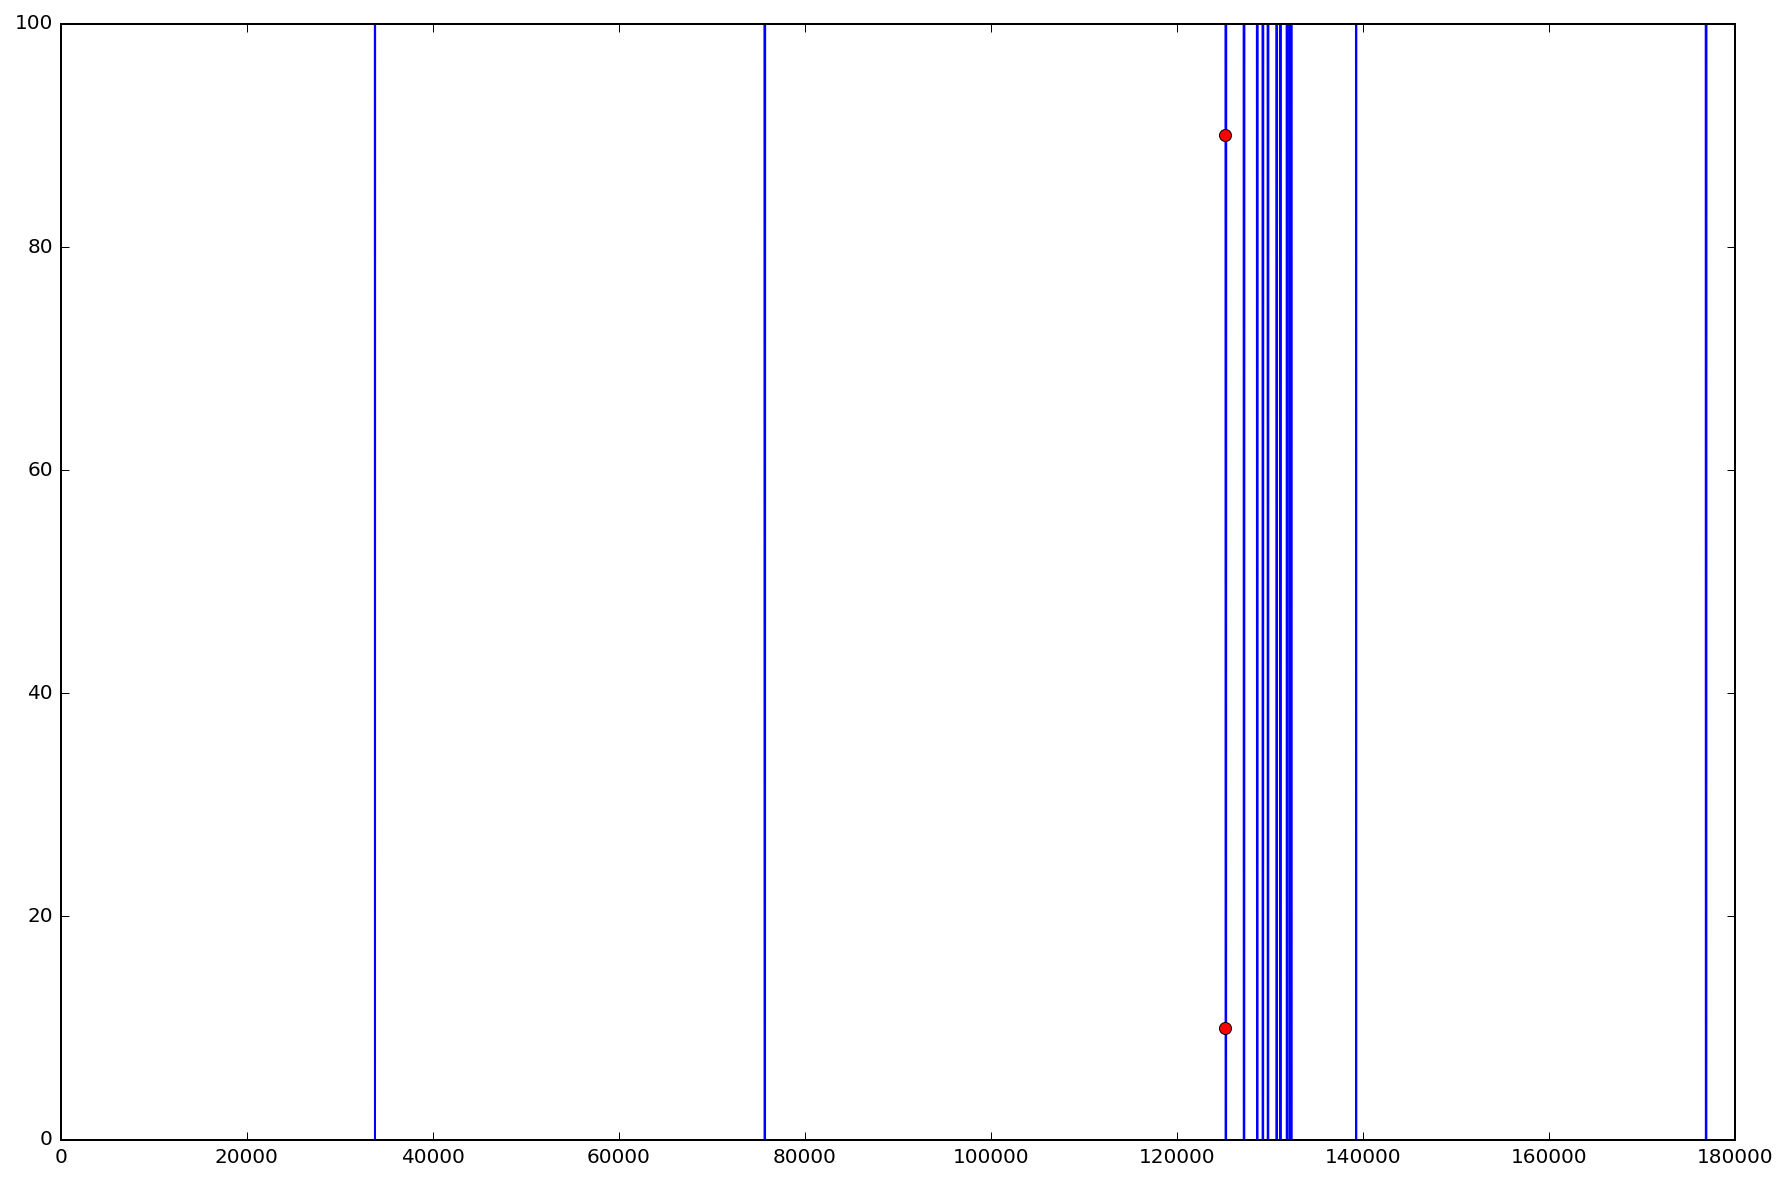

TEST  28


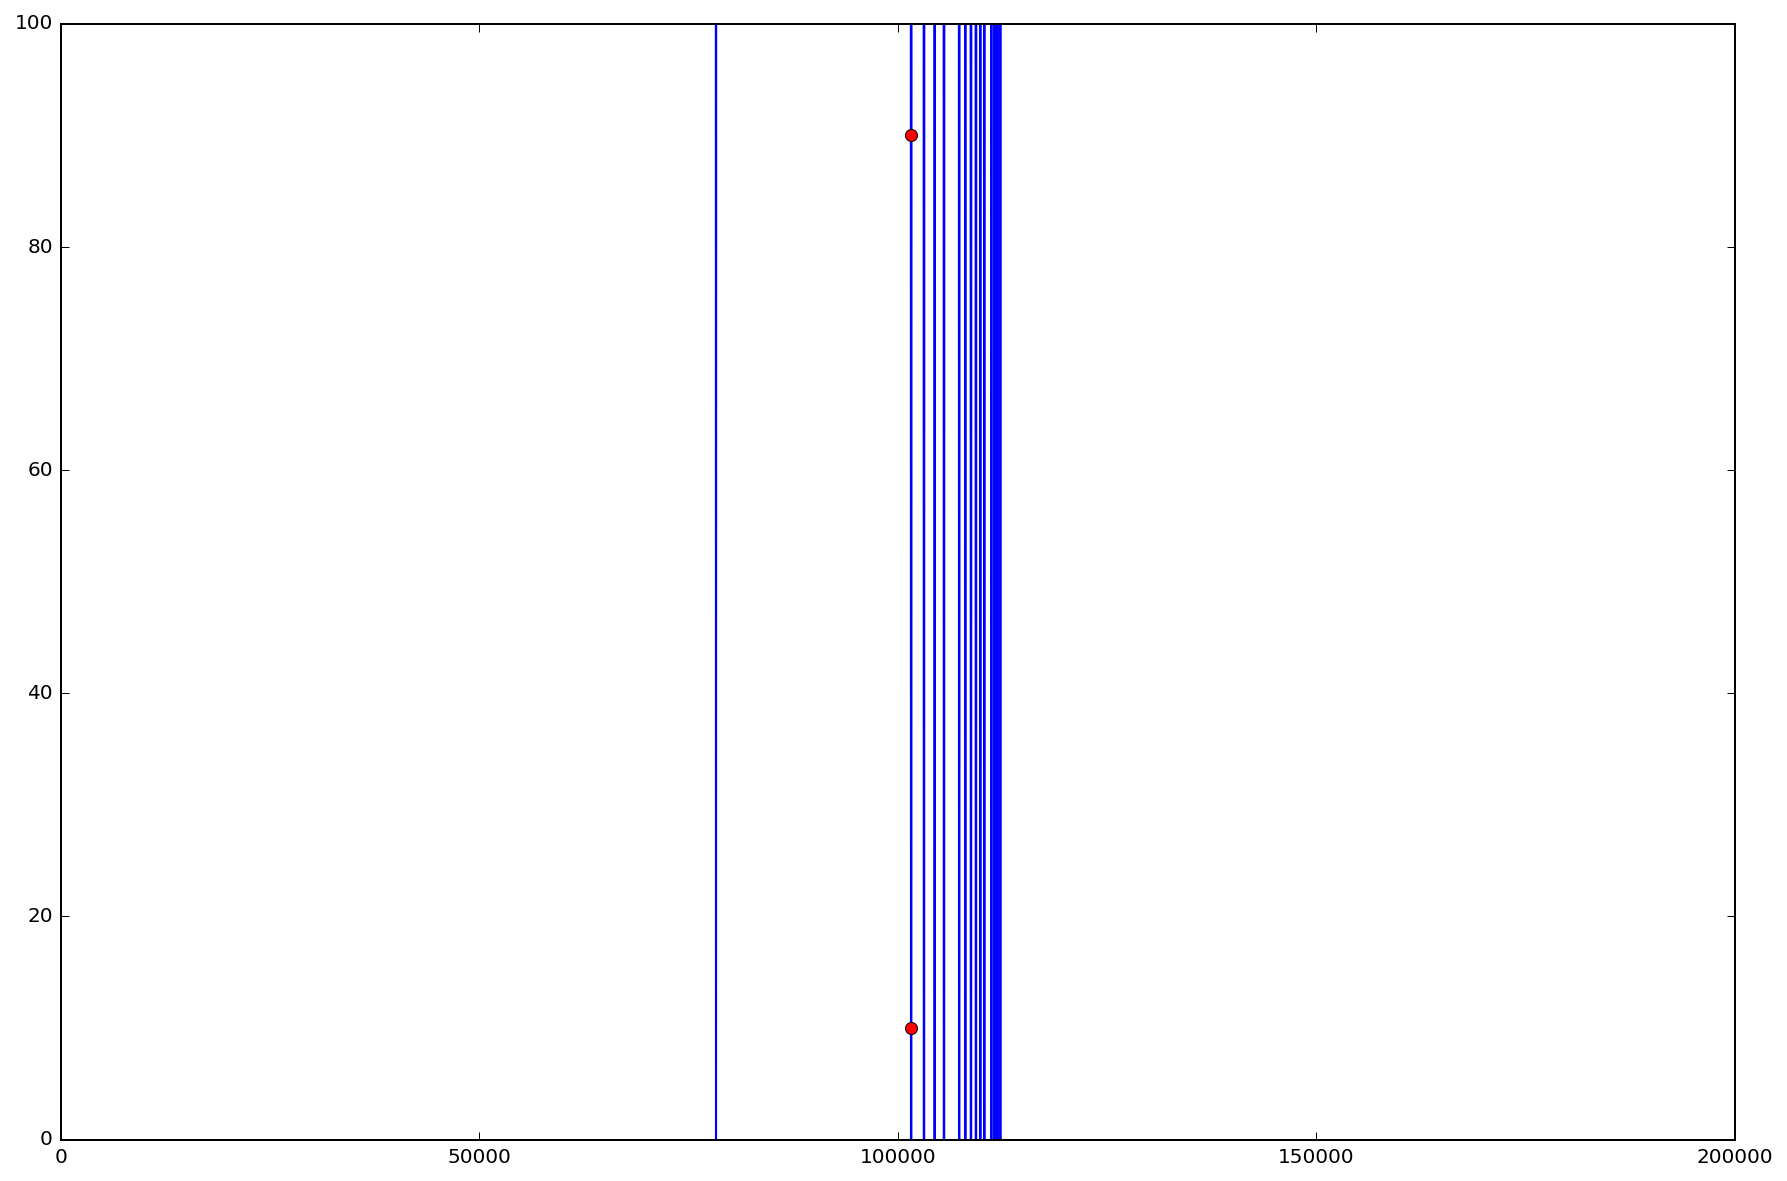

TEST  29


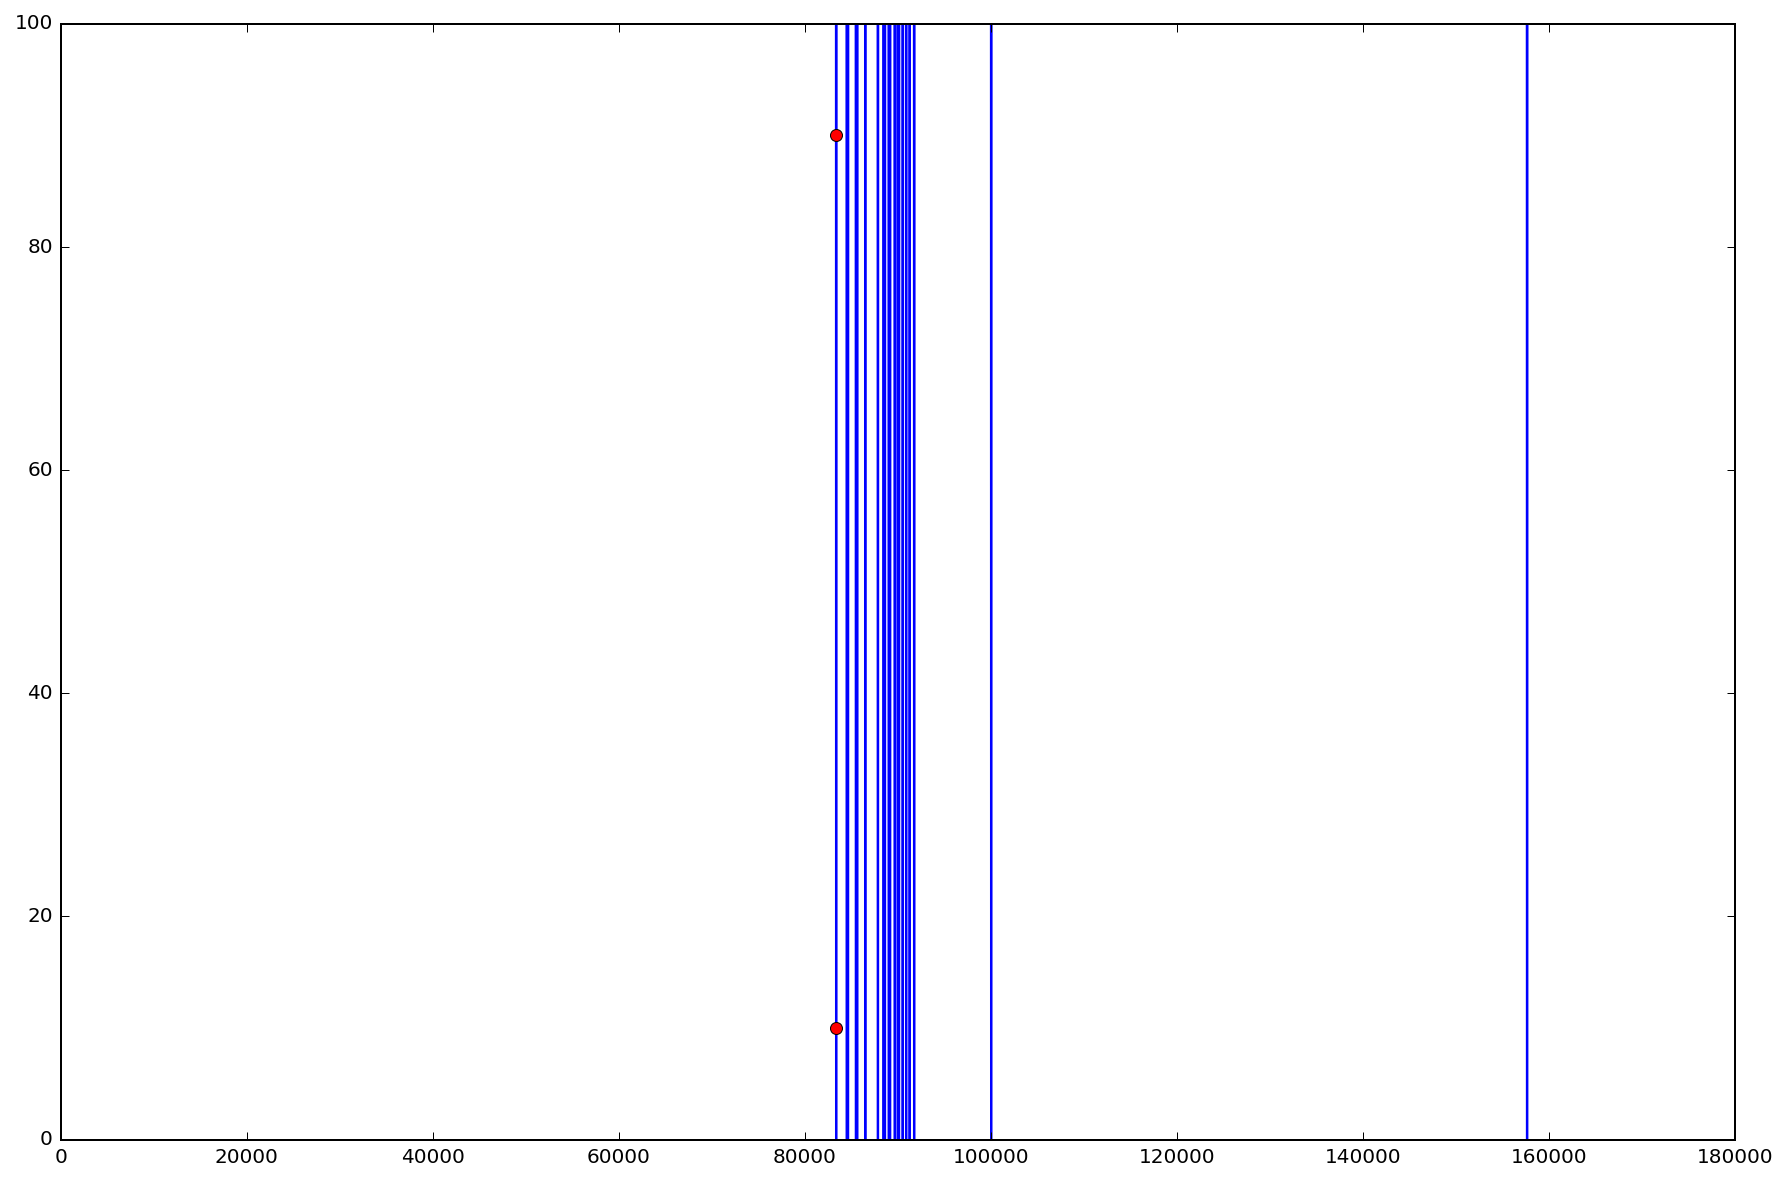

TEST  30


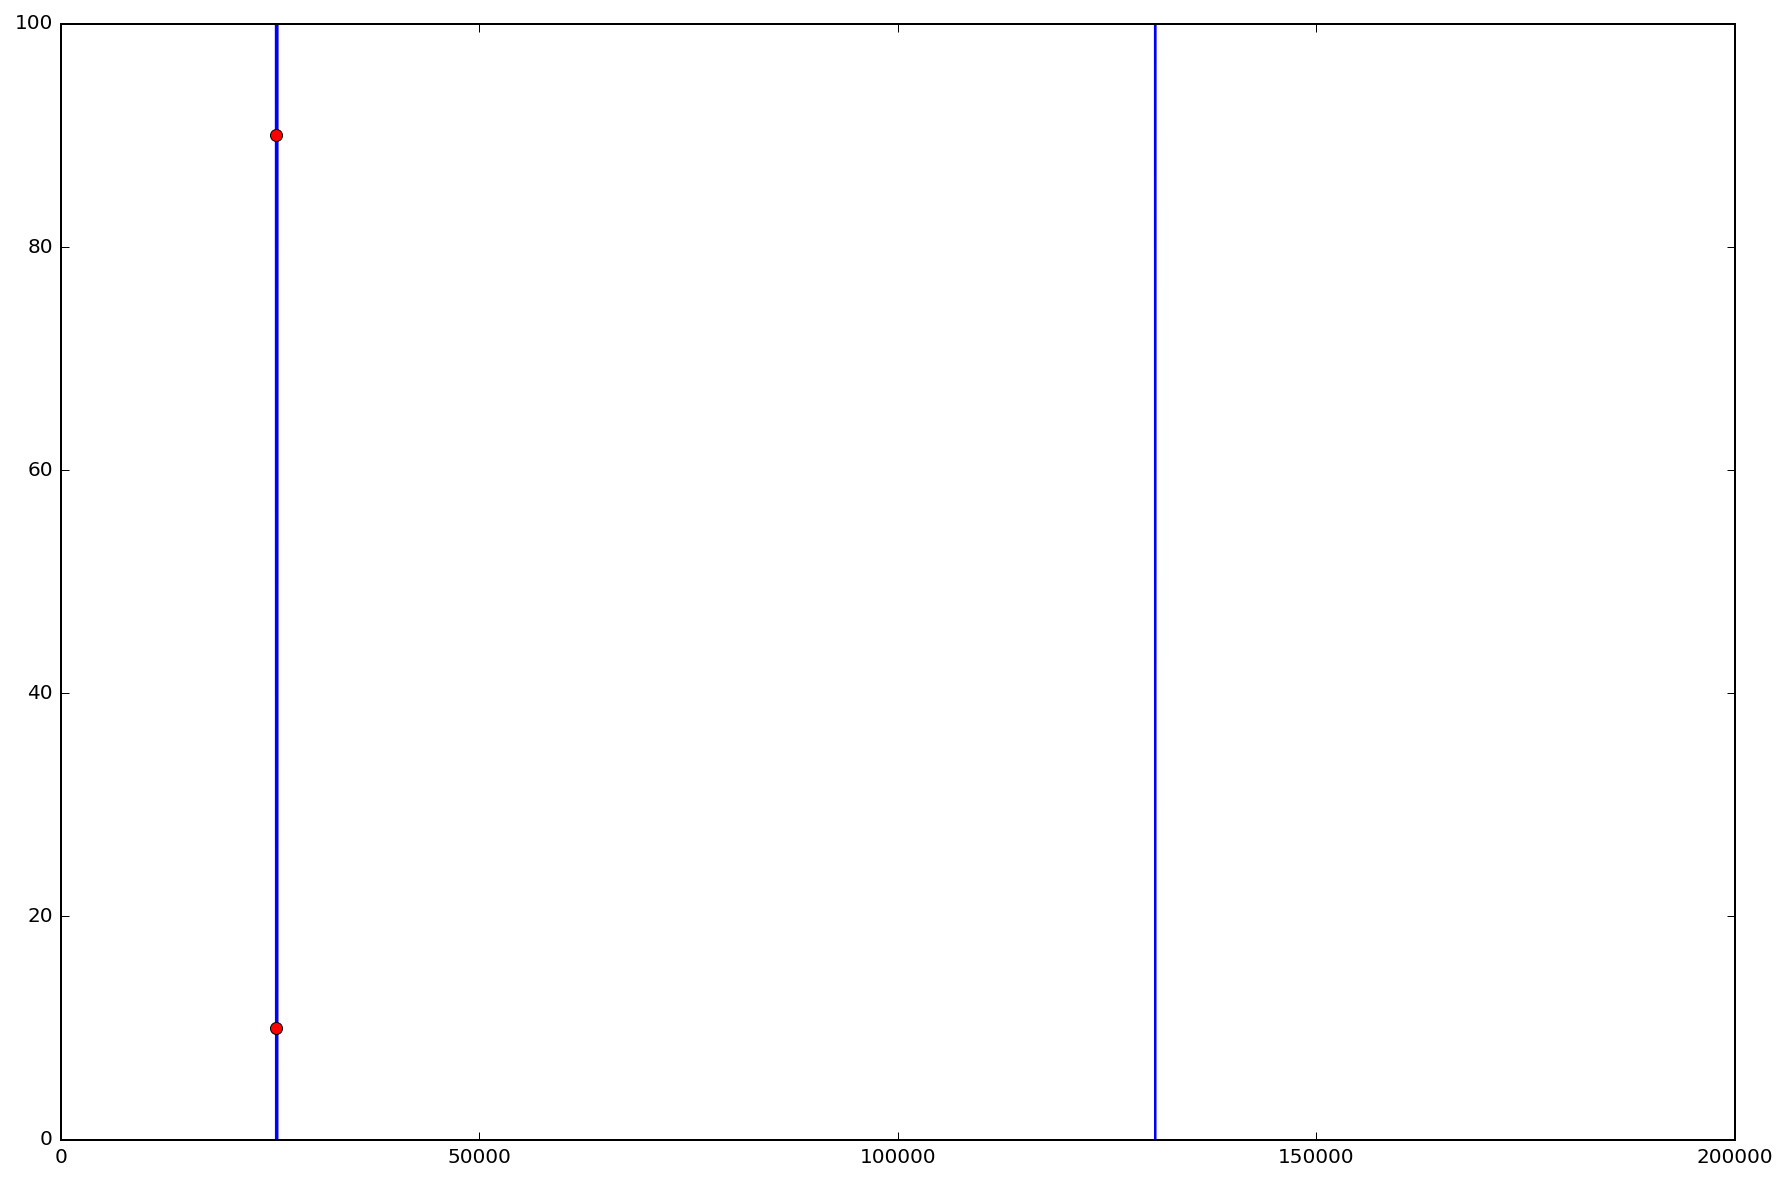

TEST  31


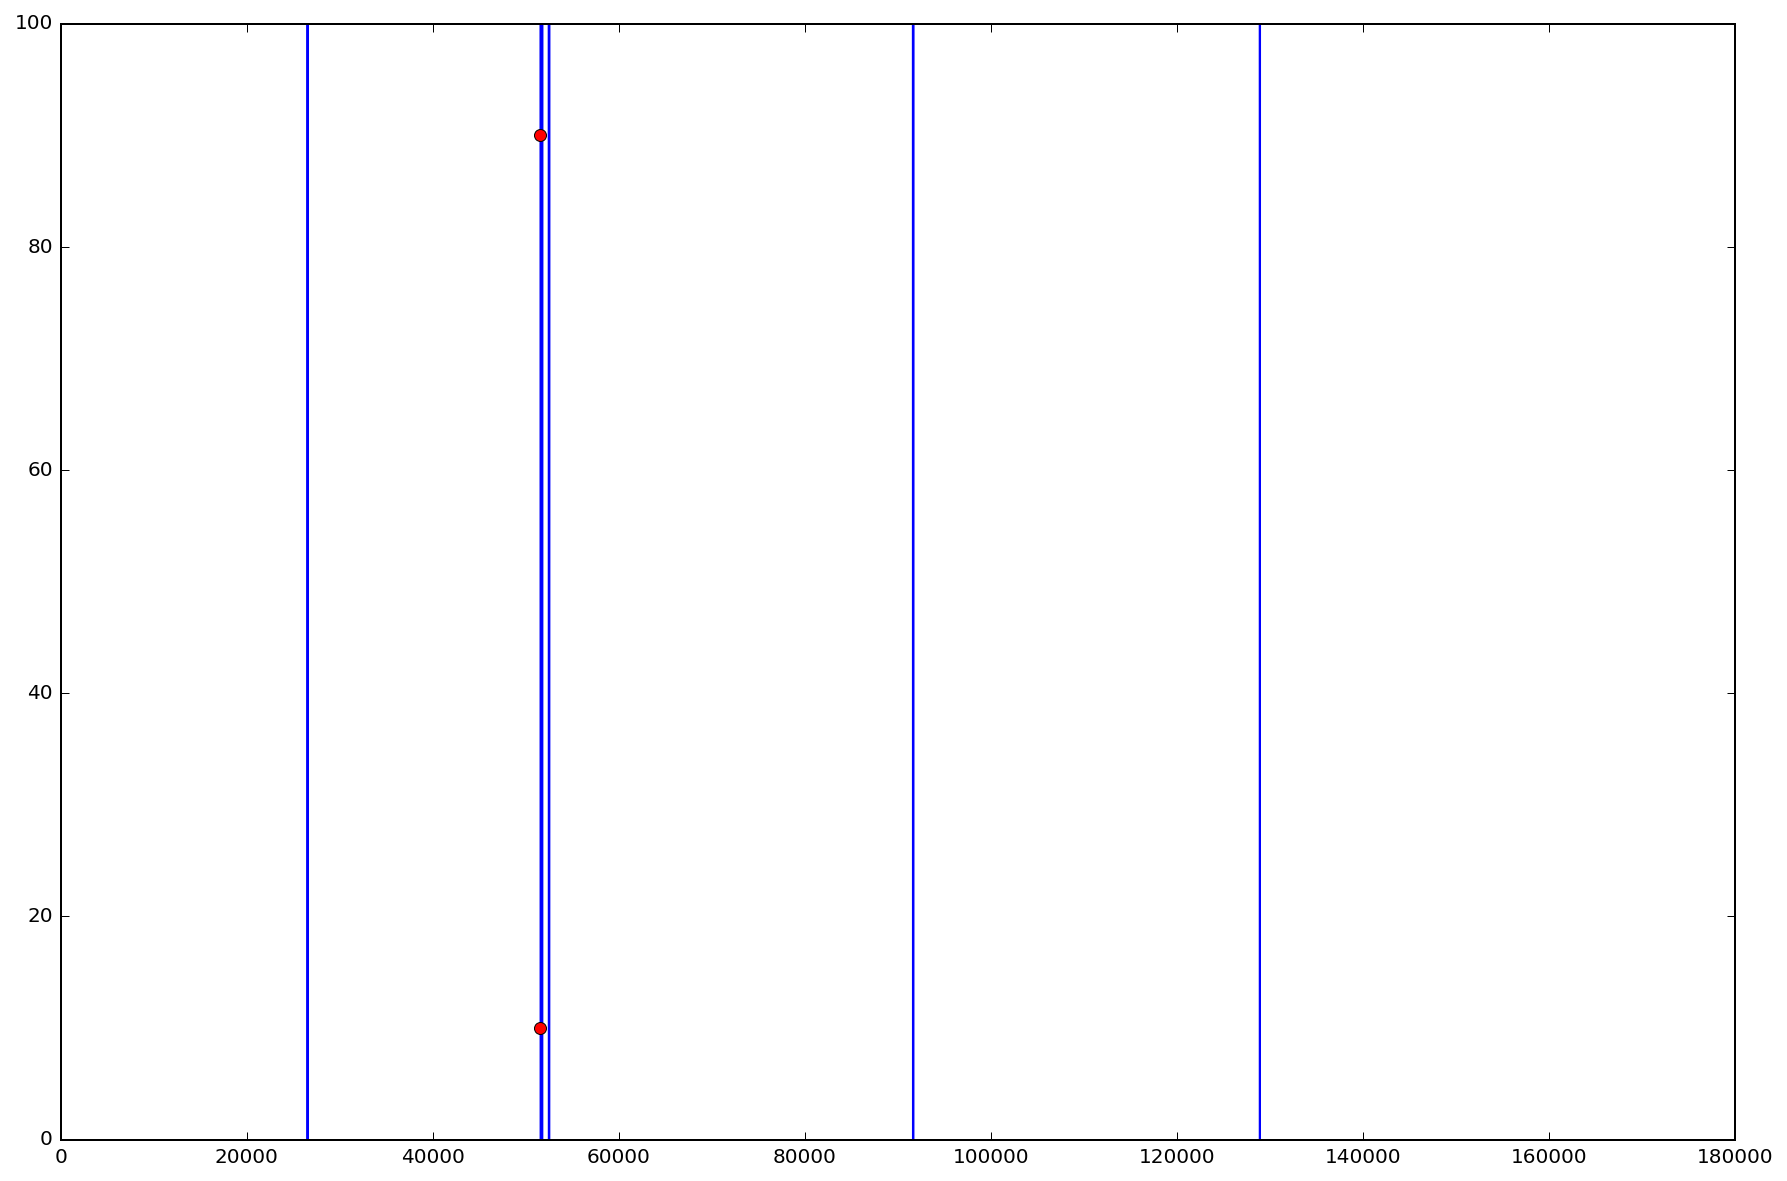

TEST  32


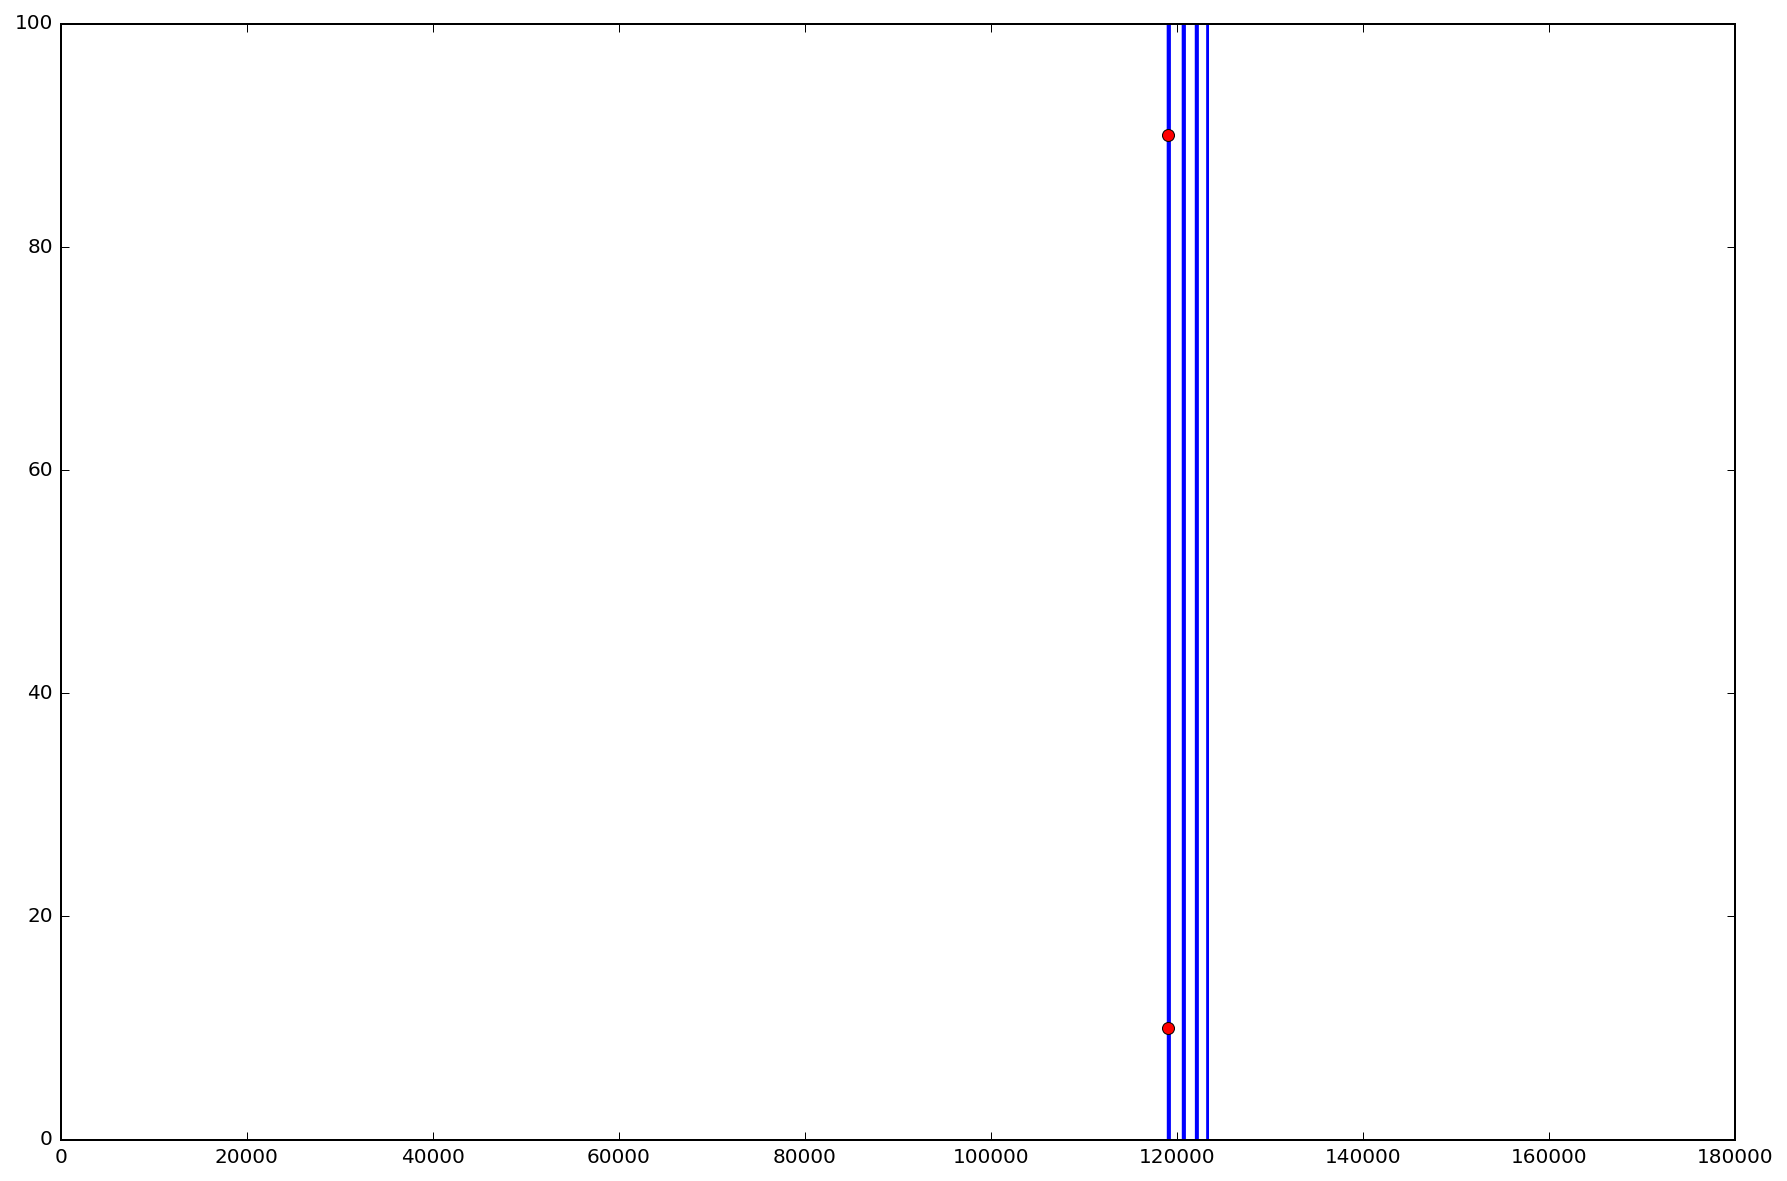

TEST  33


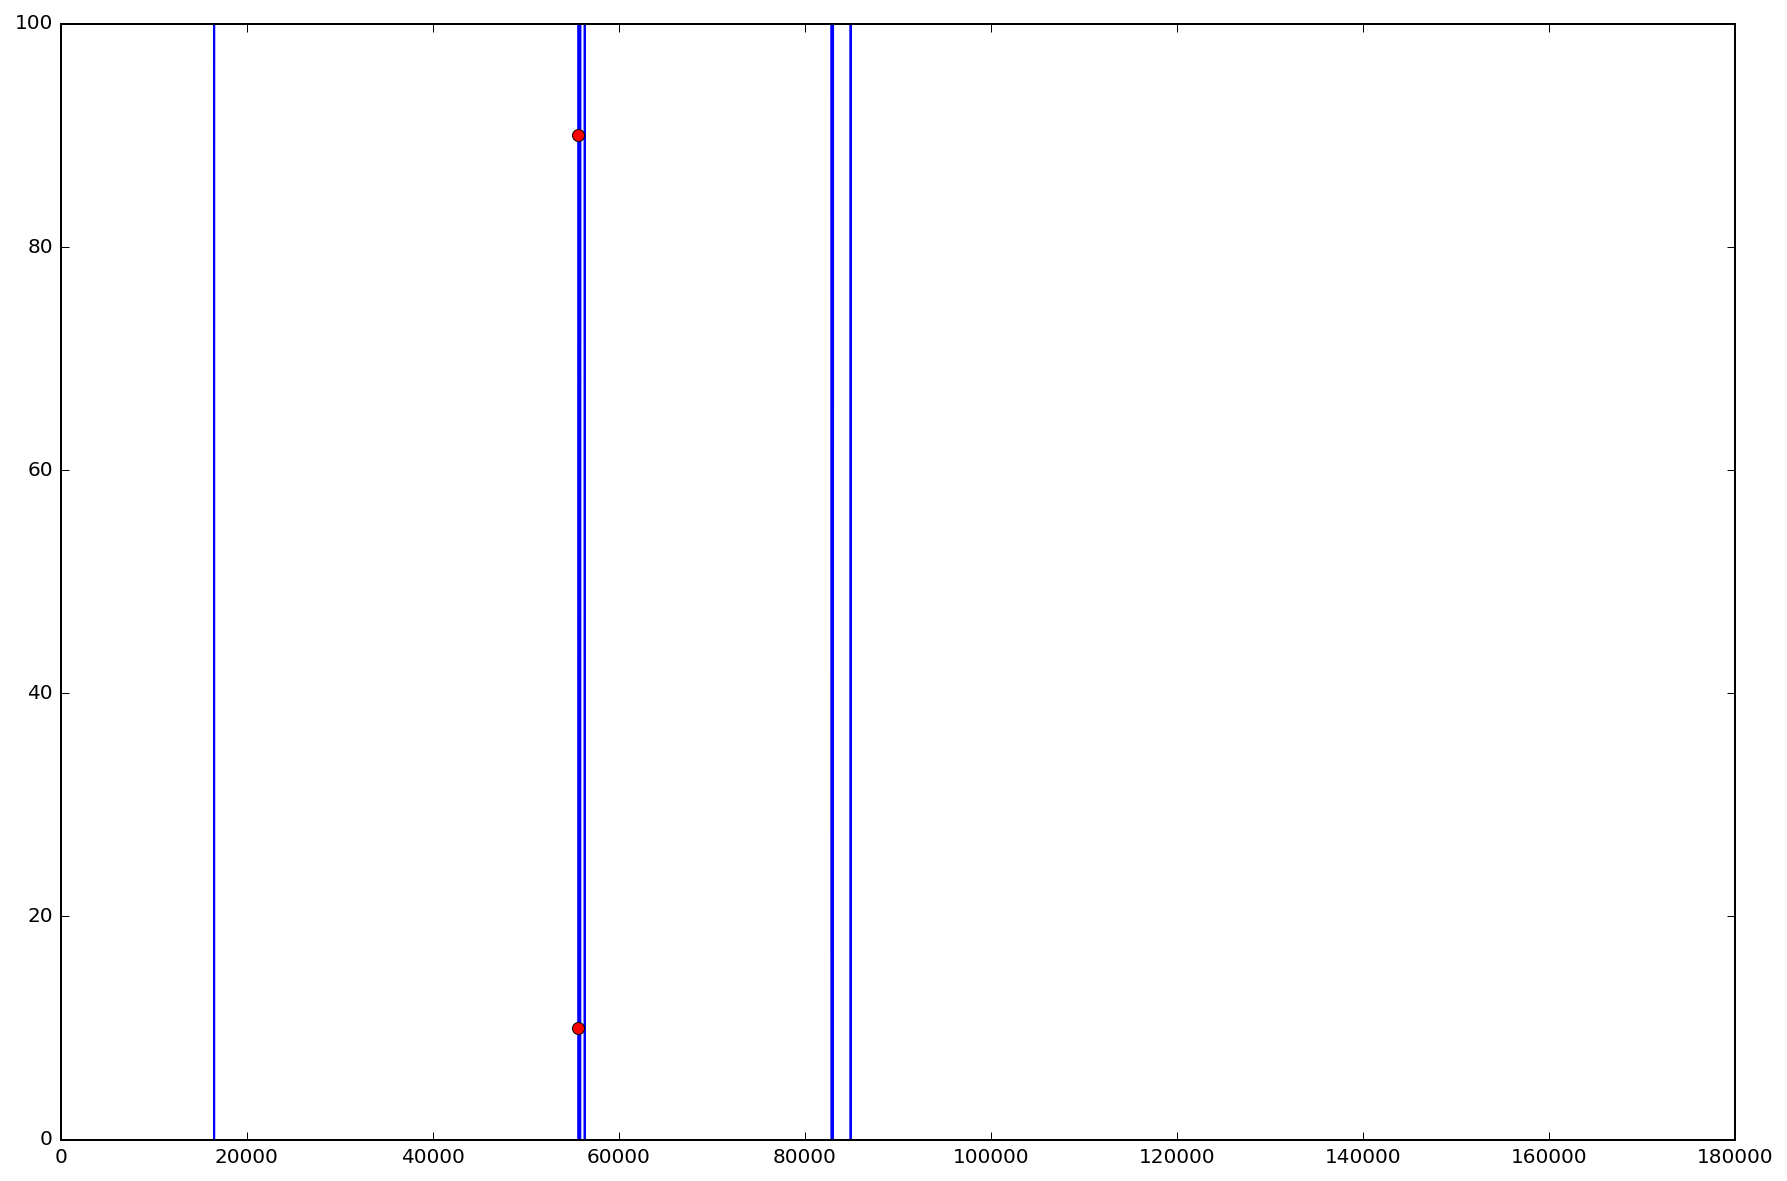

TEST  34


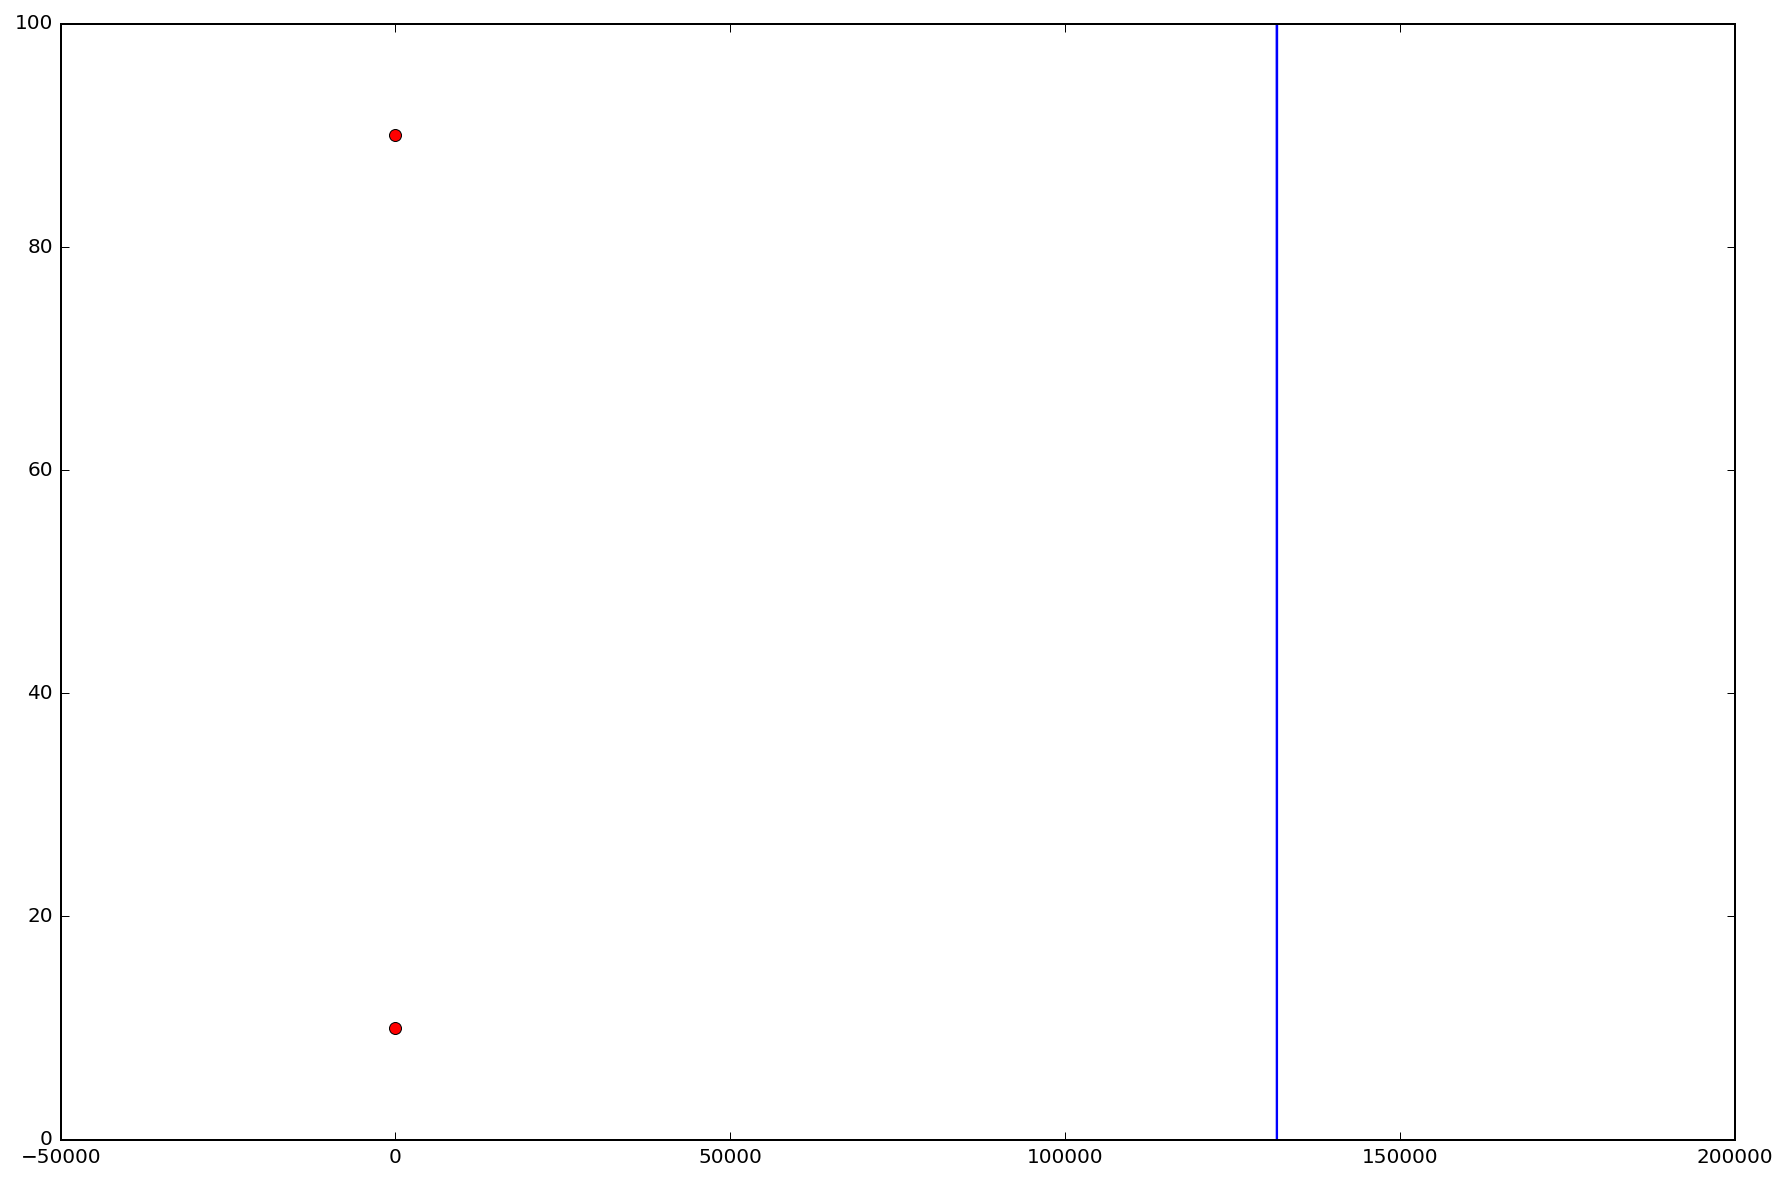

TEST  35


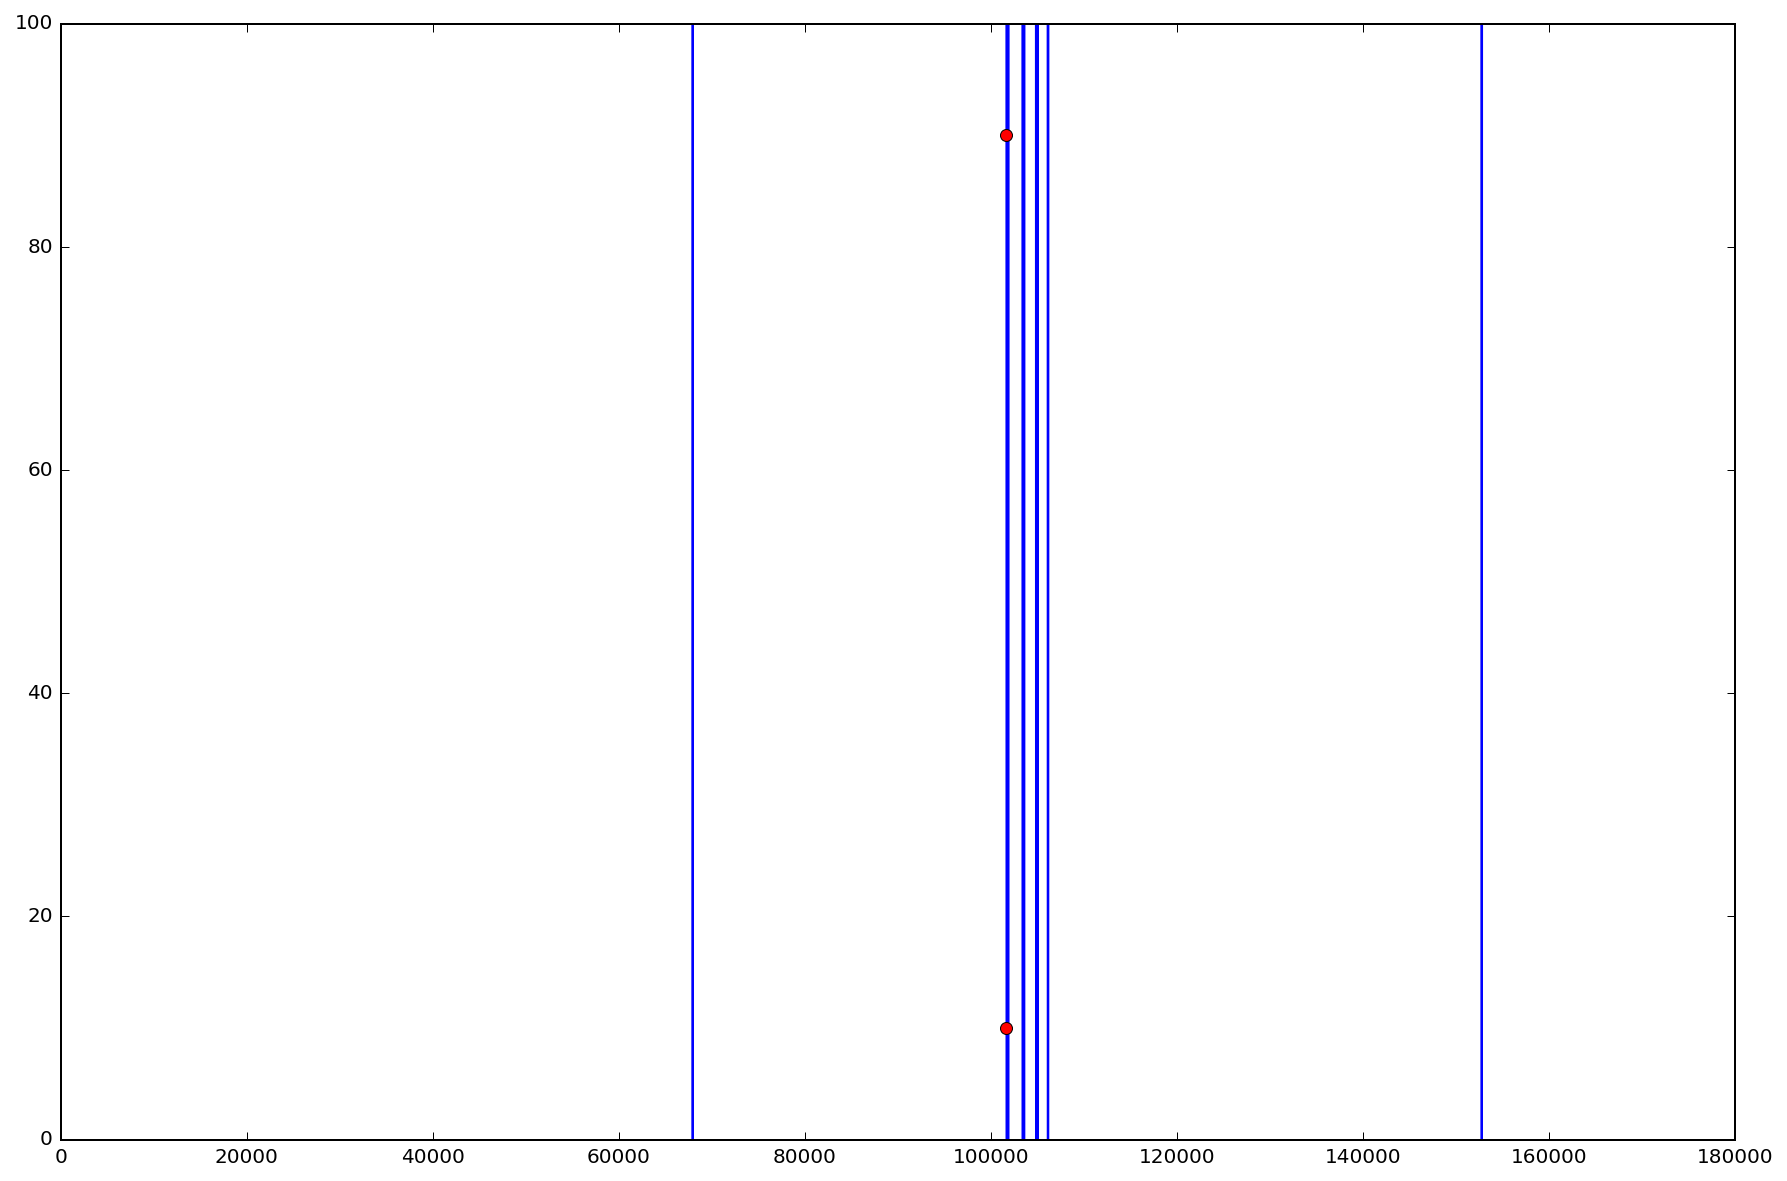

TEST  36


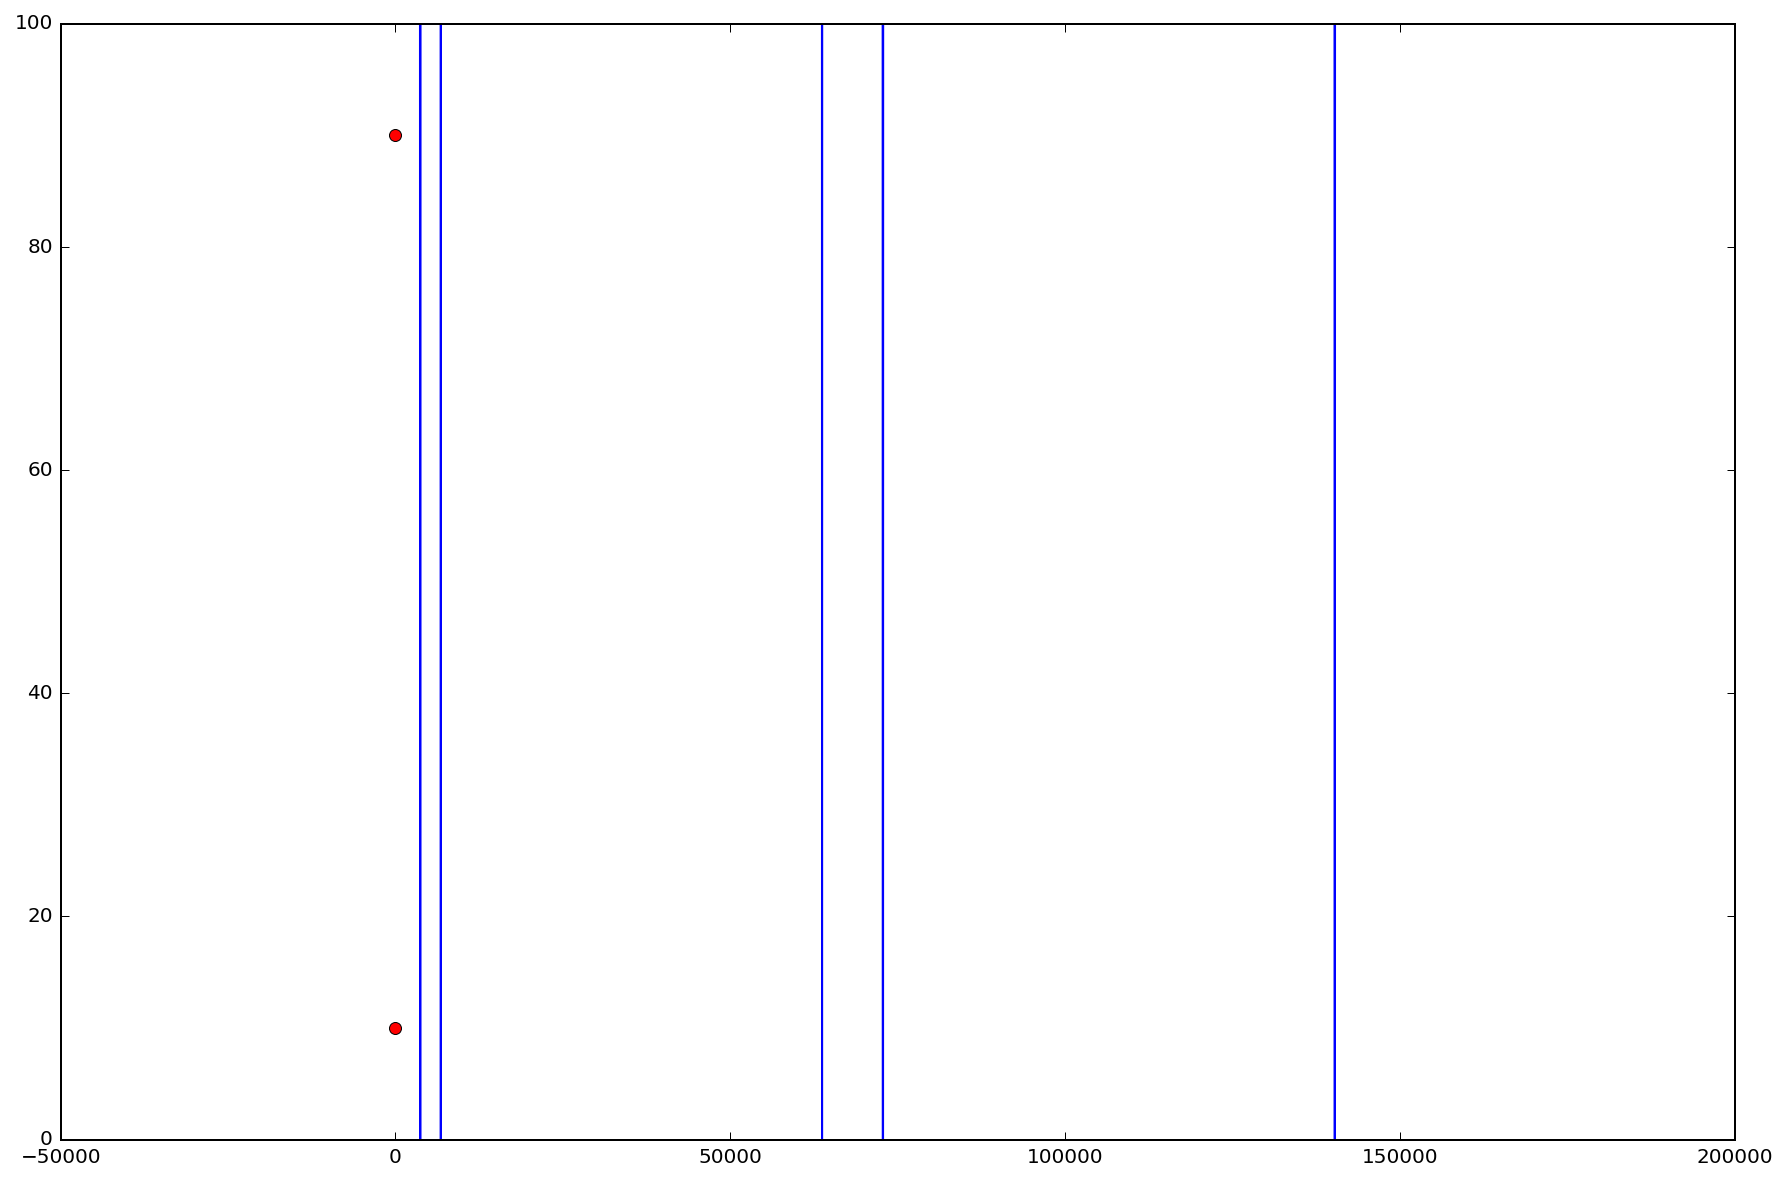

TEST  37


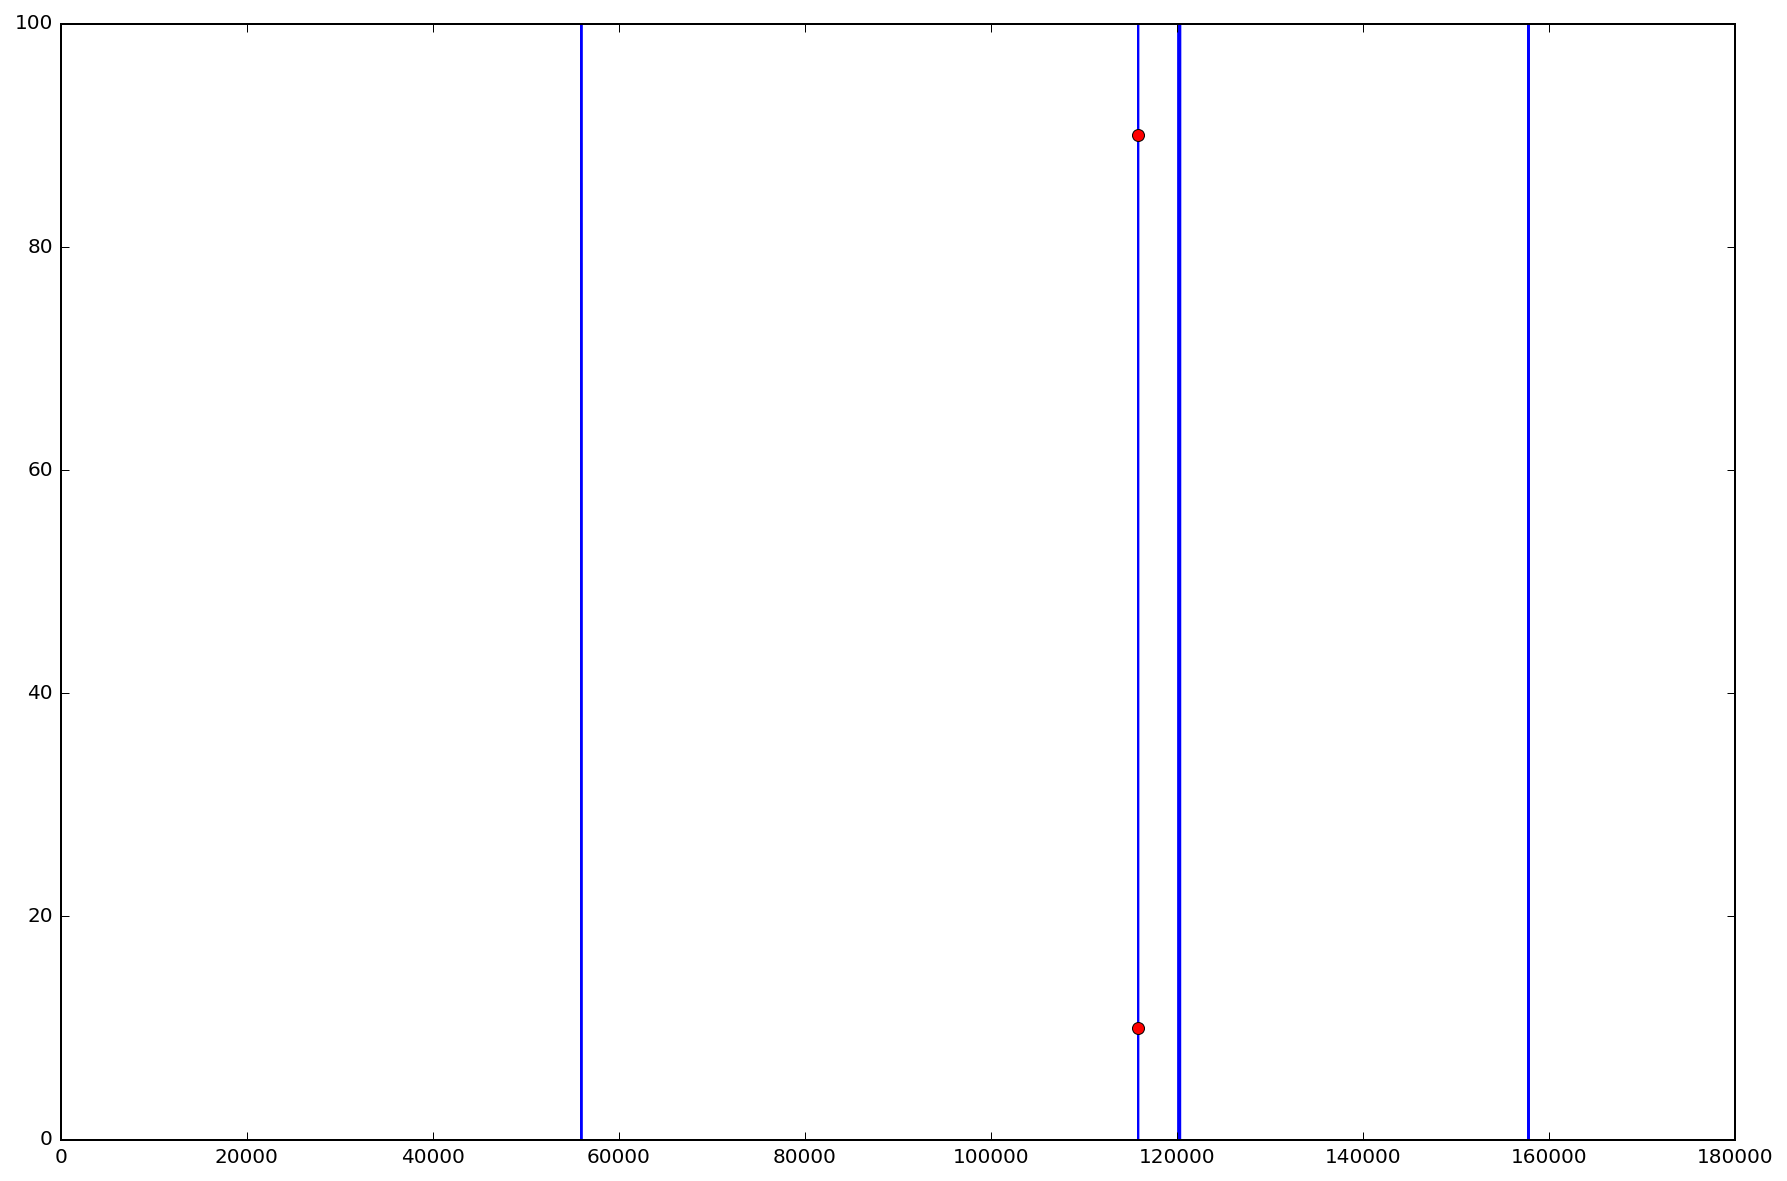

TEST  38


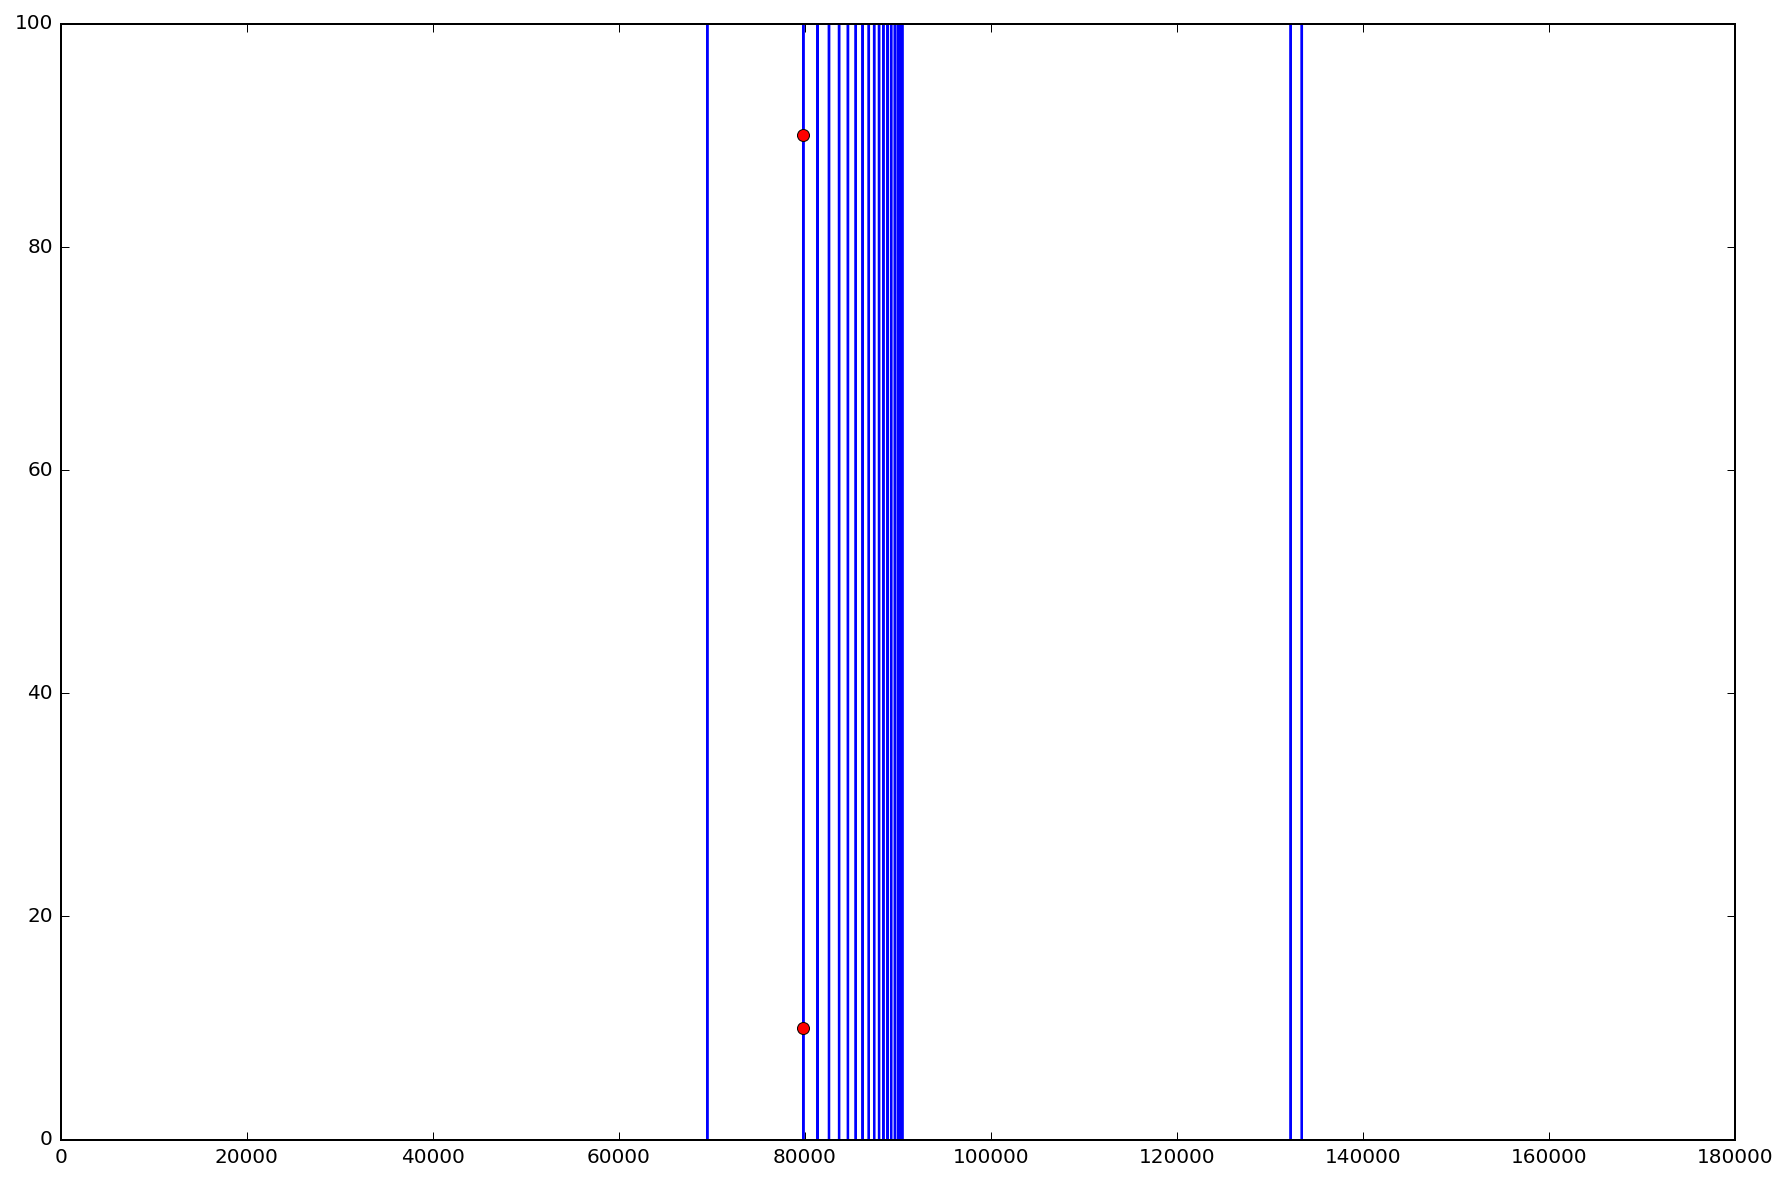

TEST  39


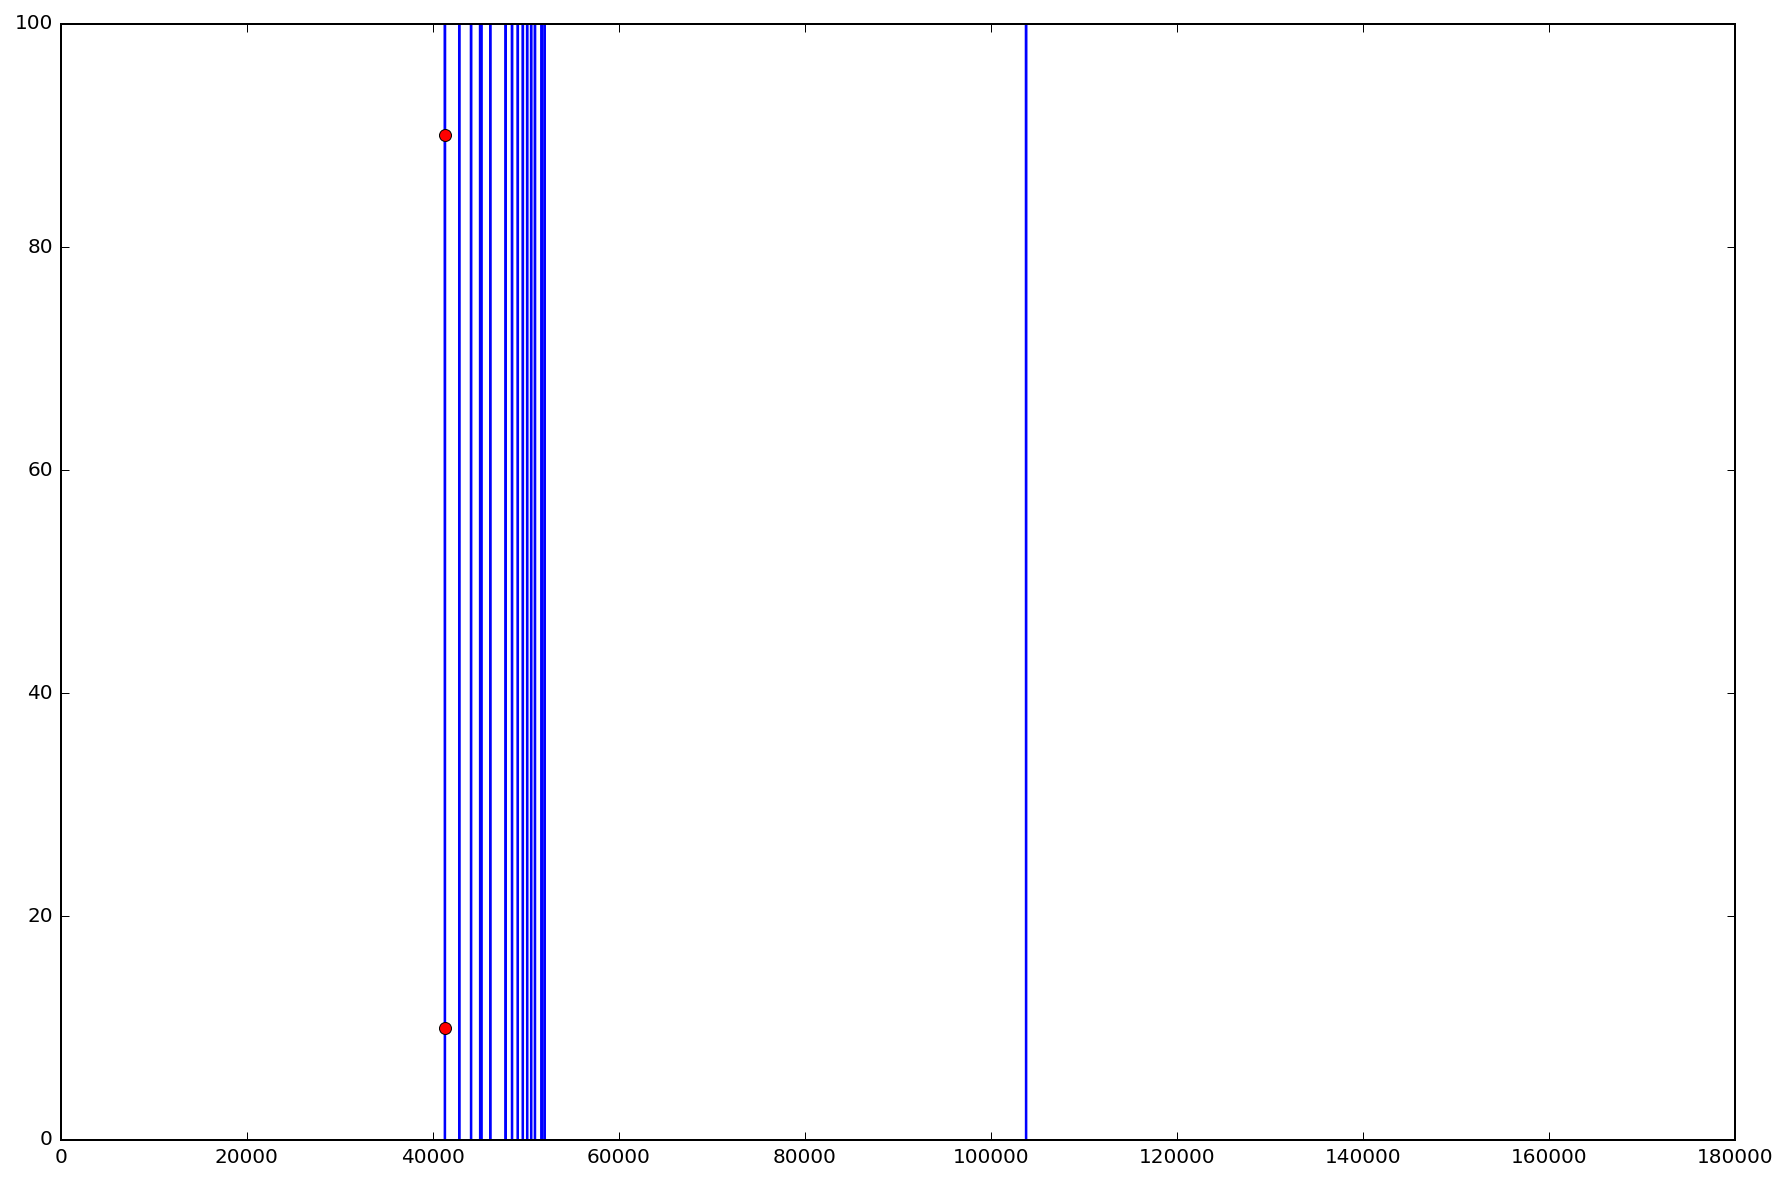

TEST  40


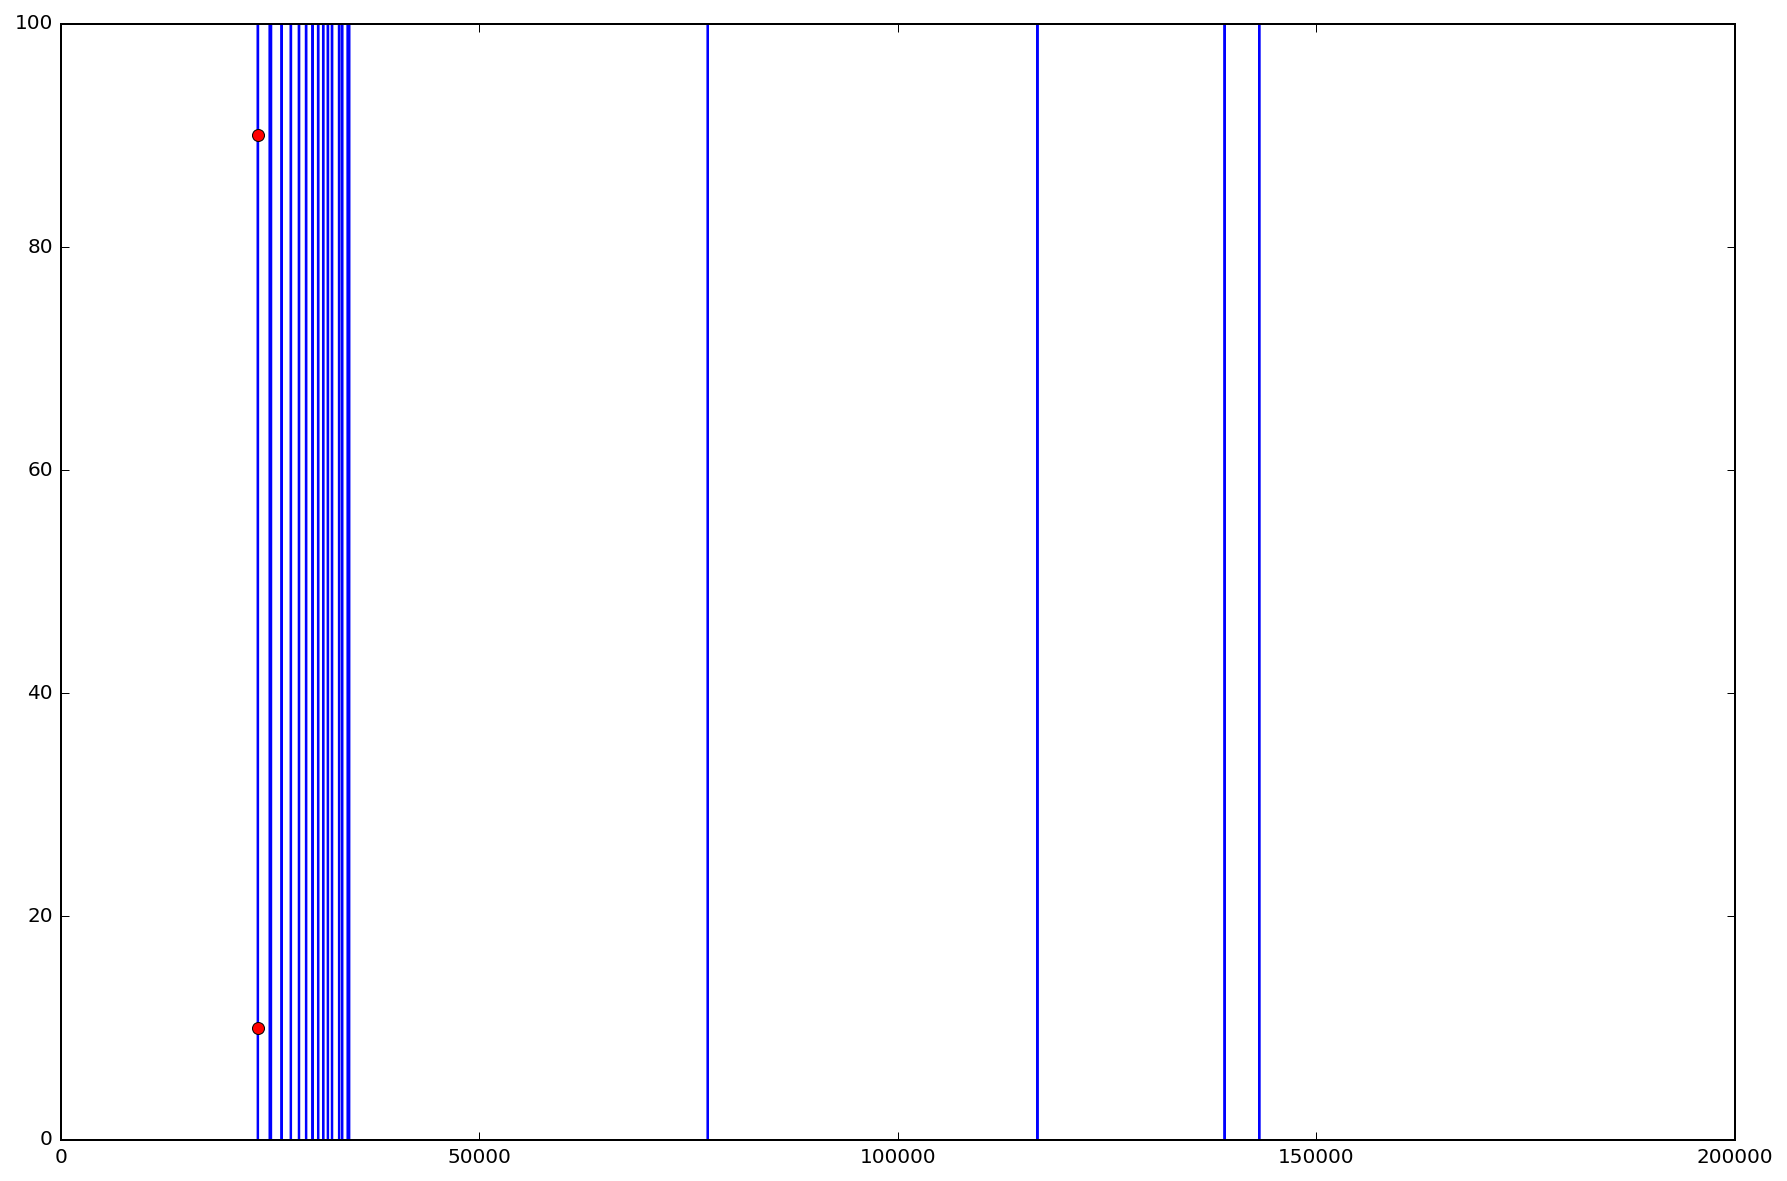

TEST  41


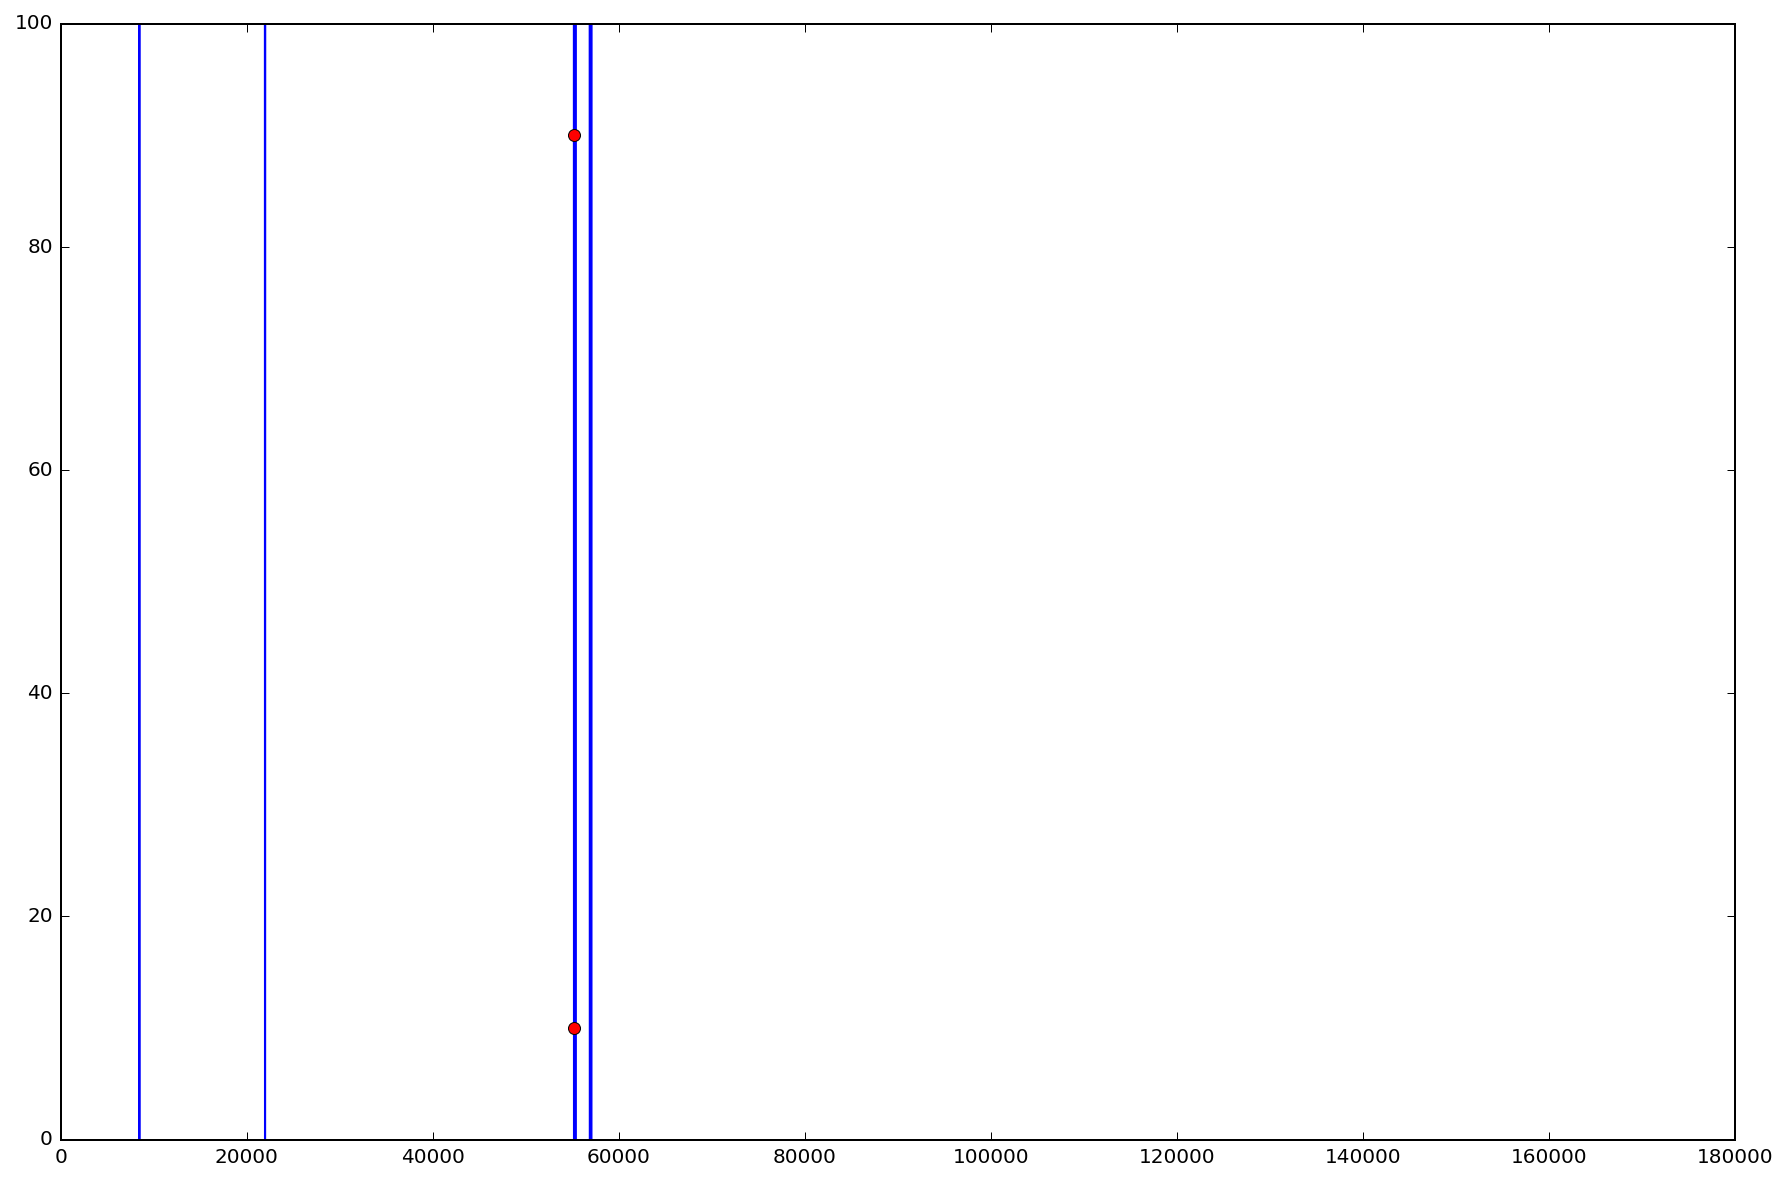

TEST  42


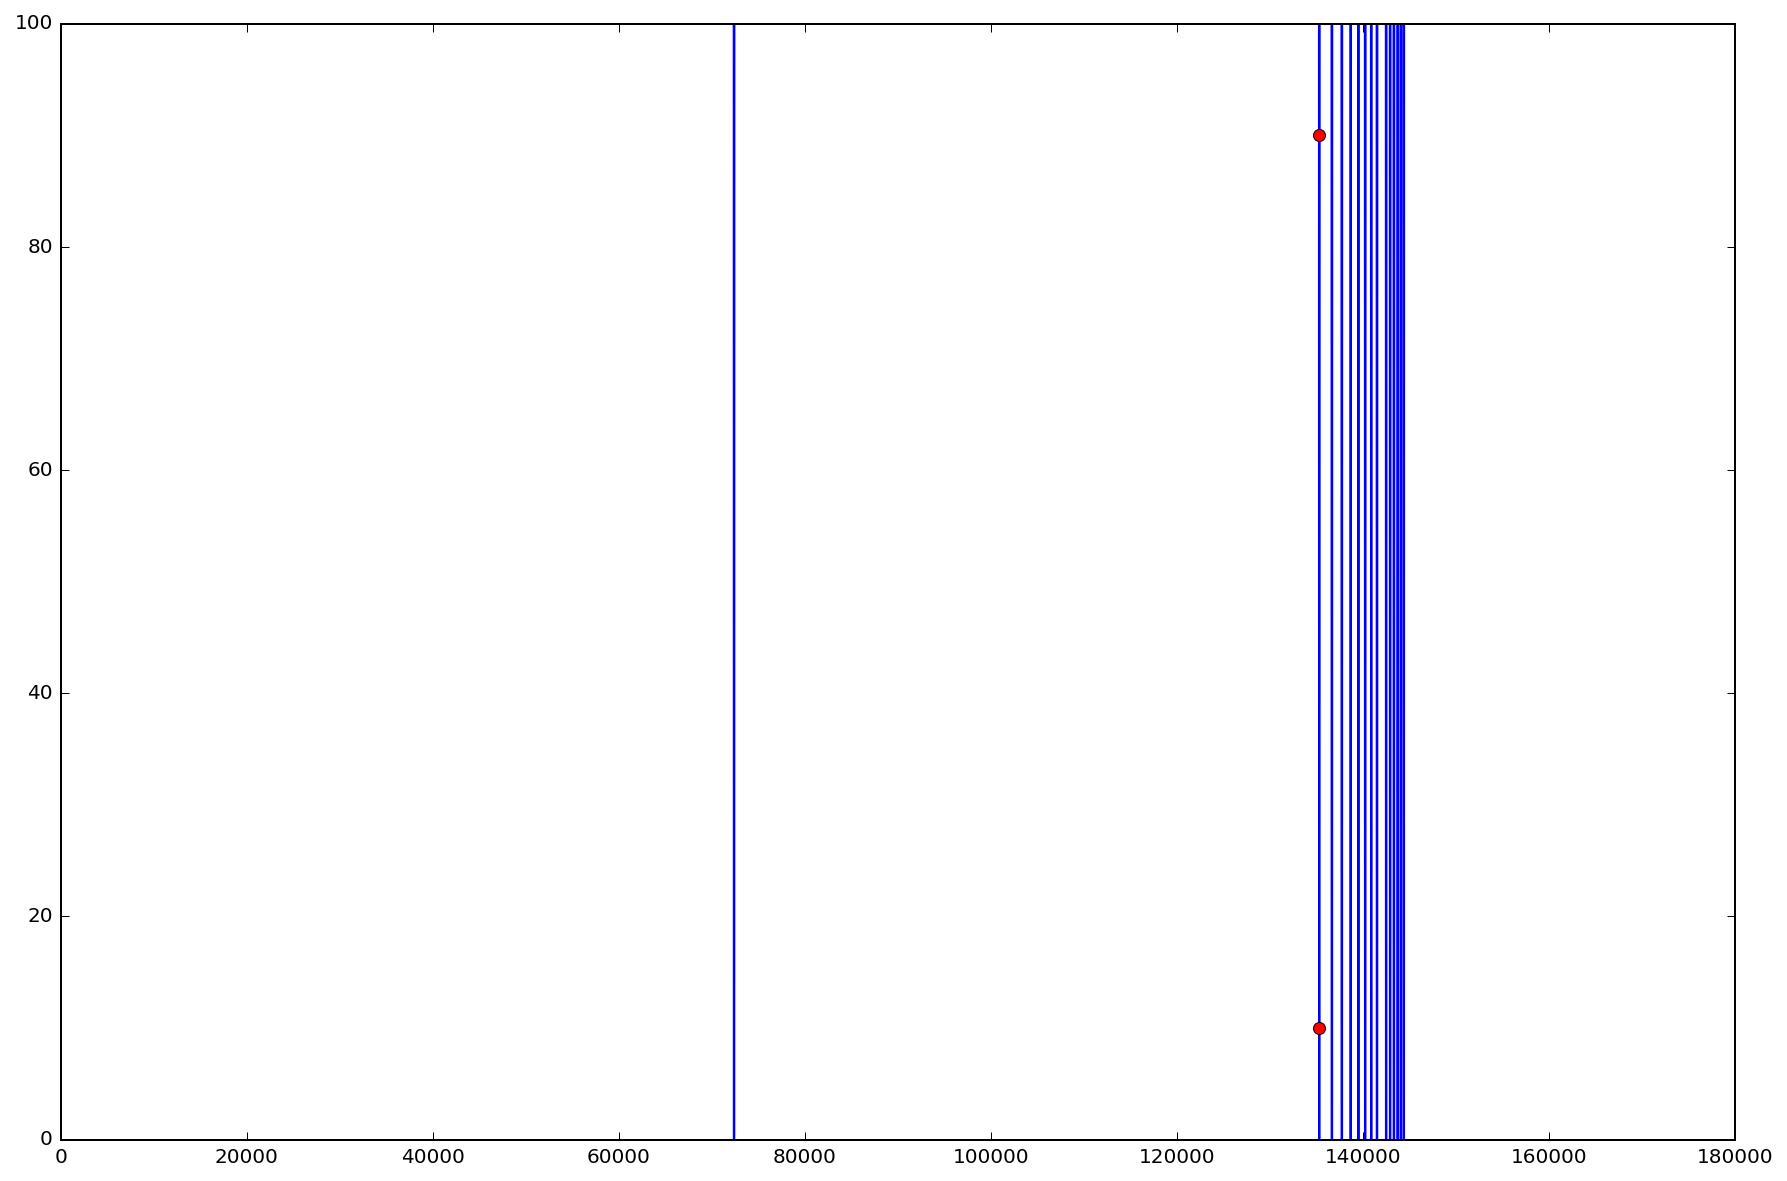

TEST  43


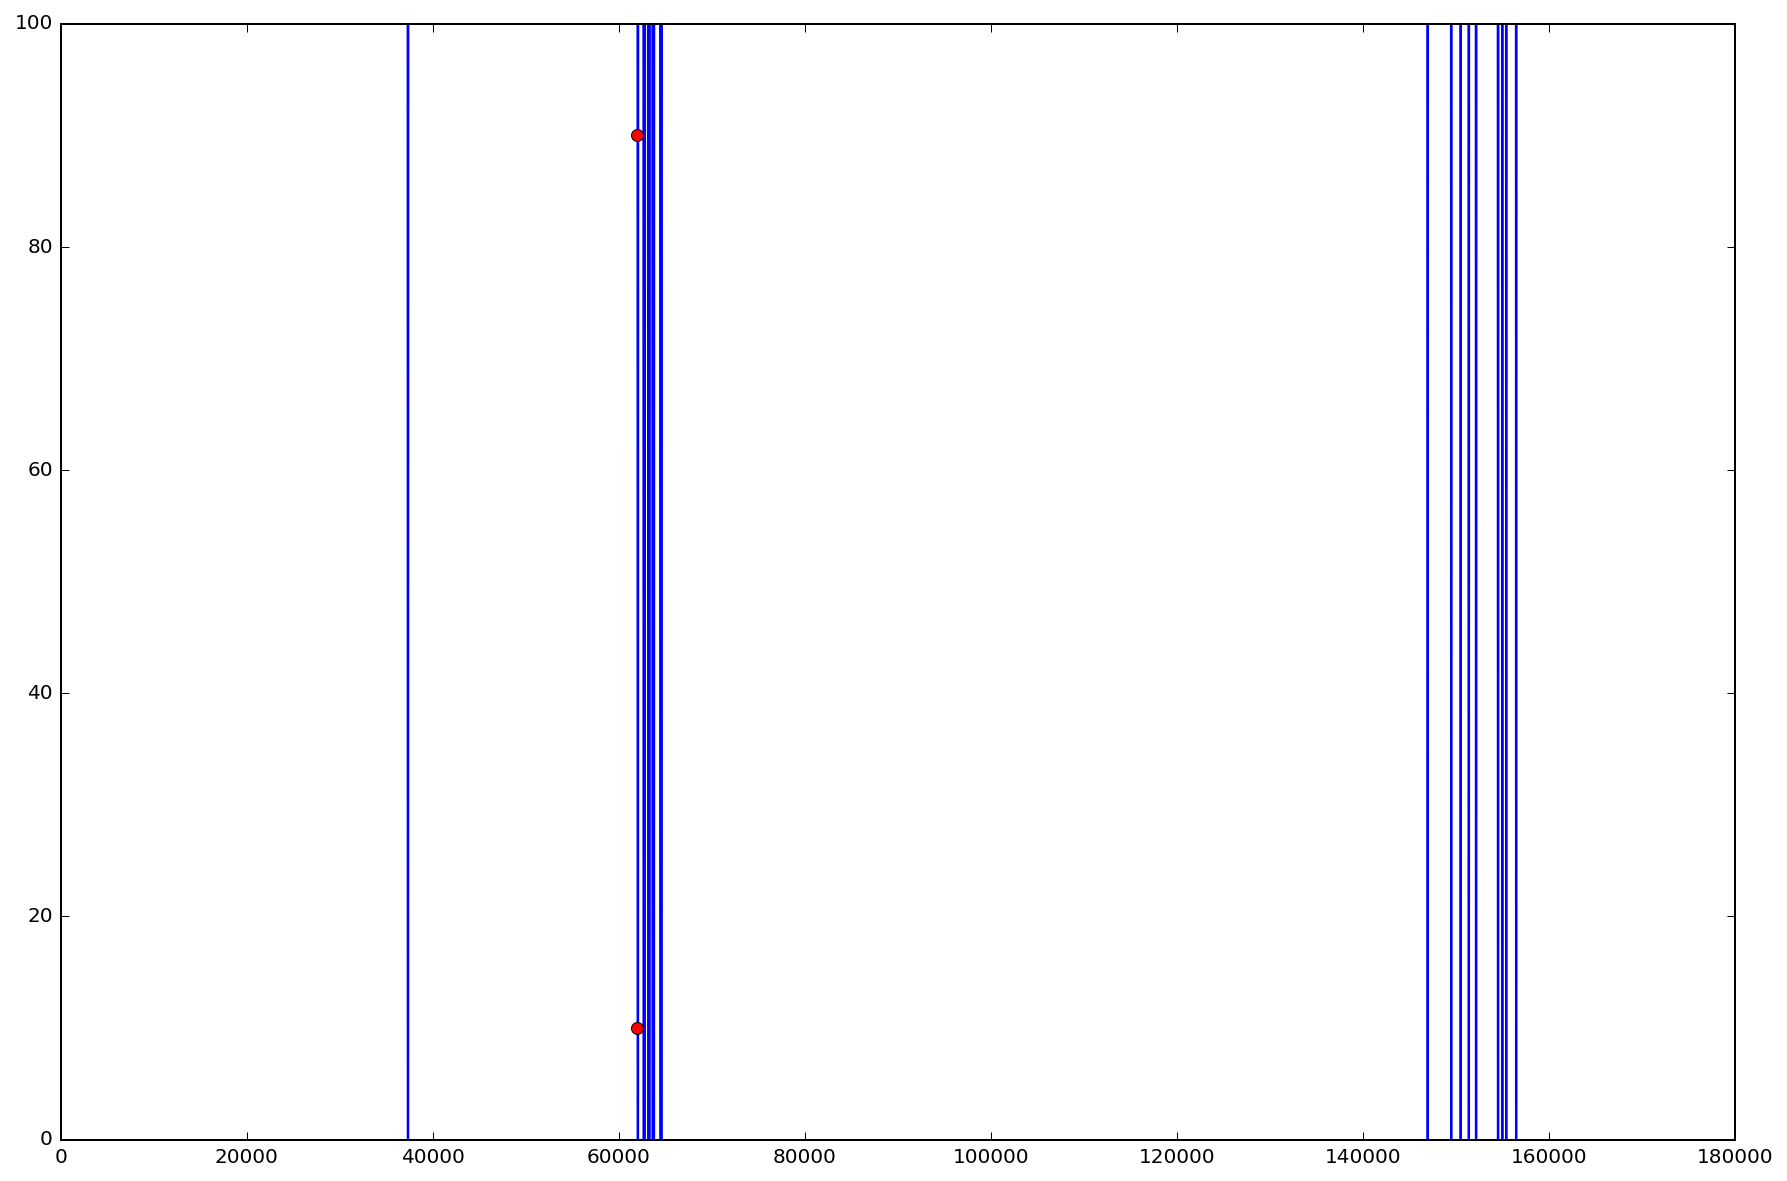

TEST  44


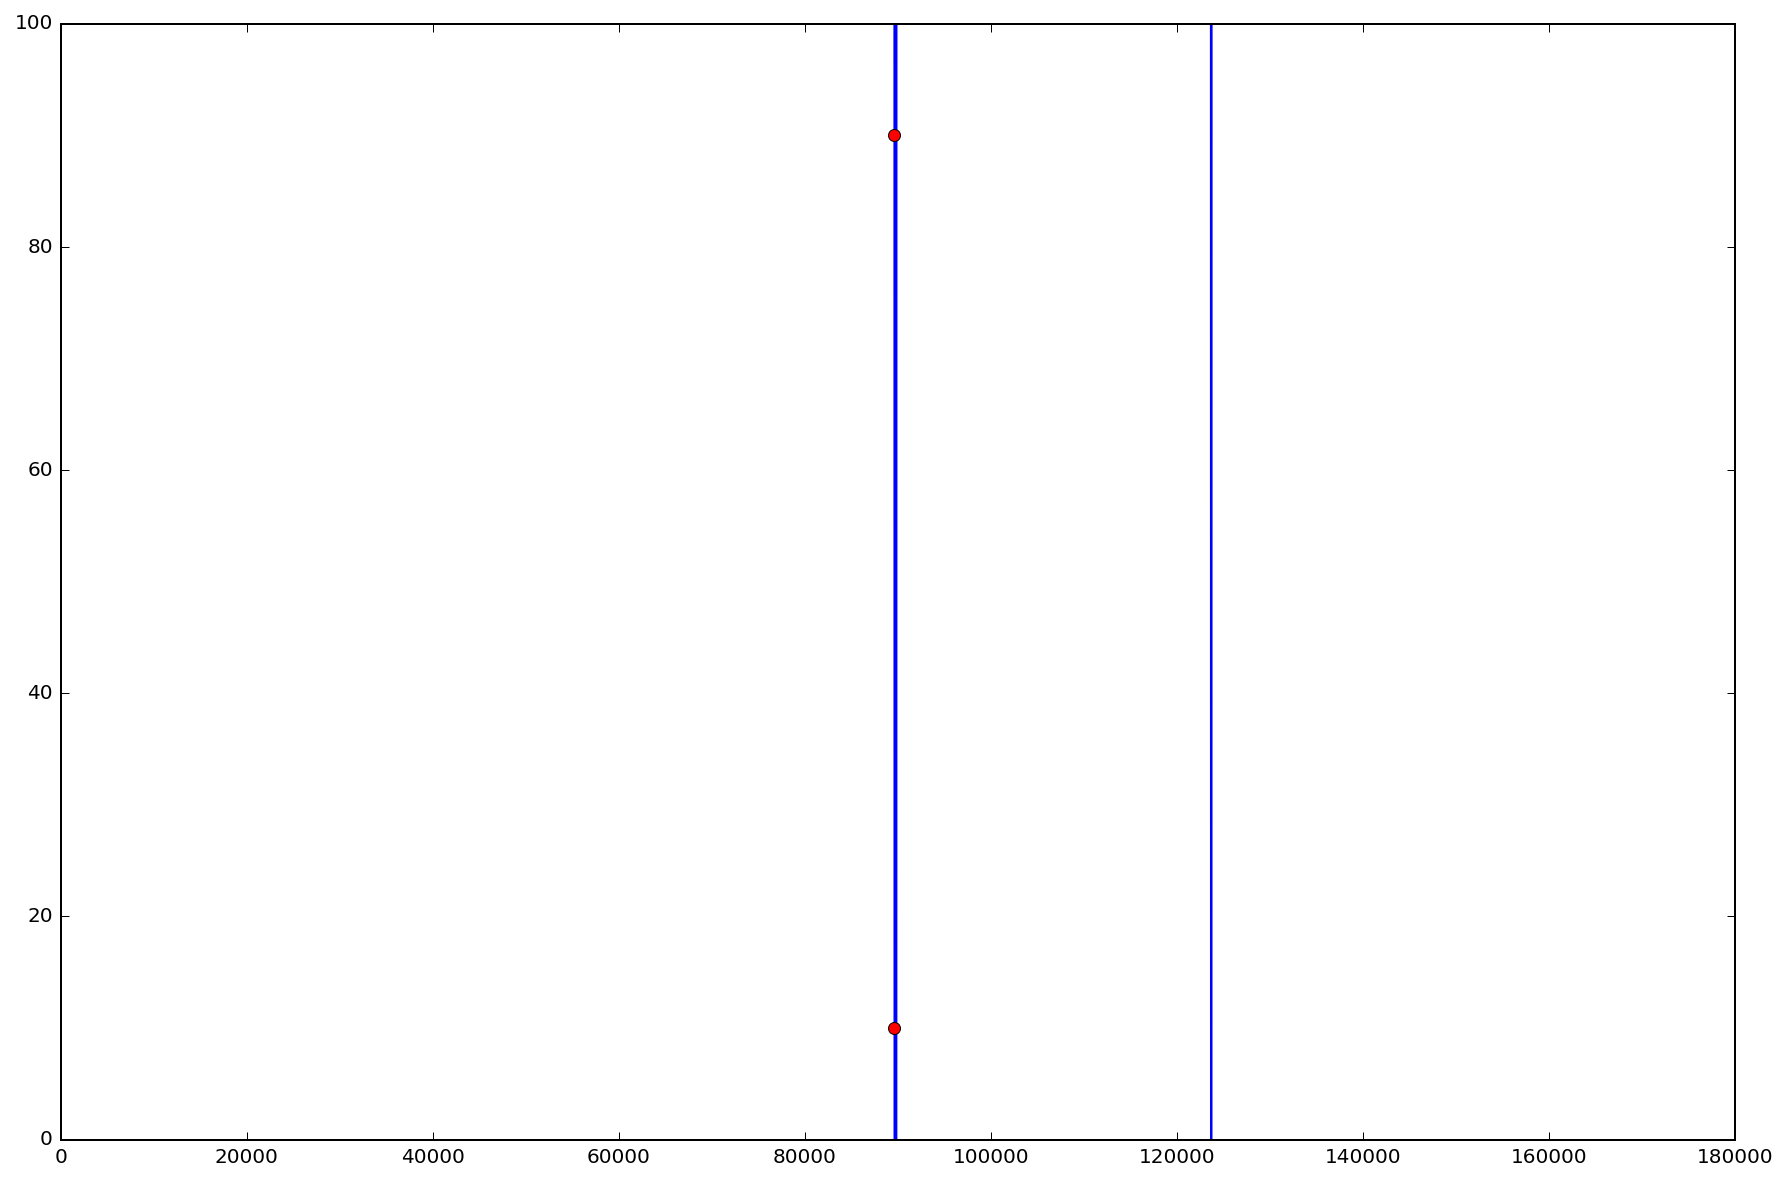

TEST  45


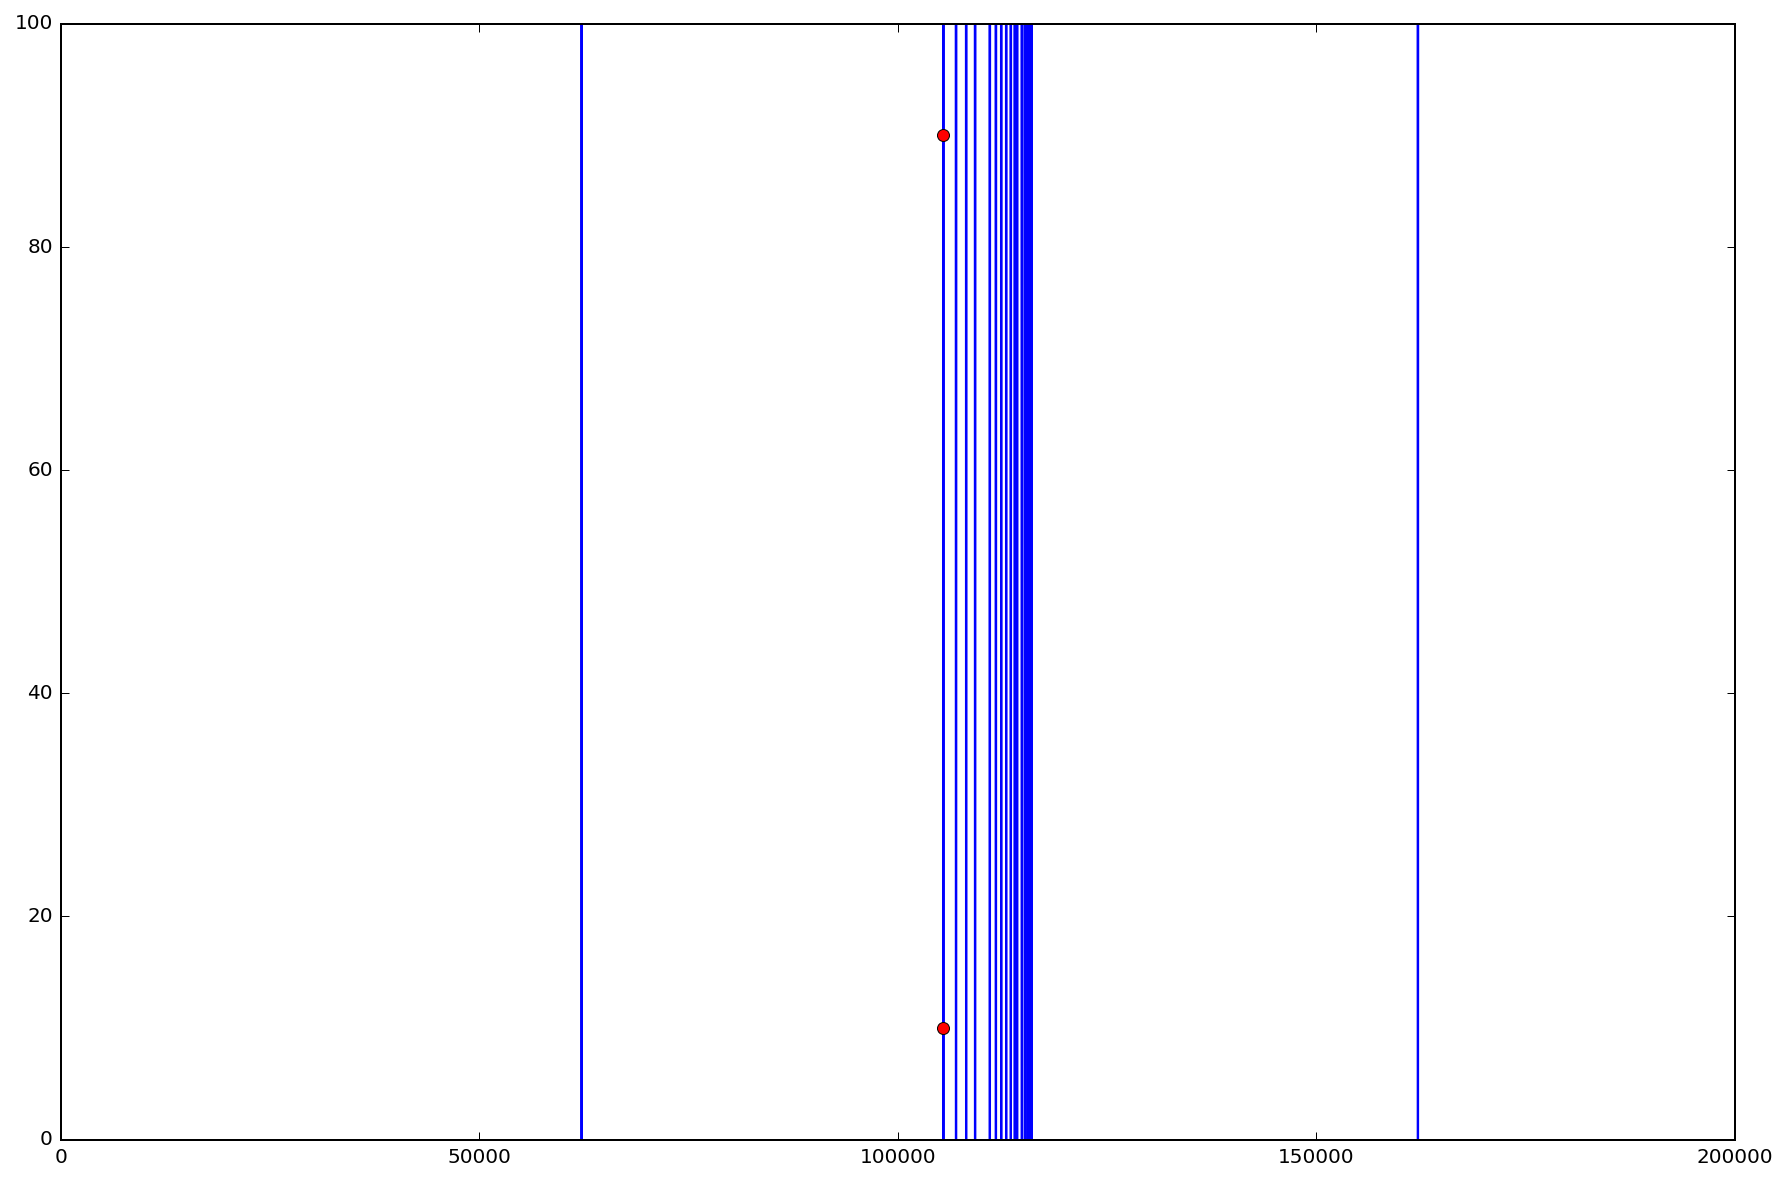

TEST  46


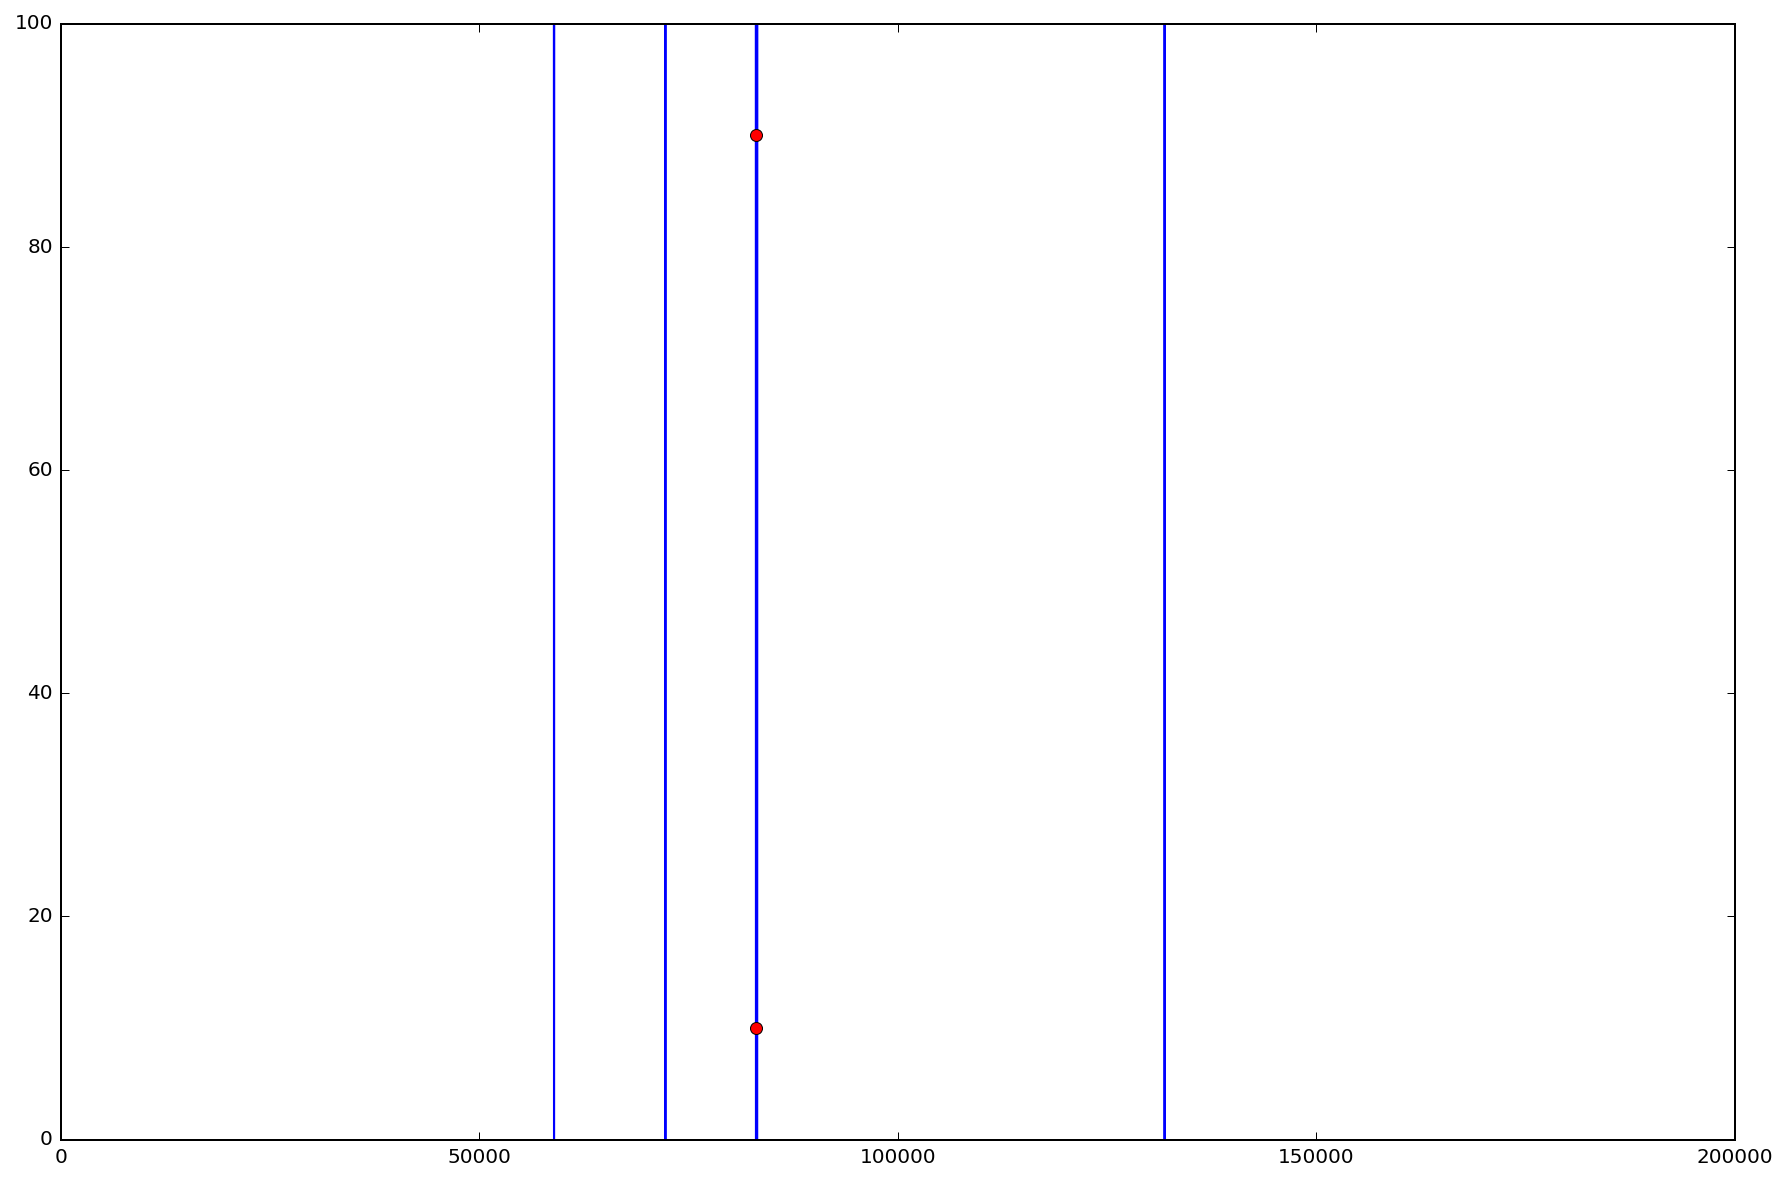

TEST  47


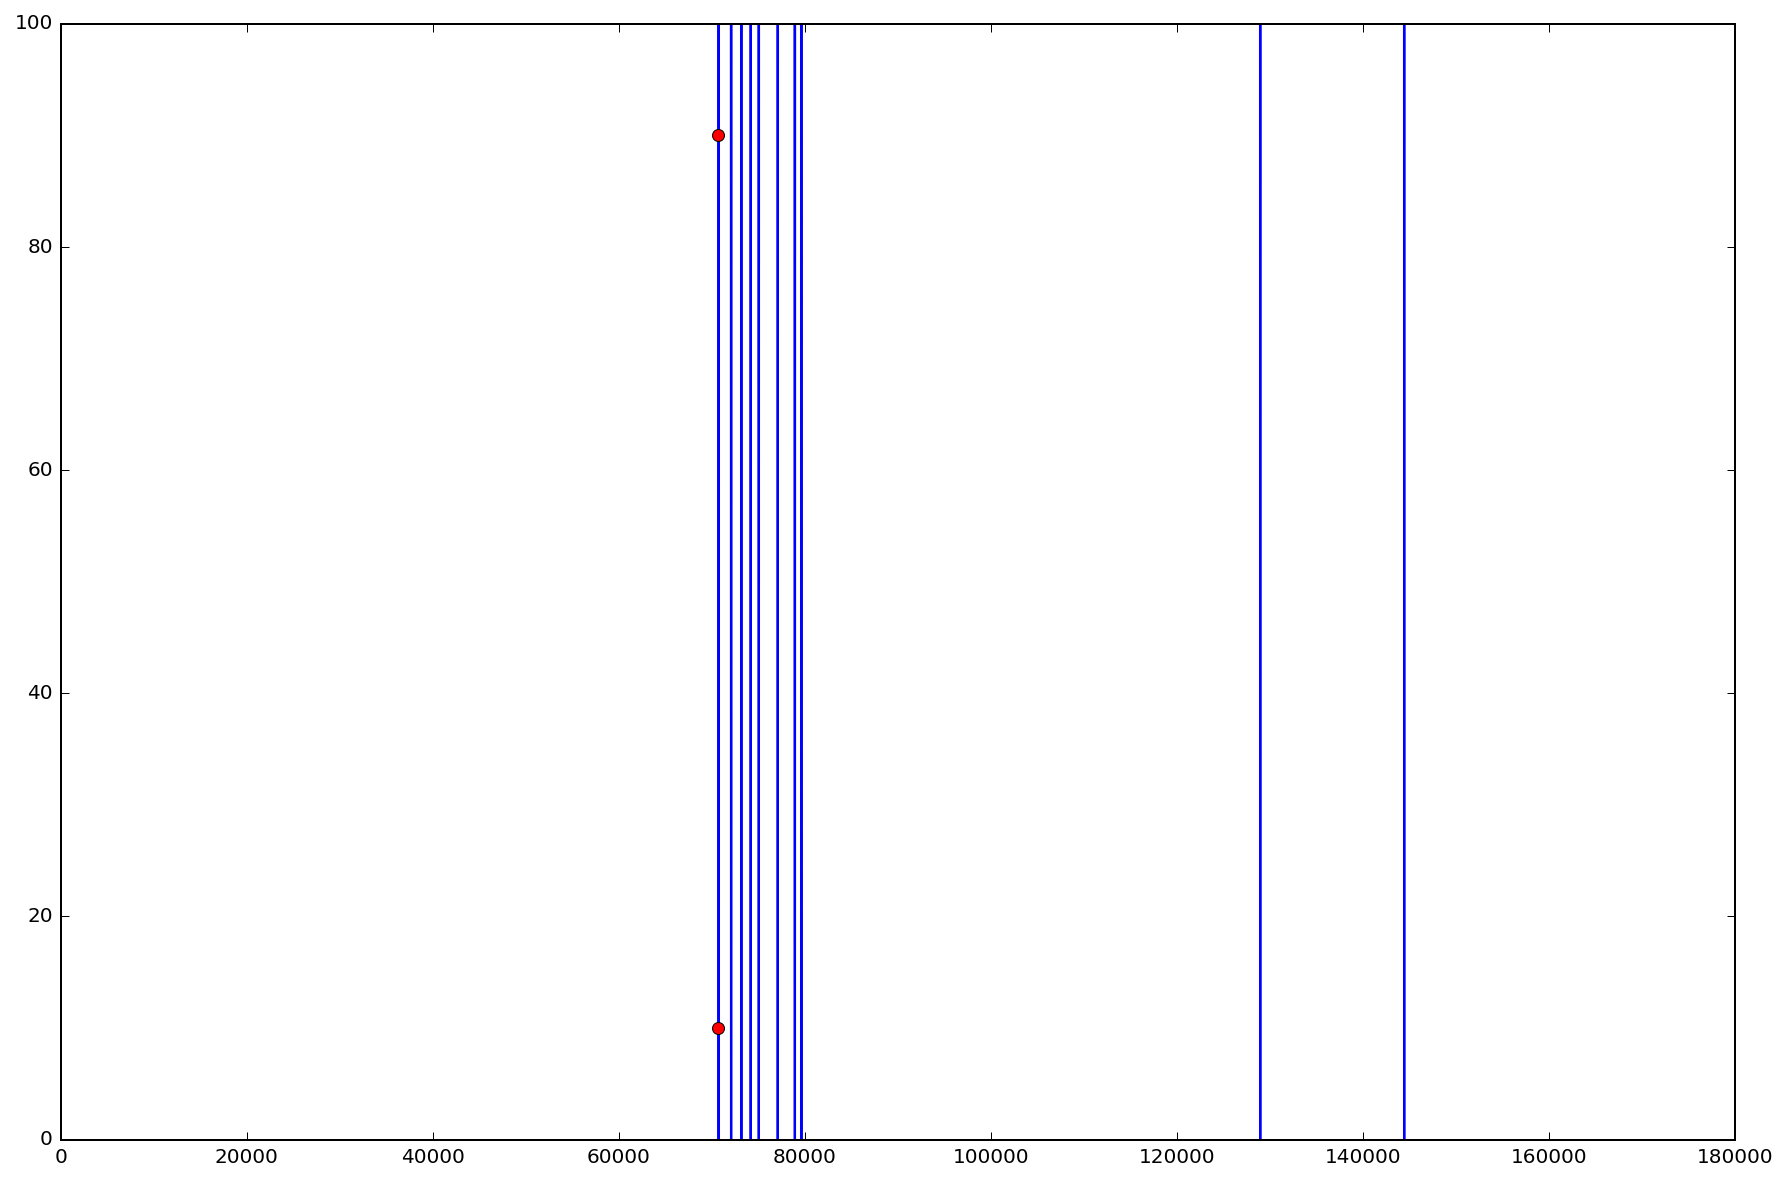

In [35]:
#original_test = pd.read_csv('./test/' + str(test_i // 10) + str(test_i % 10) + '_test.csv', index_col="Time").dropna()

HELP = {}
answer = {}
candidates = {}
hack = -np.ones((48))

for test_i in range(48):
    original_test = pd.read_csv('./test/' + str(test_i // 10) + str(test_i % 10) + '_test.csv', index_col="Time").dropna()
        
    test = np.load("clusters9//test" + str(test_i) + "_clusters.npy")
    t = np.chararray.tostring(test)
    
    candidates[test_i] = []
    answer[test_i] = np.zeros((len(test) - W))
    
    for i in range(W, len(test)):
        search = t[(i - W) * 4:i * 4]
        
        if search in HELP:
            j = HELP[search]
        else:
            j = p.find(search)
            HELP[search] = j
        
        if j == -1:
            if original_test.index[i - 1] - original_test.index[i - W] > 100:
                answer[test_i][i - W] = 50
            else:
                candidates[test_i].append(i - W)

                if hack[test_i] == -1 and len(candidates[test_i]) >= W and candidates[test_i][-1] - candidates[test_i][-W] < 10000:
                    hack[test_i] = candidates[test_i][-W]
                answer[test_i][i - W] = 0
        else:
            answer[test_i][i - W] = 100
    
    print("TEST ", test_i)
    plt.plot(answer[test_i])
    if final_ans > -1:
        plt.plot(hack[test_i], 10, hack[test_i], 90, c='red', marker = 'o')
    plt.show()

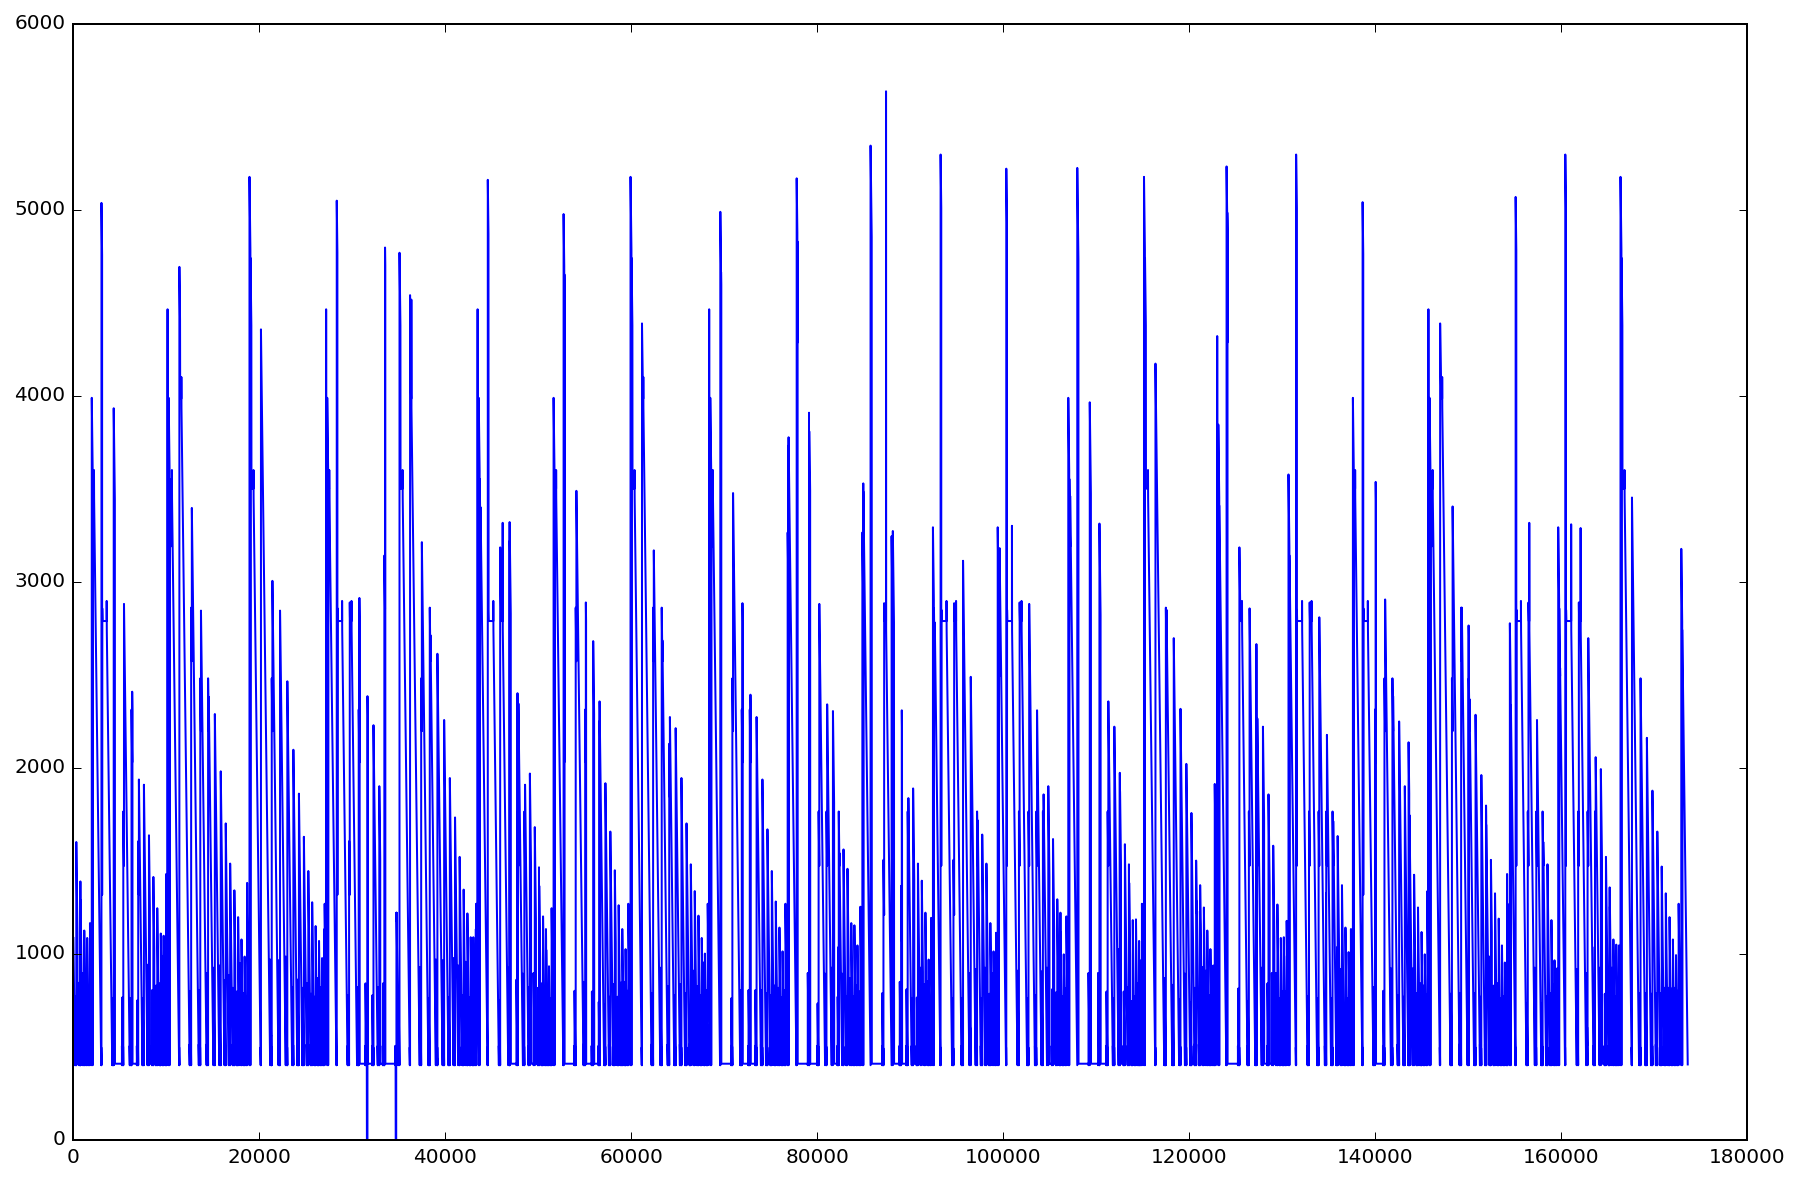

In [10]:
rcParams['figure.figsize'] = 15, 10
plt.plot(answer)  #test1

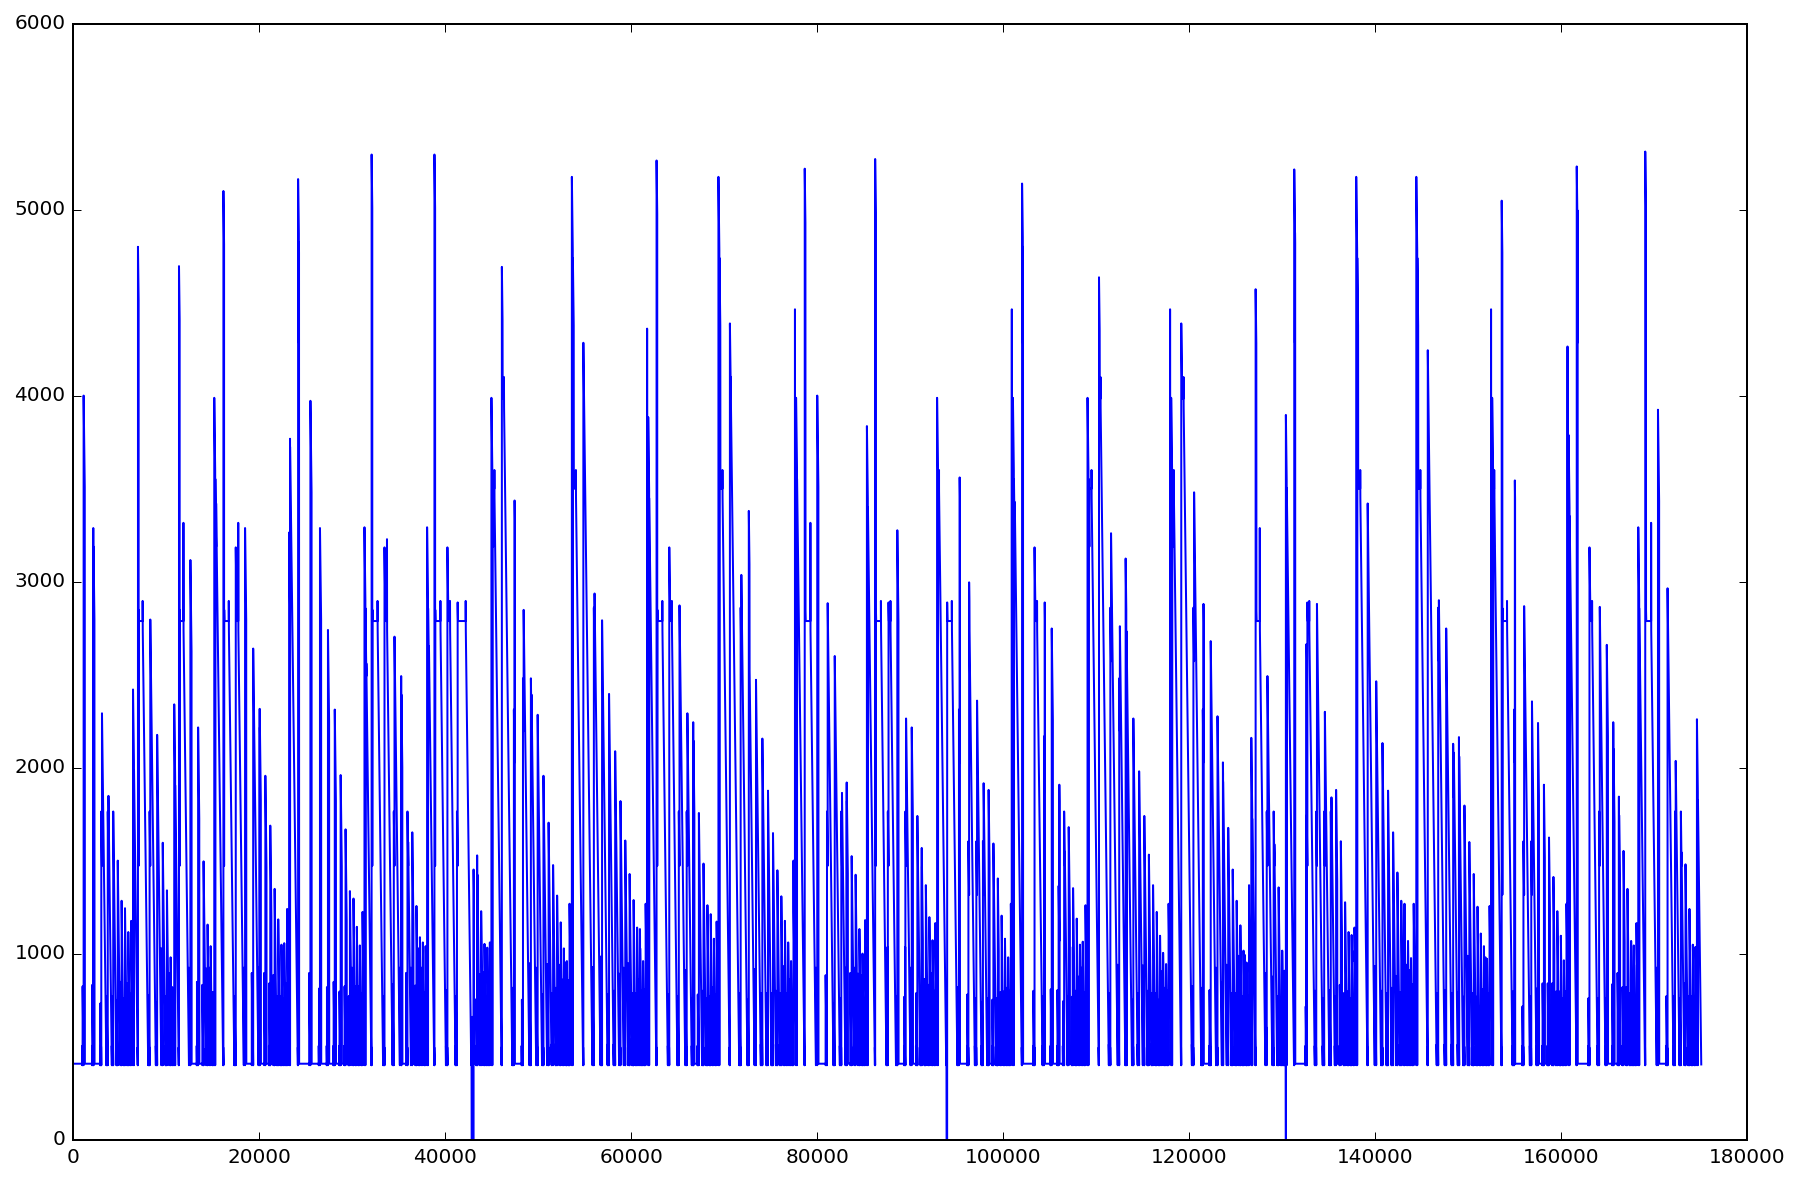

In [8]:
rcParams['figure.figsize'] = 15, 10
plt.plot(answer)  #test0